In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import seaborn as sns
import math
import missingno as msno
import colorcet as cc

from sklearn.preprocessing import PowerTransformer

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

from sklearn.impute import KNNImputer
from sklearn.ensemble import ExtraTreesRegressor, RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.pipeline import make_pipeline

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel

from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor

pd.set_option('display.max_columns', None)
plt.rcParams["figure.figsize"] = (100,100)
plt.rc('font', size=50)


In [2]:
pd.set_option('display.max_rows',None)

In [3]:
Data = pd.read_csv('Data/Pneumonia_Data_48h/24h-48h/24h-48h_Organized_Data.csv')

In [4]:
Data.head()

Age  Gender  Weight  HeartRate    TAS   TAD   TAM  Temperature    RR  \
0   66       1    75.0       74.0  151.0  71.0  98.0         37.5  20.0   
1   71       1    85.0       90.0  102.0  56.0  71.0         36.1  27.0   
2   54       1    47.0       78.0  140.0  78.0  99.0         36.9  14.0   
3   61       1    70.0       92.0  116.0  47.0  69.0         37.3  15.0   
4   73       1    80.0       44.0  165.0  58.0  93.0         36.0  10.0   

    SpO2  FiO2  Lactate  PaCO2   PaO2     pH  SaO2  Bicarbonate  metHb   BE  \
0   96.0  25.0      0.8   38.0   78.0  7.520  98.2         30.8    1.3  7.6   
1   96.0  90.0      2.5   39.0   62.0  7.320  96.2         20.5    0.1 -5.6   
2   91.0  50.0      2.4   43.0  102.0  7.490  99.6         32.8    0.9  9.5   
3   95.0   NaN      1.5   31.8   64.1  7.396  92.5         19.8    NaN  NaN   
4  100.0  35.0      1.5   40.0  100.0  7.420  98.3         25.9    0.8  1.3   

   VitaminD  Folic  Uric  Albumin  ALT/TGP  Amylase  Ammonia  APTT  AST/TGO  \
0       NaN    NaN   NaN      3.0      6.0     41.0      NaN  26.2     11.0   
1       NaN    NaN   NaN      2.0    430.0      NaN      NaN   NaN   1858.0   
2       NaN    NaN   NaN      2.4     13.0      NaN      NaN  28.8     12.0   
3       NaN    NaN   NaN      2.9     17.0      NaN      NaN  44.9     36.0   
4       NaN    NaN   NaN      3.3      NaN      NaN      NaN   NaN     22.0   

   DBilirubin  Tbilirubin  BNP  CCalcium  ICalcium  TCalcium      CK  CK-MB  \
0         NaN        0.42  NaN       9.6       NaN       8.8     NaN    NaN   
1         NaN        2.12  NaN       9.0       NaN       7.4  1369.0    NaN   
2         NaN        0.34  NaN       9.4       NaN       8.1     NaN    NaN   
3        1.51        2.60  NaN       9.9       NaN       9.0     NaN    NaN   
4         NaN        0.47  NaN       8.8       NaN       8.2     NaN    NaN   

   CK-MBWeight  Chlorine  Creatinine  CTFF  D-Dimers     DHL  Ferritin  Iron  \
0          NaN     110.0        1.05   NaN       NaN   198.0       NaN   NaN   
1          NaN     100.0        2.43   NaN       NaN  2386.0       NaN   NaN   
2          NaN     101.0        0.29   NaN       NaN   242.0       NaN   NaN   
3          NaN     109.0        1.23   NaN       NaN   360.0       NaN   NaN   
4          NaN     111.0        1.06   NaN       NaN     NaN       NaN   NaN   

   Fibrinogen  AlkalinePhosph  Phosphorus    GGT  Glucose  Hemoglobin  I.N.R  \
0       388.0            88.0         1.9   85.0    132.0        10.4    1.3   
1         NaN           190.0         4.4  436.0      NaN        12.7    1.1   
2       863.0            64.0         2.6   27.0    205.0         9.6    1.1   
3         NaN             NaN         4.6   35.0     70.0         8.5    1.6   
4         NaN             NaN         1.5    NaN    164.0        11.8    1.2   

   Leukocytes  Lymphocytes  Lipase  Magnesium  Myoglobin  Neutrophils    PCR  \
0         6.3         11.5     NaN        2.1        NaN         79.6   3.26   
1         3.0          3.8   141.0        2.2        NaN         93.4   8.73   
2         7.1          4.2     NaN        1.9        NaN         89.8  16.08   
3        24.2          6.6     NaN        1.9        NaN         89.0   2.49   
4        11.6          6.9     NaN        2.2        NaN         86.8  20.99   

   Platelets  Potassium  Procalcitonin  TProteins  Sodium  Prothrombin  \
0      183.0       3.22            NaN        NaN   149.0          NaN   
1       82.0       4.86            NaN        NaN   135.0          NaN   
2      152.0       3.16            NaN        NaN   142.0          NaN   
3       77.0       3.77            NaN        NaN   145.0          NaN   
4      155.0       3.93            NaN        NaN   145.0          NaN   

   Transferrin  TroponinI  TroponinT   Urea  Glasgow  AddicIntoxic  VascularP  \
0          NaN        NaN        NaN   76.0      3.0             0          1   
1          NaN        NaN        NaN  121.0      3.0             0          0

In [5]:
len(Data)

12406

# Transforming Data distribution

Analysing original Distribution

In [6]:
Data.describe()

Age        Gender       Weight     HeartRate          TAS  \
count  12406.000000  12406.000000  5060.000000  11583.000000  11588.00000   
mean      61.759229      1.324037    69.635144     86.261783    123.75140   
std       19.354209      0.468033    25.397489     42.782205     24.61621   
min        0.000000      1.000000     0.100000      0.000000      0.10000   
25%       53.000000      1.000000    60.000000     71.000000    107.00000   
50%       66.000000      1.000000    70.000000     84.000000    122.00000   
75%       76.000000      2.000000    82.005000     98.000000    139.00000   
max      102.000000      2.000000   188.000000   4082.000000    251.00000   

                TAD           TAM   Temperature            RR          SpO2  \
count  11588.000000  11361.000000  11247.000000  11176.000000  11573.000000   
mean      63.264050     83.268852     36.614511     21.805534     95.972543   
std       14.707479     16.971263      0.852115      9.753692      4.903877   
min        0.590000      0.000000     32.000000      0.000000      0.000000   
25%       54.000000     72.000000     36.100000     16.000000     95.000000   
50%       62.000000     82.000000     36.600000     20.000000     97.000000   
75%       71.000000     93.000000     37.100000     25.000000     99.000000   
max      265.000000    251.000000     40.700000    244.000000    100.000000   

              FiO2      Lactate         PaCO2          PaO2            pH  \
count  7351.000000  8823.000000  10464.000000  10471.000000  10470.000000   
mean     47.628035     1.800029     42.763404     92.171445      7.414194   
std      18.473882     3.041199     10.836492     34.895084      0.081809   
min      21.000000     0.010000      0.510000     15.000000      6.800000   
25%      35.000000     0.900000     35.900000     70.400000      7.370000   
50%      44.900000     1.280000     40.900000     85.300000      7.424500   
75%      60.000000     1.740000     47.500000    107.000000      7.470000   
max     100.000000   119.000000    120.000000    546.700000      7.720000   

               SaO2   Bicarbonate        metHb           BE   VitaminD  \
count  10277.000000  10363.000000  6443.000000  6182.000000  17.000000   
mean      95.096176     26.535217     0.619835     1.864437  13.113529   
std        6.372068      4.878932     0.614879     5.996704   6.169827   
min       17.100000      5.400000     0.000000   -16.900000   3.670000   
25%       94.500000     23.200000     0.200000    -1.800000   7.700000   
50%       96.800000     26.100000     0.400000     1.300000  13.180000   
75%       98.200000     29.500000     0.800000     4.700000  17.730000   
max      173.000000     44.900000     9.800000    29.900000  25.810000   

            Folic        Uric      Albumin       ALT/TGP      Amylase  \
count  116.000000  528.000000  5282.000000   7249.000000   775.000000   
mean     5.797638    4.362138     2.573124    116.417433   110.939877   
std      4.617610    2.582569     0.540423    460.185400   230.530301   
min      0.400000    0.500000     0.710000      2.000000     1.500000   
25%      2.500000    2.500000     2.200000     19.000000    36.750000   
50%      4.615000    3.700000     2.600000     33.000000    58.000000   
75%      7.225000    5.700000     2.920000     63.000000   103.500000   
max     19.640000   19.300000     4.600000  13840.000000  4124.000000   

          Ammonia         APTT       AST/TGO   DBilirubin   Tbilirubin  \
count   88.000000  6403.000000   6168.000000  3691.000000  8016.000000   
mean   109.818443    33.766105    156.026620     0.730230     0.986606   
std     85.134980    11.396584    875.515758     1.483617     1.795473   
min     19.000000    14.000000      5.000000     0.000000     0.030000   
25%     54.400000    27.800000     22.000000     0.190000     0.360000   
50%     96.900000    31.020000     37.000000     0.300000     0.550000   
75%    130.850000    36.600000     72.000000     0.700000     0.950000   

In [7]:
# Choosing just the continuos variebles

cols = list(Data.columns)

Continuous_Data = Data[cols[:-32]]

Continuous_Data = Continuous_Data.drop(['Gender'], axis=1)

Continuous_Columns = list(Continuous_Data.columns)

Continuous_Data.head()

Age  Weight  HeartRate    TAS   TAD   TAM  Temperature    RR   SpO2  FiO2  \
0   66    75.0       74.0  151.0  71.0  98.0         37.5  20.0   96.0  25.0   
1   71    85.0       90.0  102.0  56.0  71.0         36.1  27.0   96.0  90.0   
2   54    47.0       78.0  140.0  78.0  99.0         36.9  14.0   91.0  50.0   
3   61    70.0       92.0  116.0  47.0  69.0         37.3  15.0   95.0   NaN   
4   73    80.0       44.0  165.0  58.0  93.0         36.0  10.0  100.0  35.0   

   Lactate  PaCO2   PaO2     pH  SaO2  Bicarbonate  metHb   BE  VitaminD  \
0      0.8   38.0   78.0  7.520  98.2         30.8    1.3  7.6       NaN   
1      2.5   39.0   62.0  7.320  96.2         20.5    0.1 -5.6       NaN   
2      2.4   43.0  102.0  7.490  99.6         32.8    0.9  9.5       NaN   
3      1.5   31.8   64.1  7.396  92.5         19.8    NaN  NaN       NaN   
4      1.5   40.0  100.0  7.420  98.3         25.9    0.8  1.3       NaN   

   Folic  Uric  Albumin  ALT/TGP  Amylase  Ammonia  APTT  AST/TGO  DBilirubin  \
0    NaN   NaN      3.0      6.0     41.0      NaN  26.2     11.0         NaN   
1    NaN   NaN      2.0    430.0      NaN      NaN   NaN   1858.0         NaN   
2    NaN   NaN      2.4     13.0      NaN      NaN  28.8     12.0         NaN   
3    NaN   NaN      2.9     17.0      NaN      NaN  44.9     36.0        1.51   
4    NaN   NaN      3.3      NaN      NaN      NaN   NaN     22.0         NaN   

   Tbilirubin  BNP  CCalcium  ICalcium  TCalcium      CK  CK-MB  CK-MBWeight  \
0        0.42  NaN       9.6       NaN       8.8     NaN    NaN          NaN   
1        2.12  NaN       9.0       NaN       7.4  1369.0    NaN          NaN   
2        0.34  NaN       9.4       NaN       8.1     NaN    NaN          NaN   
3        2.60  NaN       9.9       NaN       9.0     NaN    NaN          NaN   
4        0.47  NaN       8.8       NaN       8.2     NaN    NaN          NaN   

   Chlorine  Creatinine  CTFF  D-Dimers     DHL  Ferritin  Iron  Fibrinogen  \
0     110.0        1.05   NaN       NaN   198.0       NaN   NaN       388.0   
1     100.0        2.43   NaN       NaN  2386.0       NaN   NaN         NaN   
2     101.0        0.29   NaN       NaN   242.0       NaN   NaN       863.0   
3     109.0        1.23   NaN       NaN   360.0       NaN   NaN         NaN   
4     111.0        1.06   NaN       NaN     NaN       NaN   NaN         NaN   

   AlkalinePhosph  Phosphorus    GGT  Glucose  Hemoglobin  I.N.R  Leukocytes  \
0            88.0         1.9   85.0    132.0        10.4    1.3         6.3   
1           190.0         4.4  436.0      NaN        12.7    1.1         3.0   
2            64.0         2.6   27.0    205.0         9.6    1.1         7.1   
3             NaN         4.6   35.0     70.0         8.5    1.6        24.2   
4             NaN         1.5    NaN    164.0        11.8    1.2        11.6   

   Lymphocytes  Lipase  Magnesium  Myoglobin  Neutrophils    PCR  Platelets  \
0         11.5     NaN        2.1        NaN         79.6   3.26      183.0   
1          3.8   141.0        2.2        NaN         93.4   8.73       82.0   
2          4.2     NaN        1.9        NaN         89.8  16.08      152.0   
3          6.6     NaN        1.9        NaN         89.0   2.49       77.0   
4          6.9     NaN        2.2        NaN         86.8  20.99      155.0   

   Potassium  Procalcitonin  TProteins  Sodium  Prothrombin  Transferrin  \
0       3.22            NaN        NaN   149.0          NaN          NaN   
1       4.86            NaN        NaN   135.0          NaN          NaN   
2       3.16            NaN        NaN   142.0          NaN          NaN   
3       3.77            NaN        NaN   145.0          NaN          NaN   
4       3.93            NaN        NaN   145.0          NaN          NaN   

   TroponinI  TroponinT   Urea  Glasgow  
0        NaN        NaN   76.0      3.0  
1        NaN        NaN  121.0      3.0  
2        NaN        NaN   19.0      3.0  
3        NaN        NaN  134.0     15.0  

C:\Users\nunop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:15: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  from ipykernel import kernelapp as app


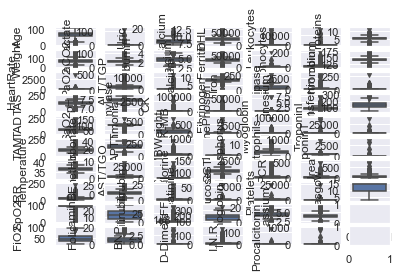

In [8]:
sns.set(rc={"figure.figsize":(20, 30)})

ax1=0
ax2=0
fig, ax = plt.subplots(10,7)

for column in Continuous_Columns:
    sns.boxplot(y=Data[column], ax=ax[ax1, ax2])

    ax1 +=1
    if ax1== 10:
        ax1=0
        ax2+=1 
        
plt.tight_layout()
plt.show()

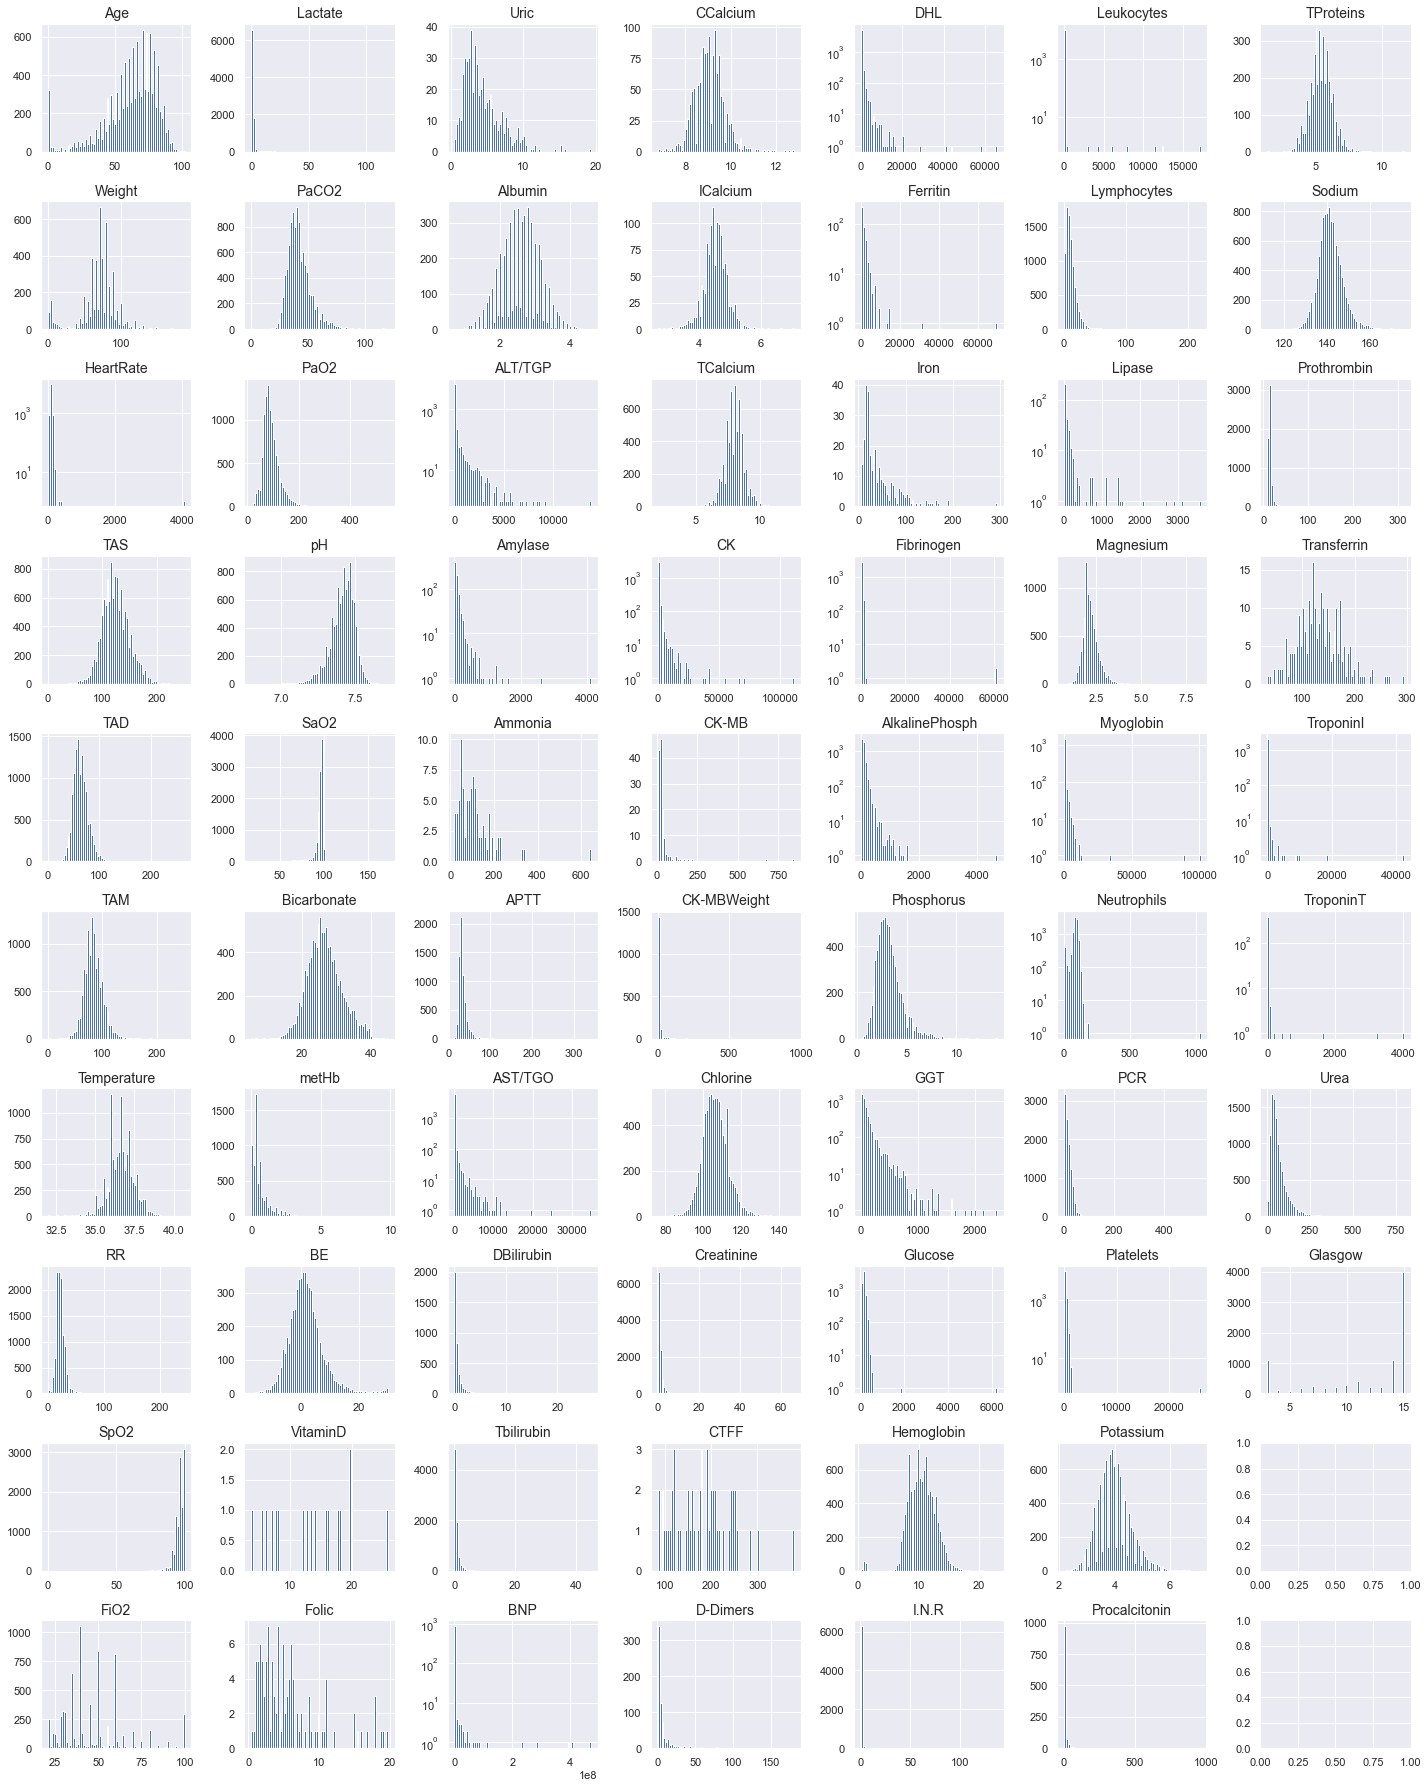

In [9]:
sns.set(rc={"figure.figsize":(20, 25)})

ax1=0
ax2=0
fig, ax = plt.subplots(10,7)

for column in Continuous_Columns:

    if Data[column].max() > 1000:
        ax[ax1, ax2].hist(Data[column], bins = 70, log=True)
        ax[ax1, ax2].title.set_text(column)
    else:
        ax[ax1, ax2].hist(Data[column], bins = 70)
        ax[ax1, ax2].title.set_text(column)

    ax[ax1, ax2].set_title(column, fontsize=14)

    ax1 +=1
    if ax1== 10:
        ax1=0
        ax2+=1 

plt.tight_layout()
#plt.savefig('Distribution Original')   
plt.show()

### Checking for Transformation Requirements

In [10]:
# Because we have zero/negative values, we can't conduct a box pox transformation directly

Negative_List = []
Zero_List = []

for column in Continuous_Columns:

    if Data[column].min() == 0:
        Zero_List.append(column)

    elif Data[column].min() < 0:
        Negative_List.append(column)

print('Negative :', Negative_List)
print('Zero :', Zero_List)

Negative : ['BE']
Zero : ['Age', 'HeartRate', 'TAM', 'RR', 'SpO2', 'metHb', 'DBilirubin', 'CK-MBWeight', 'Leukocytes', 'Lymphocytes', 'Neutrophils', 'TroponinI']


In [11]:
# Eliminating Negative Values that make no sense
# Just in Base Excess it makes sense

# Bilirrubina total
Data = Data.drop(Data[Data['Tbilirubin'] < 0].index)

In [12]:
# Eliminating Zero Values that make no sense
# BE, DoenteIdadeEmAnos, FR, SpO2, lactacto, Bilirrubina direta, Leucócitos, Linfócitos, Neutrófilos, Troponina I, GlasgowScore
# metHb is suposedly impossible but there are a lot of observations

# 1 value
Data = Data.drop(Data[Data['Tbilirubin'] == 0].index)
# 35 values, although possible, one person in that state, or is reanimated immediately, or his death is certain, the last thing a doctor would do would be to conduct a machine learning algorithm
Data = Data.drop(Data[Data['HeartRate'] == 0].index)
# 17 values, same as before
Data = Data.drop(Data[Data['TAS'] == 0].index)
# 18 values, same as before
Data = Data.drop(Data[Data['TAD'] == 0].index)
# 8 values, same as before
Data = Data.drop(Data[Data['TAM'] == 0].index)
# 3 values, and it's not possible, there is always a small quantity
Data = Data.drop(Data[Data['CK-MBWeight'] == 0].index)
# 1 value, and it's not possible, there is always at least a small ability of blood to cot
Data = Data.drop(Data[Data['I.N.R'] == 0].index)
# 1 value, similar as before
Data = Data.drop(Data[Data['APTT'] == 0].index)


In [13]:
# Final Negatives and zeros

Negative_List = []
Zero_List = []

for column in Continuous_Columns:

    if Data[column].min() == 0:
        Zero_List.append(column)

    elif Data[column].min() < 0:
        Negative_List.append(column)

print('Negative :', Negative_List)
print('Zero :', Zero_List)

Negative : ['BE']
Zero : ['Age', 'RR', 'SpO2', 'metHb', 'DBilirubin', 'Leukocytes', 'Lymphocytes', 'Neutrophils', 'TroponinI']


### Analysing original Skew of Data

Just columns with significant skewness will be transformd by Box Cox or Yeo Johnson

In [14]:
# As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed.
# If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
# If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.


Data.skew()

Age                    -1.202094
Gender                  0.751954
Weight                 -0.587732
HeartRate              70.521288
TAS                     0.298338
TAD                     1.237757
TAM                     0.781915
Temperature            -0.435497
RR                      4.076039
SpO2                   -7.638565
FiO2                    1.075555
Lactate                13.276285
PaCO2                   1.555297
PaO2                    2.180703
pH                     -0.919876
SaO2                   -3.981258
Bicarbonate             0.299111
metHb                   2.366744
BE                      1.080307
VitaminD                0.218012
Folic                   1.411065
Uric                    1.469834
Albumin                 0.015543
ALT/TGP                12.317470
Amylase                 9.991782
Ammonia                 3.342287
APTT                    6.394484
AST/TGO                20.017516
DBilirubin              8.249856
Tbilirubin              9.449930
BNP       

In [15]:
# Getting columns with skewd distribution

# In this case less than 1.0 seems fine
Data_Skew = Data.skew()

Data_Skew_Positive_List = Data_Skew[Data_Skew > 1.0].index
Data_Skew_Positive_List = Data_Skew_Positive_List.tolist()

Data_Skew_Negative_List = Data_Skew[Data_Skew < -1.0].index
Data_Skew_Negative_List = Data_Skew_Negative_List.tolist()

Data_Skew_List = Data_Skew_Positive_List + Data_Skew_Negative_List

Data_Skew_List = [n for n in Data_Skew_List if n in Continuous_Columns]

print(Data_Skew_List)
print()
print('Data_Skew_List Size :', len(Data_Skew_List))

['HeartRate', 'TAD', 'RR', 'FiO2', 'Lactate', 'PaCO2', 'PaO2', 'metHb', 'BE', 'Folic', 'Uric', 'ALT/TGP', 'Amylase', 'Ammonia', 'APTT', 'AST/TGO', 'DBilirubin', 'Tbilirubin', 'BNP', 'CK', 'CK-MB', 'CK-MBWeight', 'Creatinine', 'D-Dimers', 'DHL', 'Ferritin', 'Iron', 'Fibrinogen', 'AlkalinePhosph', 'Phosphorus', 'GGT', 'Glucose', 'I.N.R', 'Leukocytes', 'Lymphocytes', 'Lipase', 'Magnesium', 'Myoglobin', 'Neutrophils', 'PCR', 'Platelets', 'Procalcitonin', 'Prothrombin', 'TroponinI', 'TroponinT', 'Urea', 'Age', 'SpO2', 'SaO2', 'Glasgow']

Data_Skew_List Size : 50


In [16]:
sns.set(rc={"figure.figsize":(20, 25)})

ax1=0
ax2=0
fig, ax = plt.subplots(8,7)

for column in Data_Skew_List:

    if Data[column].max() > 1000:
        ax[ax1, ax2].hist(Data[column], bins = 70, log=True)
        ax[ax1, ax2].title.set_text(column)
    else:
        ax[ax1, ax2].hist(Data[column], bins = 70)
        ax[ax1, ax2].title.set_text(column)

    ax1 +=1
    if ax1== 8:
        ax1=0
        ax2+=1 
    
plt.tight_layout()
#plt.savefig('Distribution Original Before')
plt.show()

### Removing Negative Skew

In [17]:
# Creating a new Dataframe for transformations

Data_Transformed = Data.copy()

In [18]:
# These ones give problems in the tranformations

Data_Skew_Negative_List_new = [n for n in Data_Skew_Negative_List if n in Continuous_Columns]
print(Data_Skew_Negative_List_new)

['Age', 'SpO2', 'SaO2', 'Glasgow']


In [19]:
# The variebles with negative skews don't transform well
# so I will do (max value - value) to get a distribution more similar to others found in tha Data

for column in Data_Skew_Negative_List_new:
    
    Data_Transformed[column] = Data_Transformed[column].max() - Data_Transformed[column]

    if column not in Zero_List:
        Zero_List.append(column)

In [20]:
print('New Zero List :', Zero_List)

New Zero List : ['Age', 'RR', 'SpO2', 'metHb', 'DBilirubin', 'Leukocytes', 'Lymphocytes', 'Neutrophils', 'TroponinI', 'SaO2', 'Glasgow']


### Yeo-Johnson transformation

In [21]:
Data_Transformed_YJ = Data_Transformed.copy()
Transformed_Lambda_YJ = []


for column in Data_Skew_List:

    YeoJohnson_transform = PowerTransformer(method='yeo-johnson', standardize=False,) 

    #Fit the data to the powertransformer
    column_new = YeoJohnson_transform.fit(Data_Transformed[[column]])

    Transformed_Lambda_YJ.append((column, column_new.lambdas_[0]))

    #Transform the data 
    column_new = YeoJohnson_transform.transform(Data_Transformed[[column]])

    #Pass the transformed data into a dataframe 
    Data_Transformed_YJ[column] = column_new

In [22]:
print(Transformed_Lambda_YJ)

[('HeartRate', 0.07637849940847381), ('TAD', 0.37050071963077075), ('RR', 0.23739796945467567), ('FiO2', -0.1987924036501002), ('Lactate', -1.1176850380633356), ('PaCO2', -0.08386788162853684), ('PaO2', -0.01043332831460453), ('metHb', -1.4495996040696866), ('BE', 0.8703314917059606), ('Folic', -0.14301936137904522), ('Uric', -0.117749990626443), ('ALT/TGP', -0.3775388784421243), ('Amylase', -0.18697600286509097), ('Ammonia', -0.06453343476008286), ('APTT', -1.2404986523991275), ('AST/TGO', -0.435884816877348), ('DBilirubin', -2.0425151713762637), ('Tbilirubin', -1.8333167305370264), ('BNP', -0.12866150545884542), ('CK', -0.1364546827655497), ('CK-MB', -0.4424003018792236), ('CK-MBWeight', -0.5133499813772686), ('Creatinine', -1.5059385814427275), ('D-Dimers', -0.44615416069028024), ('DHL', -0.4722265254672472), ('Ferritin', 0.023424356065137448), ('Iron', -0.18954194105719005), ('Fibrinogen', 0.022812656167025366), ('AlkalinePhosph', -0.40546337788634335), ('Phosphorus', -0.2185222049

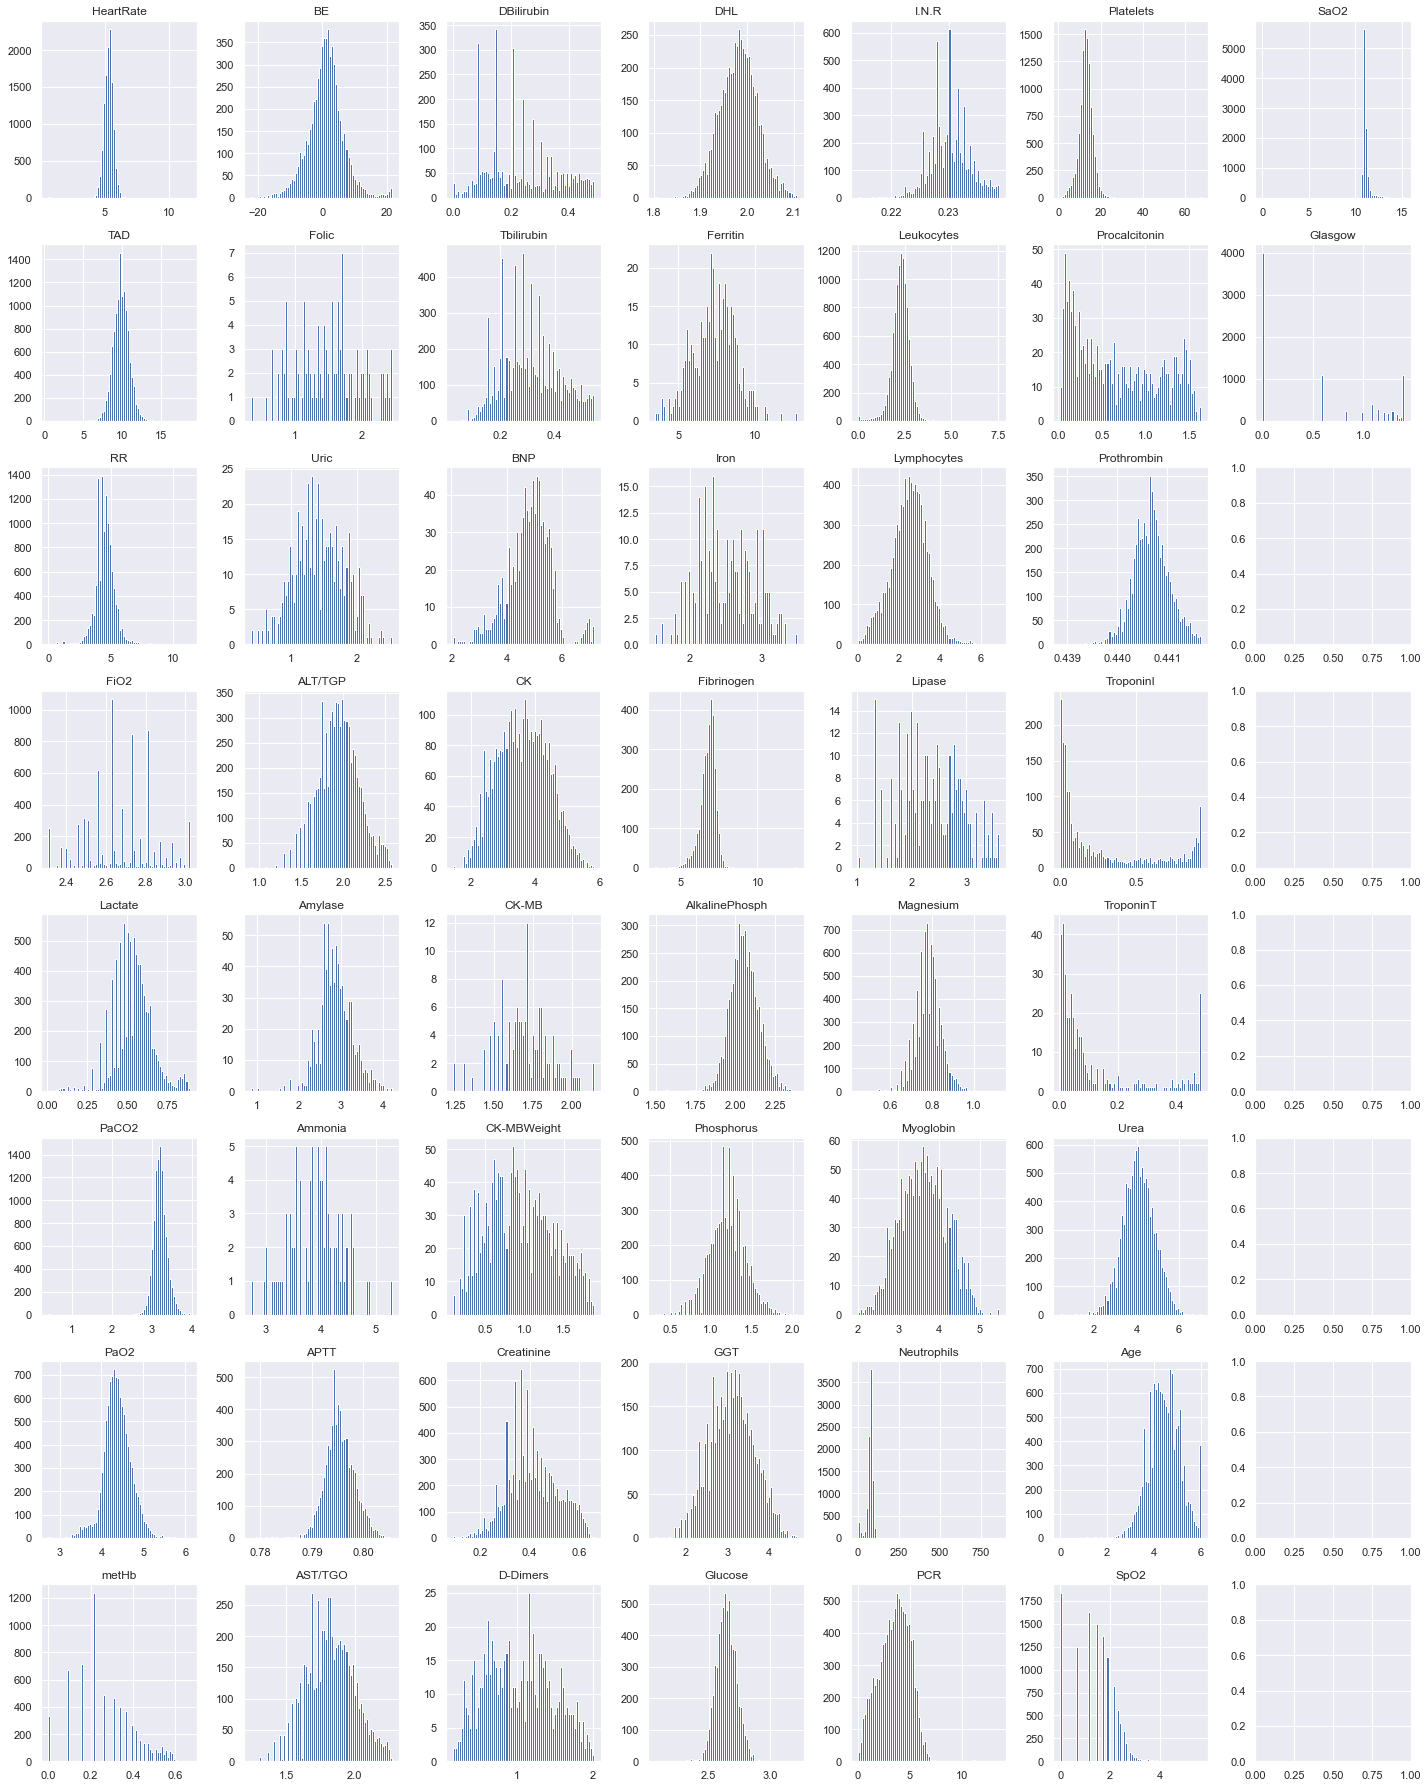

In [23]:
sns.set(rc={"figure.figsize":(20, 25)})

ax1=0
ax2=0
fig, ax = plt.subplots(8,7)

for column in Data_Skew_List:

    if Data_Transformed_YJ[column].max() > 1000:
        ax[ax1, ax2].hist(Data_Transformed_YJ[column], bins = 70, log=True)
        ax[ax1, ax2].title.set_text(column)
    else:
        ax[ax1, ax2].hist(Data_Transformed_YJ[column], bins = 70)
        ax[ax1, ax2].title.set_text(column)

    ax1 +=1
    if ax1== 8:
        ax1=0
        ax2+=1 
    
plt.tight_layout()
#plt.savefig('Distribution Yeo-Johnson')
plt.show()

In [24]:
# This one has all the continuous columns

sns.set(rc={"figure.figsize":(20, 25)})

ax1=0
ax2=0
fig, ax = plt.subplots(10,7)

for column in Continuous_Columns:

    if Data_Transformed_YJ[column].max() > 1000:
        ax[ax1, ax2].hist(Data_Transformed_YJ[column], bins = 70, log=True)
        ax[ax1, ax2].title.set_text(column)
    else:
        ax[ax1, ax2].hist(Data_Transformed_YJ[column], bins = 70)
        ax[ax1, ax2].title.set_text(column)

    ax[ax1, ax2].set_title(column, fontsize=14)

    ax1 +=1
    if ax1== 10:
        ax1=0
        ax2+=1 
    
plt.tight_layout()
#plt.savefig('Distribution Yeo-Johnson After')
plt.show()

### Box Cox and Yeo-Johnson transformation mix

In [25]:
# This will be used to separate columns with just positives and without
Not_Just_Positive_List = Negative_List + Zero_List

Not_Just_Positive_List = [n for n in Not_Just_Positive_List if n in Data_Skew_List]

# Just Positive List
Just_Positve_List = [n for n in Data_Skew_List if n not in Not_Just_Positive_List]

In [26]:
Data_Transformed_BC = Data_Transformed.copy()
Transformed_Lambda_BC = []

#The Box Cox transformation will be applied in just positive columns
for column in Just_Positve_List:

    BoxCox_transform = PowerTransformer(method='box-cox', standardize=False,) 

    #Fit the data to the powertransformer
    column_new = BoxCox_transform.fit(Data_Transformed[[column]])

    Transformed_Lambda_BC.append((column, column_new.lambdas_[0]))

    #Transform the data 
    column_new = BoxCox_transform.transform(Data_Transformed[[column]])

    #Pass the transformed data into a dataframe 
    Data_Transformed_BC[column] = column_new

In [27]:
print(Transformed_Lambda_BC)

[('HeartRate', 0.11816836955705964), ('TAD', 0.4063996958124509), ('FiO2', -0.1729279391863795), ('Lactate', -0.1404073218026904), ('PaCO2', 0.04255336631871983), ('PaO2', 0.0035395477967311256), ('Folic', 0.09032088429906557), ('Uric', 0.14350668403066766), ('ALT/TGP', -0.3414963408965073), ('Amylase', -0.1442487511640443), ('Ammonia', -0.052101163948241505), ('APTT', -1.1733744105598591), ('AST/TGO', -0.40726718510633797), ('Tbilirubin', -0.31240048892823225), ('BNP', -0.1270355685348852), ('CK', -0.12690196087306346), ('CK-MB', -0.38628728093130793), ('CK-MBWeight', -0.16482545365029452), ('Creatinine', -0.27881848390308966), ('D-Dimers', -0.12981923499711873), ('DHL', -0.46865870227120443), ('Ferritin', 0.025374837658632878), ('Iron', -0.15056578869094864), ('Fibrinogen', 0.02457094828188487), ('AlkalinePhosph', -0.3859856475144775), ('Phosphorus', 0.11766205897815757), ('GGT', -0.12370559276001712), ('Glucose', -0.2749180873908879), ('I.N.R', -2.105778395736683), ('Lipase', -0.201

In [28]:
sns.set(rc={"figure.figsize":(20, 25)})

ax1=0
ax2=0
fig, ax = plt.subplots(8,7)

for column in Data_Skew_List:

    if Data_Transformed_BC[column].max() > 1000:
        ax[ax1, ax2].hist(Data_Transformed_BC[column], bins = 70, log=True)
        ax[ax1, ax2].title.set_text(column)
    else:
        ax[ax1, ax2].hist(Data_Transformed_BC[column], bins = 70)
        ax[ax1, ax2].title.set_text(column)

    ax1 +=1
    if ax1== 8:
        ax1=0
        ax2+=1 
    
plt.tight_layout()
plt.show()

In [29]:
# Comparing Lambda values

d_Transformed_Lambda_YJ = dict(Transformed_Lambda_YJ)

n = 0
lambda_mean = 0

for feature, BC_lambda in Transformed_Lambda_BC:

    YJ_lambda = d_Transformed_Lambda_YJ[feature] 

    lambda_mean = lambda_mean + abs(BC_lambda - YJ_lambda)

    n = n + 1

lambda_mean = lambda_mean/n
print('mean of diferences of lambdas :', lambda_mean)

mean of diferences of lambdas : 0.2937935347509869


# Dealing with Outliers

Some values are very far from the median, those will be eliminated

In [30]:
Data_filtered = Data_Transformed_YJ.copy()

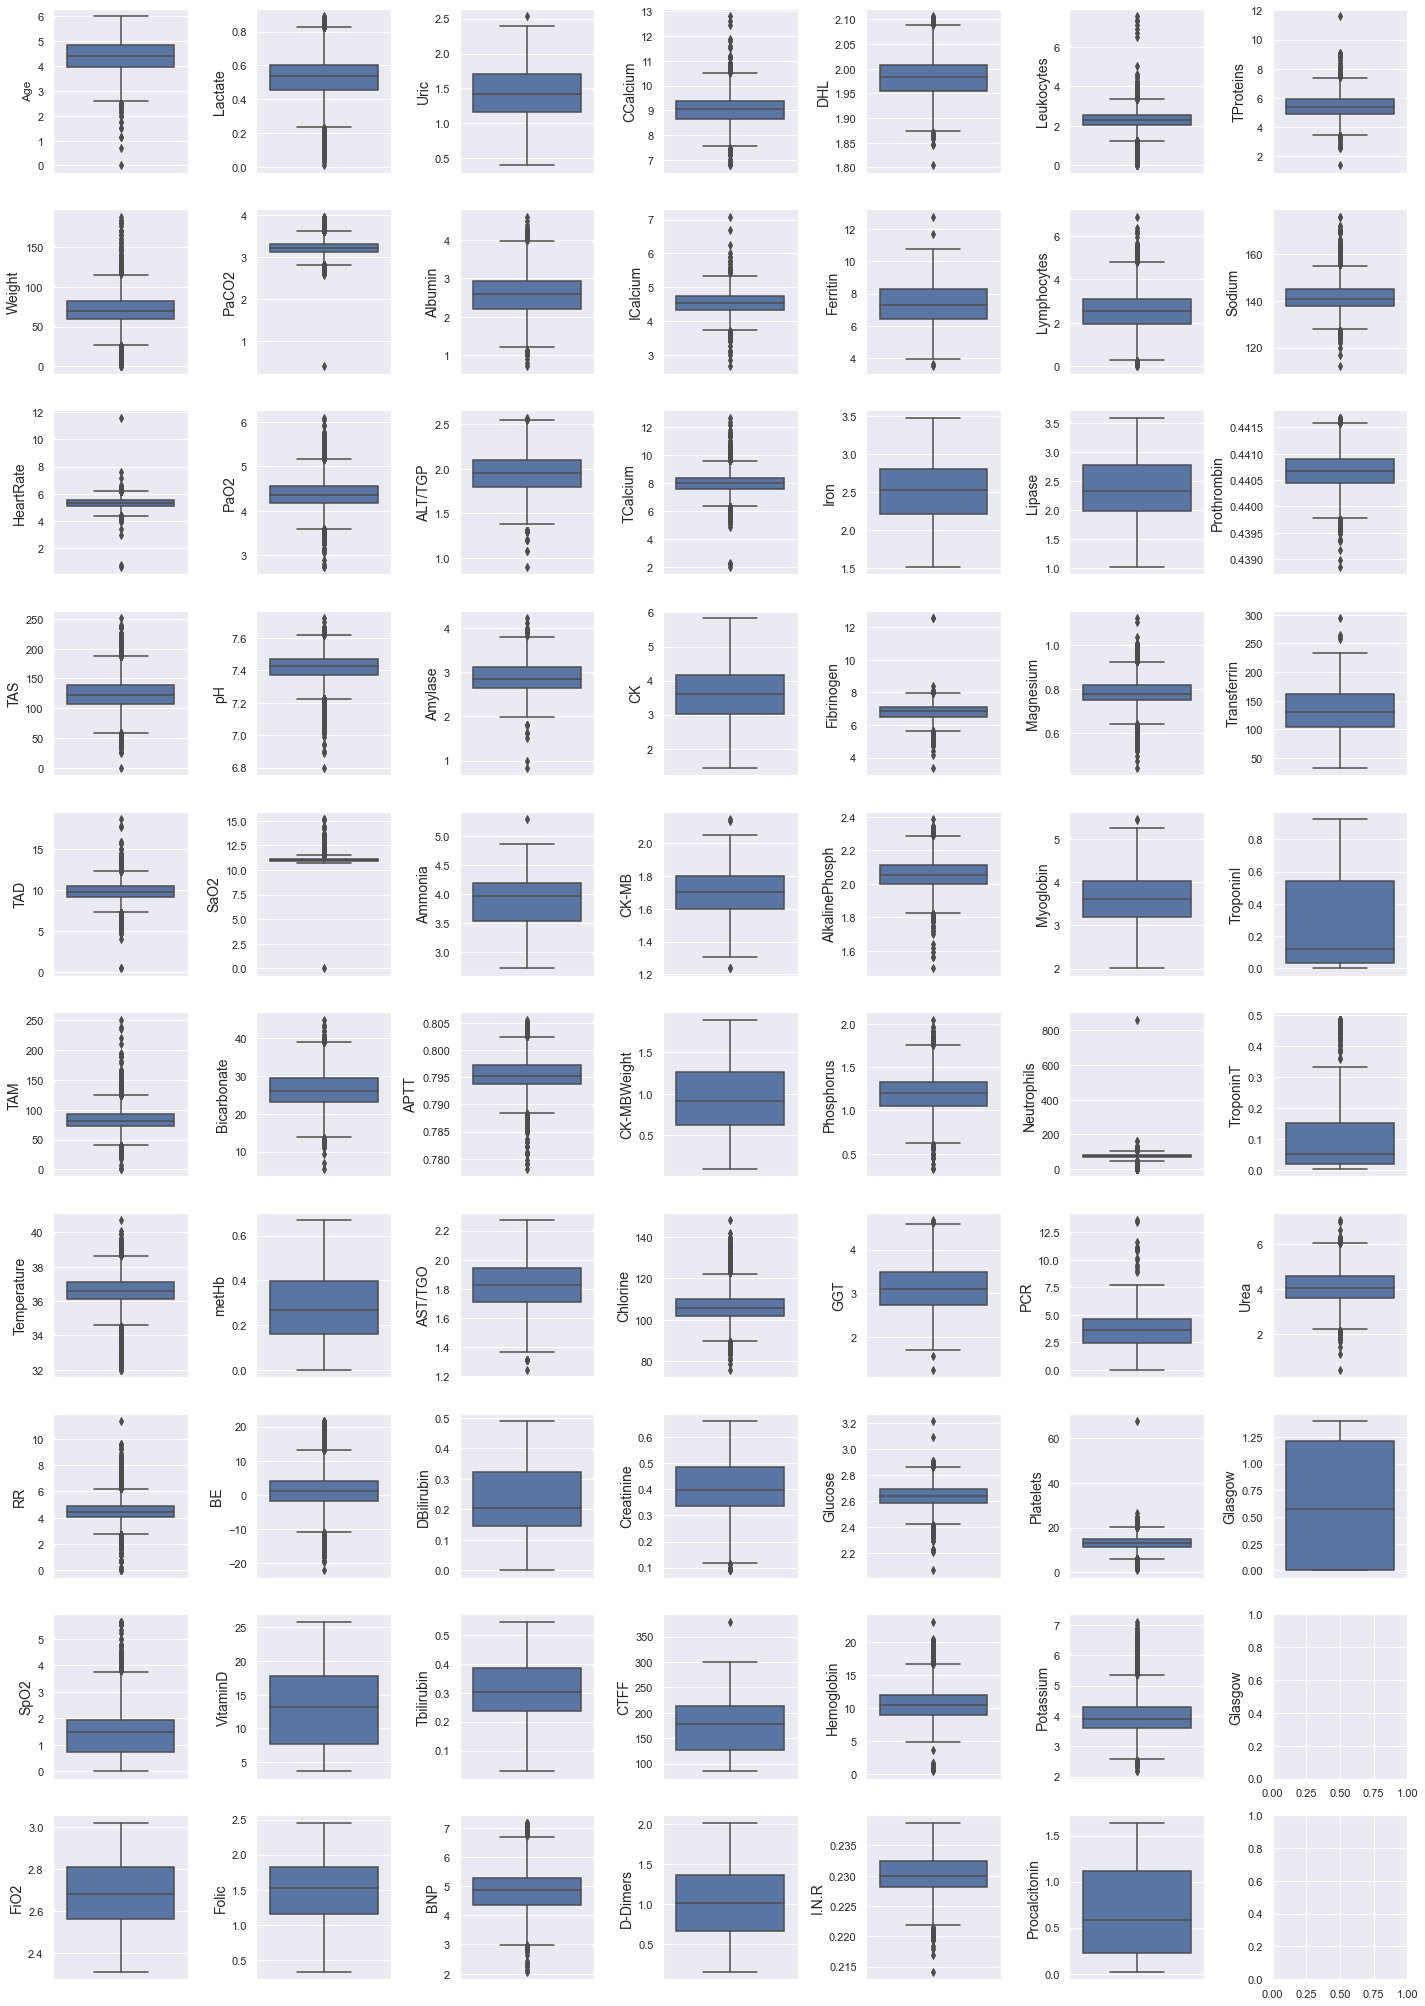

In [31]:
sns.set(rc={"figure.figsize":(20, 28)})

ax1=0
ax2=0
fig, ax = plt.subplots(10,7)

for column in Continuous_Columns:
    sns.boxplot(y=Data_filtered[column], ax=ax[ax1, ax2])

    ax1 +=1
    if ax1== 10:
        ax1=0
        ax2+=1 

    ax[ax1, ax2].set_ylabel(column, fontsize=14)
        
plt.tight_layout()
#plt.savefig('Box Plot of Data after transformation')
plt.show()

In [32]:
len(Data_filtered)

12396

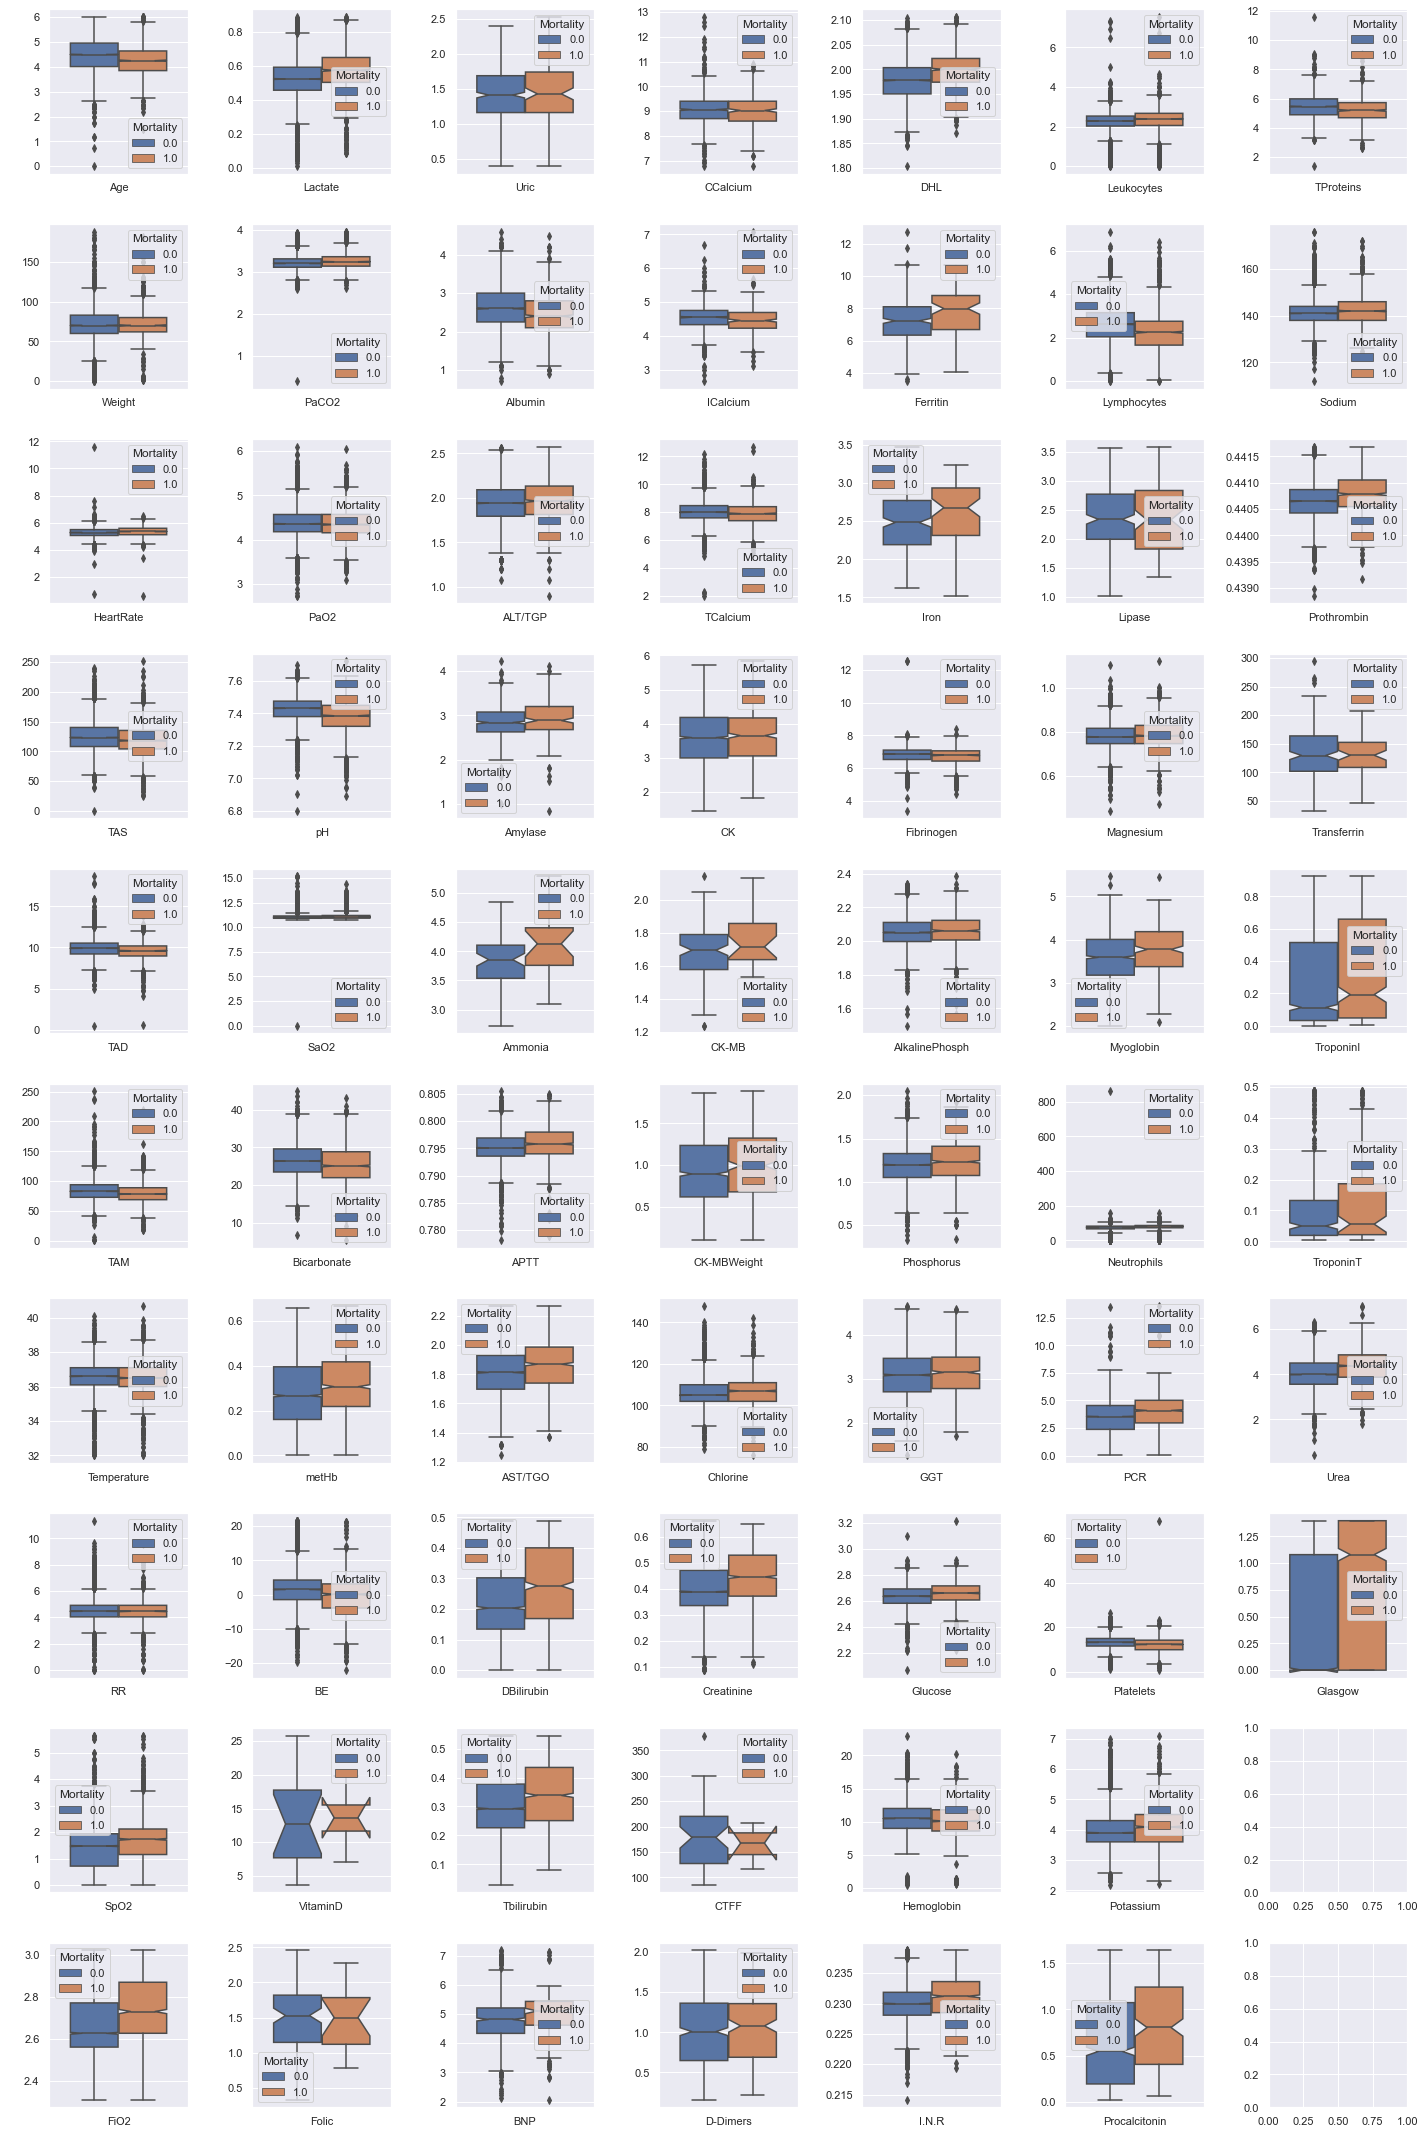

In [35]:
# Comparing distributions of features in the diferent classes

sns.set(rc={"figure.figsize":(20, 30)})

ax1=0
ax2=0
fig, ax = plt.subplots(10,7)

for column in Continuous_Columns:

    Data_Melted = Data_filtered.melt(id_vars=['Mortality'], value_vars=column, var_name='  ', value_name=' ')

    sns.boxplot(data=Data_Melted, x='  ', y=' ', hue='Mortality', notch=True, width=0.7, ax=ax[ax1, ax2])
    ax[ax1, ax2].legend([],[], frameon=False)

    ax1 +=1
    if ax1== 10:
        ax1=0
        ax2+=1 

plt.tight_layout()
#plt.savefig('Box Plot Transformed Distribution for Mortality')  
plt.show()

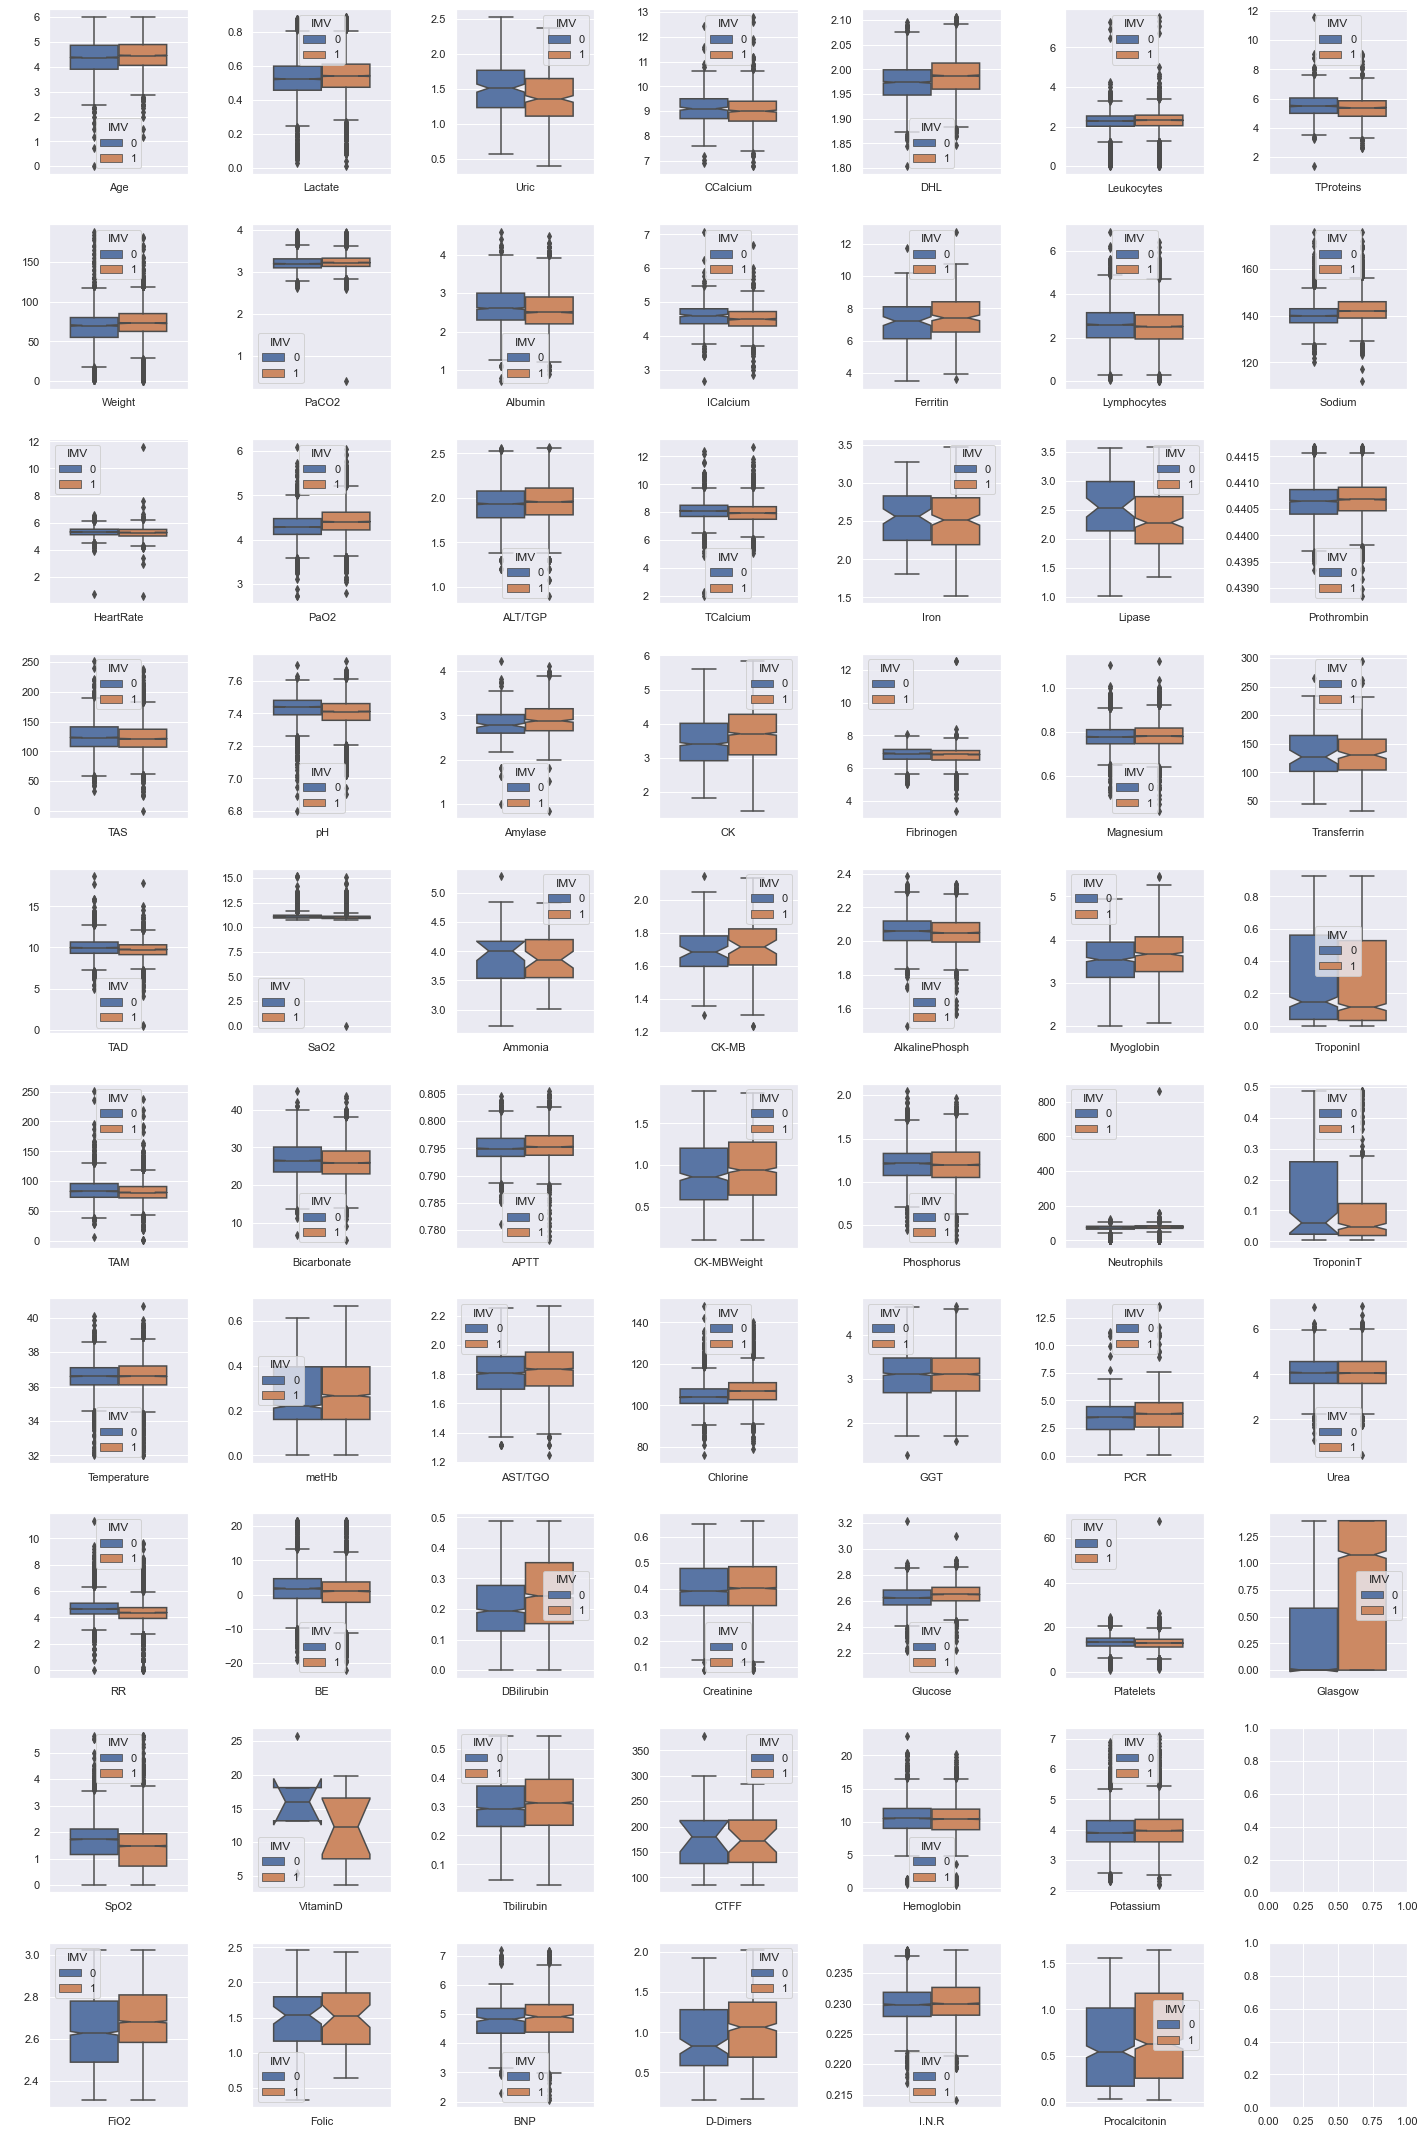

In [36]:
# Comparing distributions of features in the diferent classes

sns.set(rc={"figure.figsize":(20, 30)})

ax1=0
ax2=0
fig, ax = plt.subplots(10,7)

for column in Continuous_Columns:

    Data_Melted = Data_filtered.melt(id_vars=['IMV'], value_vars=column, var_name='  ', value_name=' ')

    sns.boxplot(data=Data_Melted, x='  ', y=' ', hue='IMV', notch=True, width=0.7, ax=ax[ax1, ax2])
    #ax[ax1, ax2].legend([],[], frameon=False)

    ax1 +=1
    if ax1== 10:
        ax1=0
        ax2+=1 

plt.tight_layout()
#plt.savefig('Box Plot Transformed Distribution for IMV')  
plt.show()

There is no big difference on what is considered a very severe outlier for the diferent classes in both cases

In [37]:
Y_M_Data = pd.DataFrame({'Mortality':Data_filtered['Mortality']})
Y_V_Data = pd.DataFrame({'IMV':Data_filtered['IMV']})

Y_M_Counter = Counter(Y_M_Data['Mortality'])
print(Y_M_Counter)
print(' (class 1/total):', Y_M_Counter[1.0]/(Y_M_Counter[0.0]+Y_M_Counter[1.0]))
Y_V_Counter = Counter(Y_V_Data['IMV'])
print(Y_V_Counter)
print(' (class 1/total):', Y_V_Counter[1.0]/(Y_V_Counter[0.0]+Y_V_Counter[1.0]))

Counter({0.0: 10070, 1.0: 2320, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})
 (class 1/total): 0.18724778046811946
Counter({1: 6738, 0: 5658})
 (class 1/total): 0.5435624394966118


In [38]:

for column in Continuous_Columns:

    # get quantiles similar to boxplot
    q_low = Data_filtered[column].quantile(0.25)
    q_hi  = Data_filtered[column].quantile(0.75)

    IQR = q_hi - q_low

    # get values for outliers
    # Here a 3 signifies search for very severe outliers (1.5 would be until the lines of the boxplots)
    # A bigger value for more than severe outliers
    lwr_bound = q_low -(5*IQR)
    upr_bound = q_hi +(5*IQR)

    print(column, lwr_bound, upr_bound)

    Data_filtered = Data_filtered.drop(Data_filtered[Data_filtered[column] > upr_bound].index)
    Data_filtered = Data_filtered.drop(Data_filtered[Data_filtered[column] < lwr_bound].index)

Age -0.584925303361008 9.404283393677709
Weight -50.0 192.0
HeartRate 2.823391819482353 7.739163207786611
TAS -53.0 299.0
TAD 2.9633359707058116 16.714410929028073
TAM -33.0 198.0
Temperature 31.1 42.1
RR -0.3385897241038176 9.296488956631656
SpO2 -5.389820000171158 8.038277003619404
FiO2 1.3352932848813754 4.036445051089034
Lactate -0.2750722802520157 1.3378366277738714
PaCO2 2.1150181616790116 4.311478970553512
PaO2 2.207908799235976 6.537693139529605
pH 6.870000000000002 7.969999999999998
SaO2 9.673341816289883 12.374932868716131
Bicarbonate -8.300000000000004 61.0
metHb -1.0166968500180849 1.5725153514038968
BE -31.38589121512849 33.62959965497658
VitaminD -42.45 67.88000000000001
Folic -2.2147178117181 5.180945755355552
Uric -1.5322736752603534 4.401165867043621
Albumin -1.3999999999999986 6.519999999999999
ALT/TGP 0.27501375991855737 3.6167054671702865
Amylase 0.30477696809169164 5.440360925821854
Ammonia 0.4254640279520334 7.282971529218233
APTT 0.7764084959891505 0.814463631766

In [39]:
Y_M_Data = pd.DataFrame({'Mortality':Data_filtered['Mortality']})
Y_V_Data = pd.DataFrame({'IMV':Data_filtered['IMV']})

Y_M_Counter = Counter(Y_M_Data['Mortality'])
print(Y_M_Counter)
print(' (class 1/total):', Y_M_Counter[1.0]/(Y_M_Counter[0.0]+Y_M_Counter[1.0]))
Y_V_Counter = Counter(Y_V_Data['IMV'])
print(Y_V_Counter)
print(' (class 1/total):', Y_V_Counter[1.0]/(Y_V_Counter[0.0]+Y_V_Counter[1.0]))

Counter({0.0: 9868, 1.0: 2241, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})
 (class 1/total): 0.18506895697415146
Counter({1: 6576, 0: 5539})
 (class 1/total): 0.5427981840693356


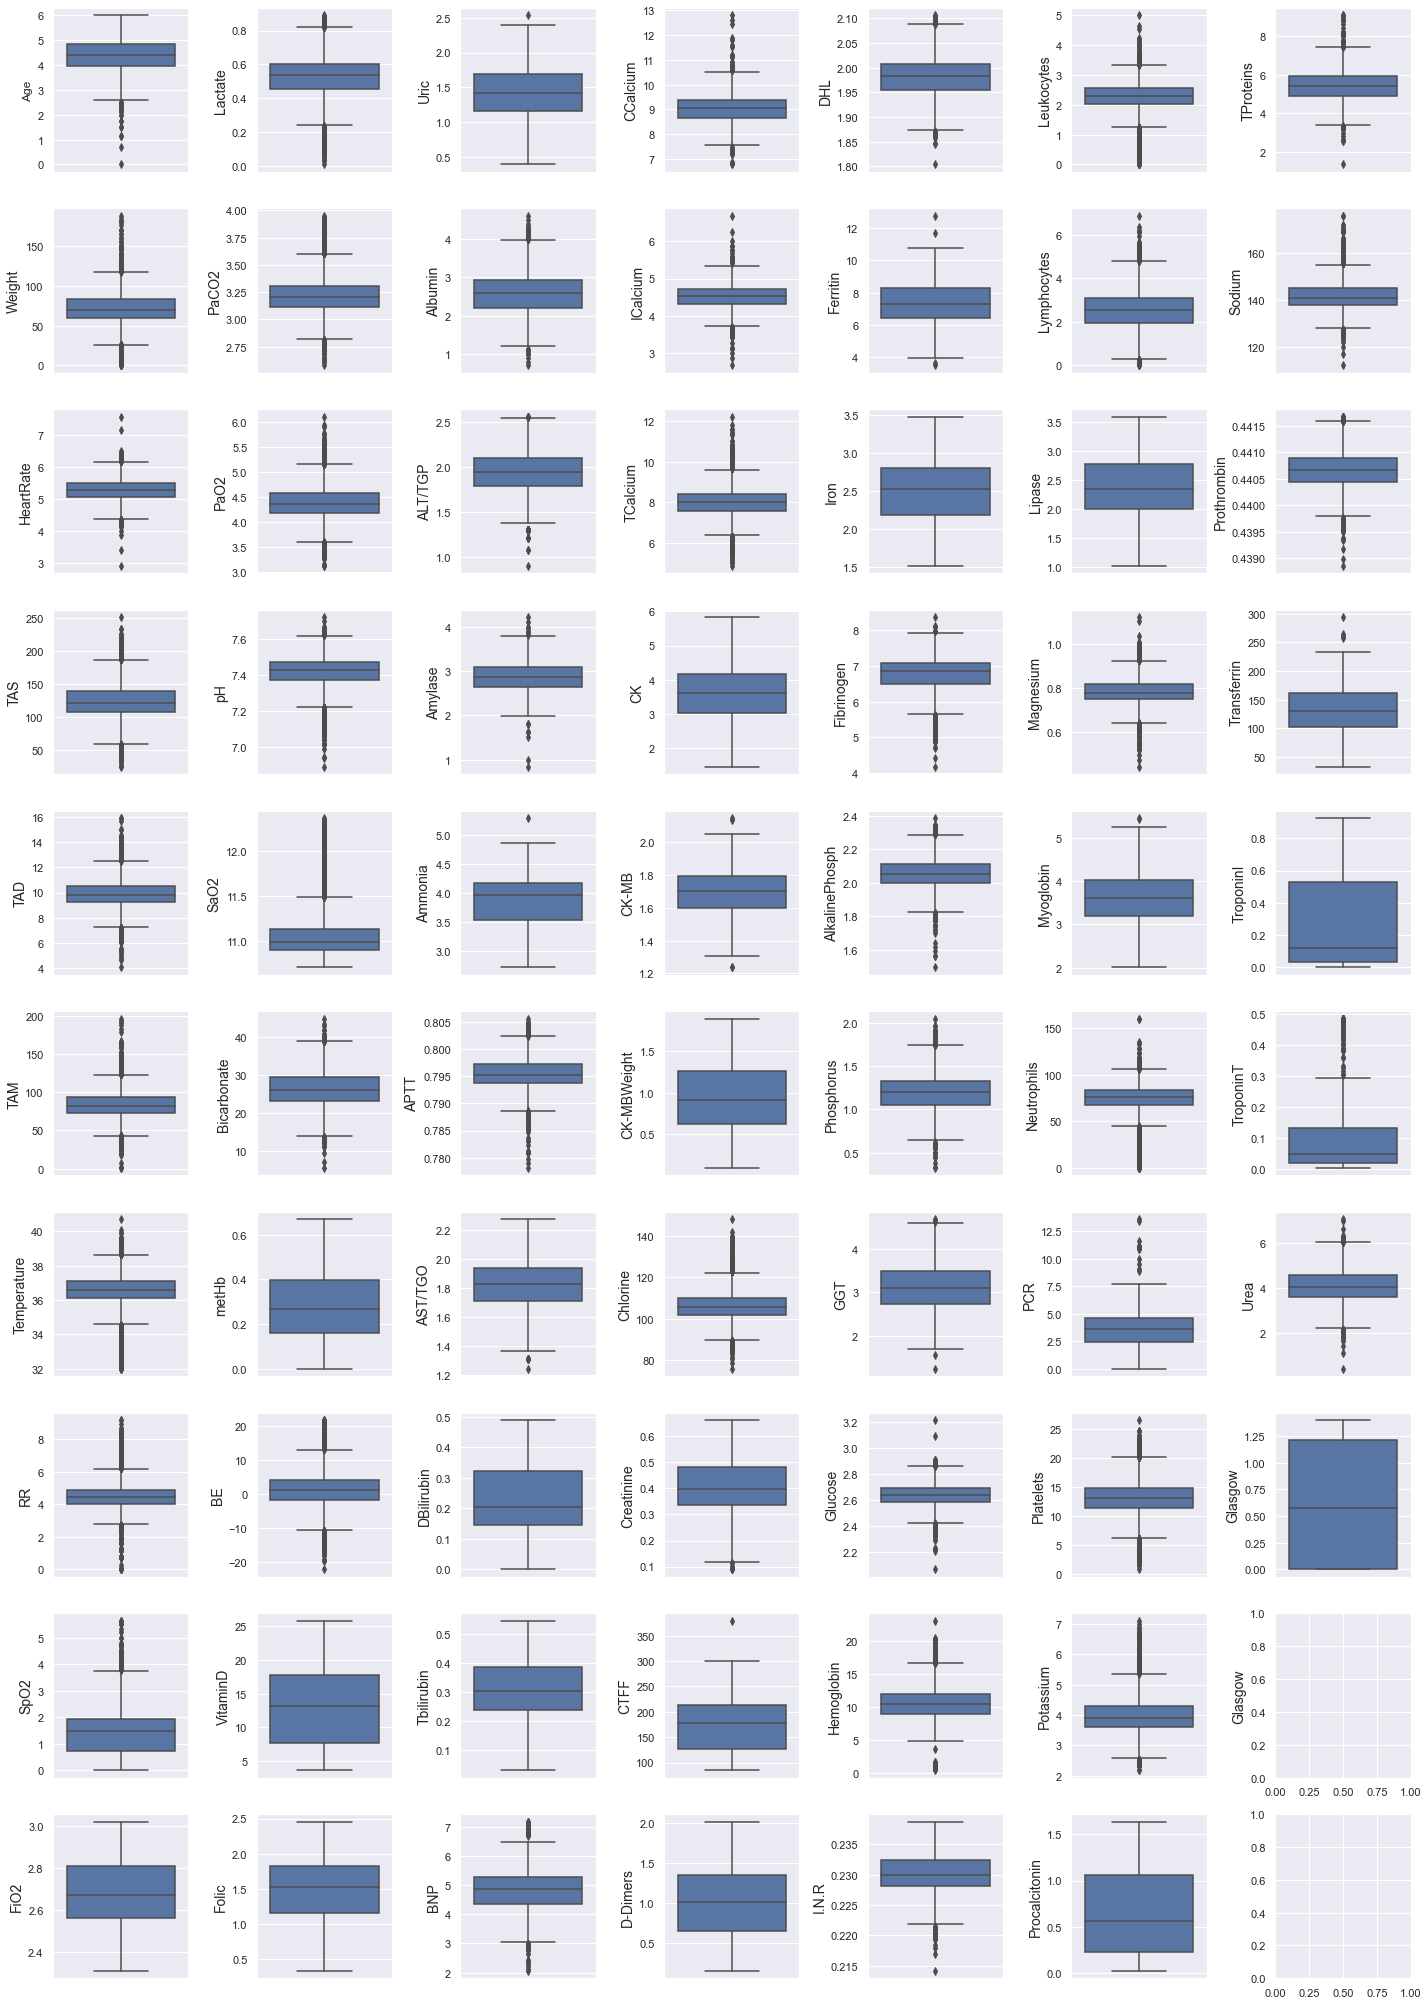

In [ ]:
sns.set(rc={"figure.figsize":(20, 28)})

ax1=0
ax2=0
fig, ax = plt.subplots(10,7)

for column in Continuous_Columns:
    sns.boxplot(y=Data_filtered[column], ax=ax[ax1, ax2])

    ax1 +=1
    if ax1== 10:
        ax1=0
        ax2+=1 

    ax[ax1, ax2].set_ylabel(column, fontsize=14)
         
plt.tight_layout()
#plt.savefig('Box Plot of Data after transformation and outlier removal')
plt.show()

In [ ]:
len(Data_filtered)

12115

# Dealing with Nan data

<AxesSubplot:>

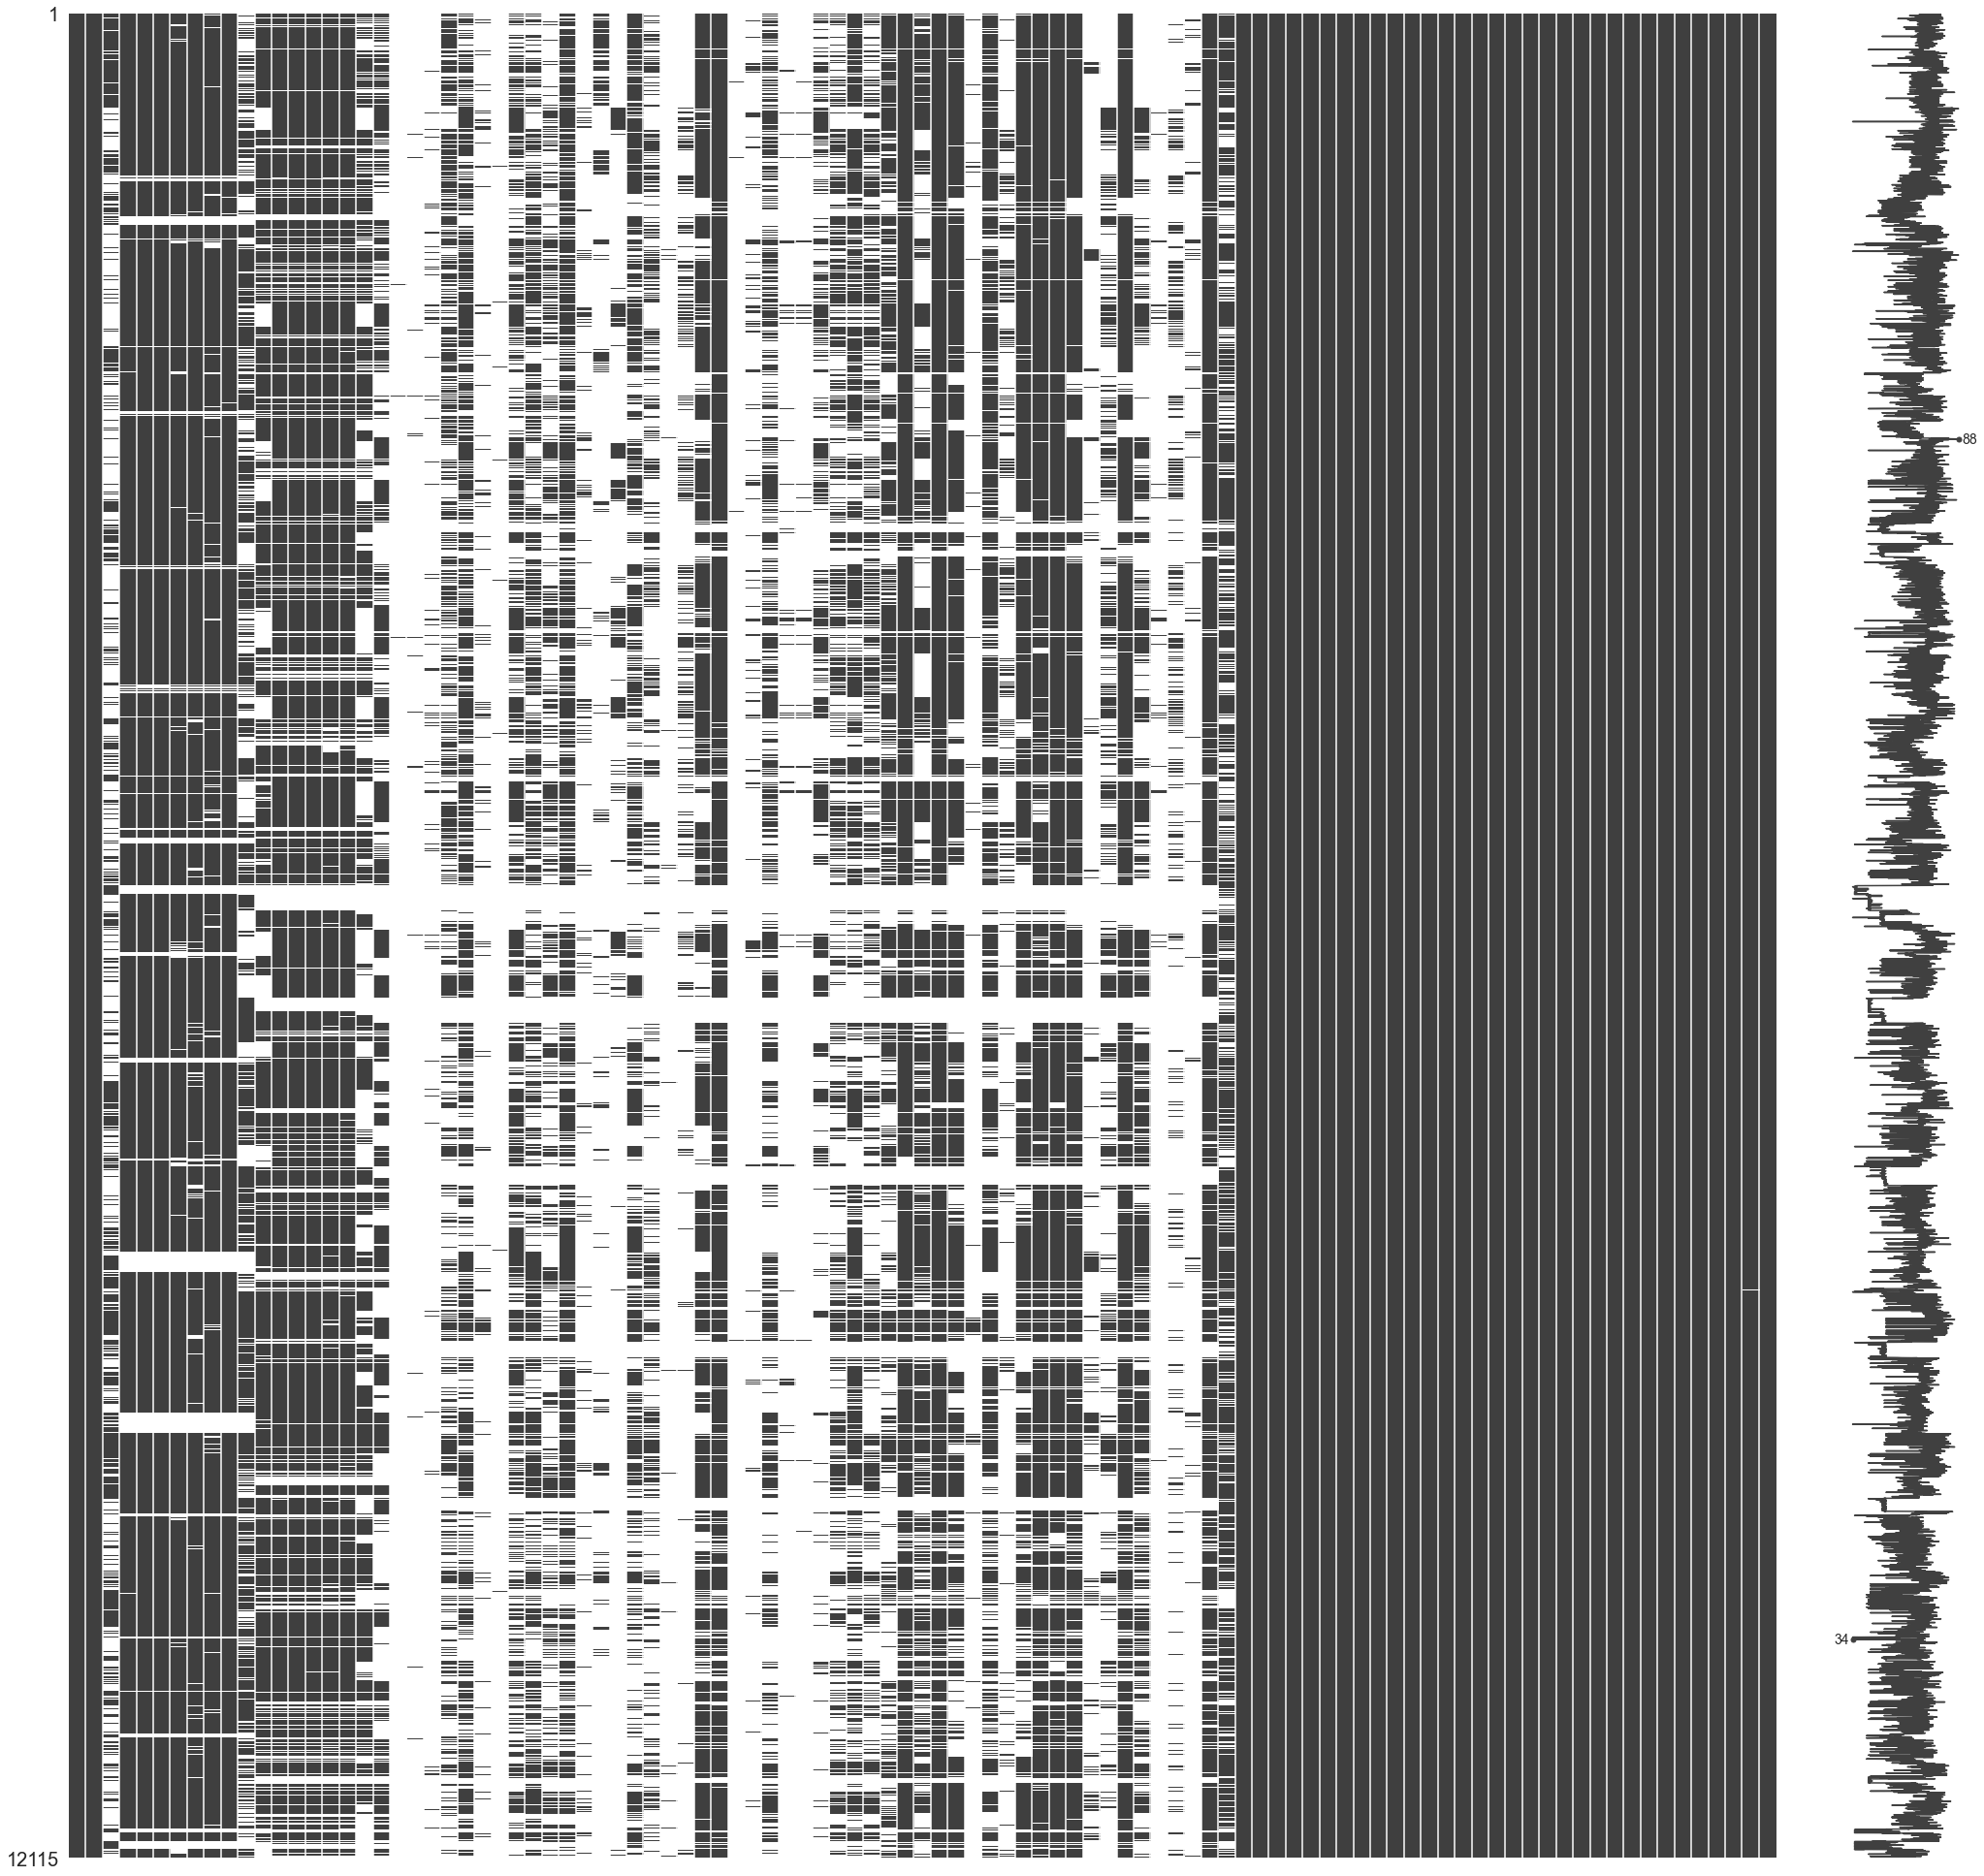

In [ ]:
#matrix showing missing data
msno.matrix(Data_filtered, figsize=(35, 35))

### Eliminating columns

Eliminating Columns with a lot of Nans

In [ ]:
Nan_count_columns = Data_filtered.isna().sum()
# Create a Df for plot purposes
Nan_count_columns = Nan_count_columns.to_frame()
Nan_count_columns['feature'] = Nan_count_columns.index
Nan_count_columns.head()

0    feature
Age           0        Age
Gender        0     Gender
Weight     7207     Weight
HeartRate   811  HeartRate
TAS         806        TAS

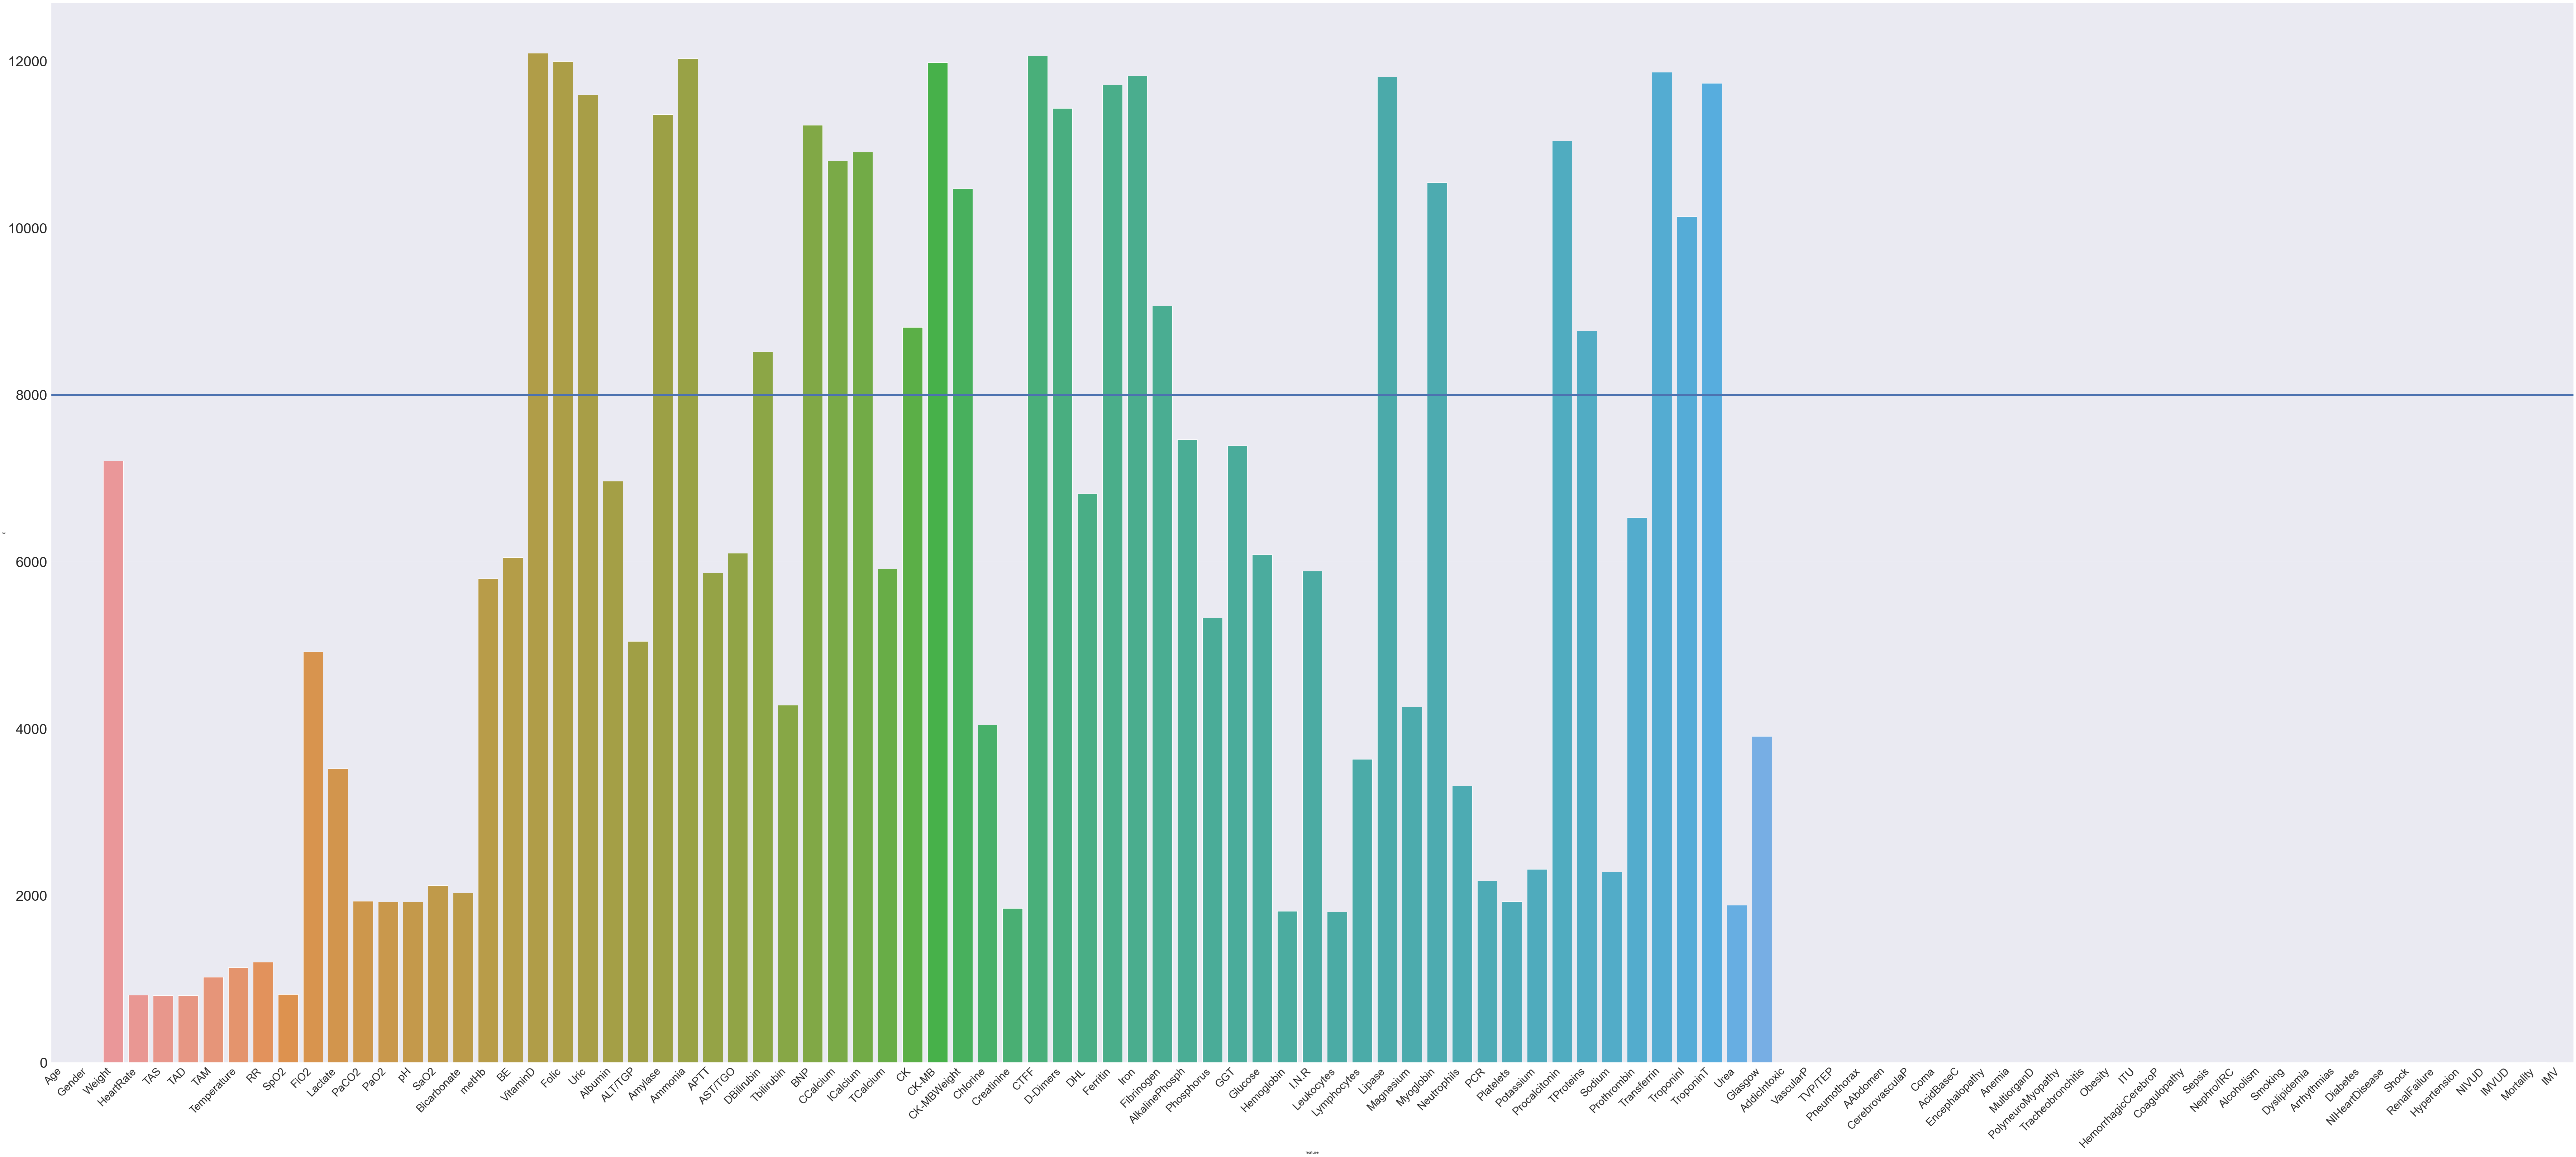

In [ ]:
sns.set(rc={"figure.figsize":(100, 45)})

ax =sns.barplot(data=Nan_count_columns, x='feature', y=0)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=35)
ax.axhline(8000, linewidth=4)
plt.yticks(fontsize = 40)
plt.xticks(fontsize = 30)
plt.tight_layout()
#plt.savefig('Nan Data Count by Varieble')   
plt.show()

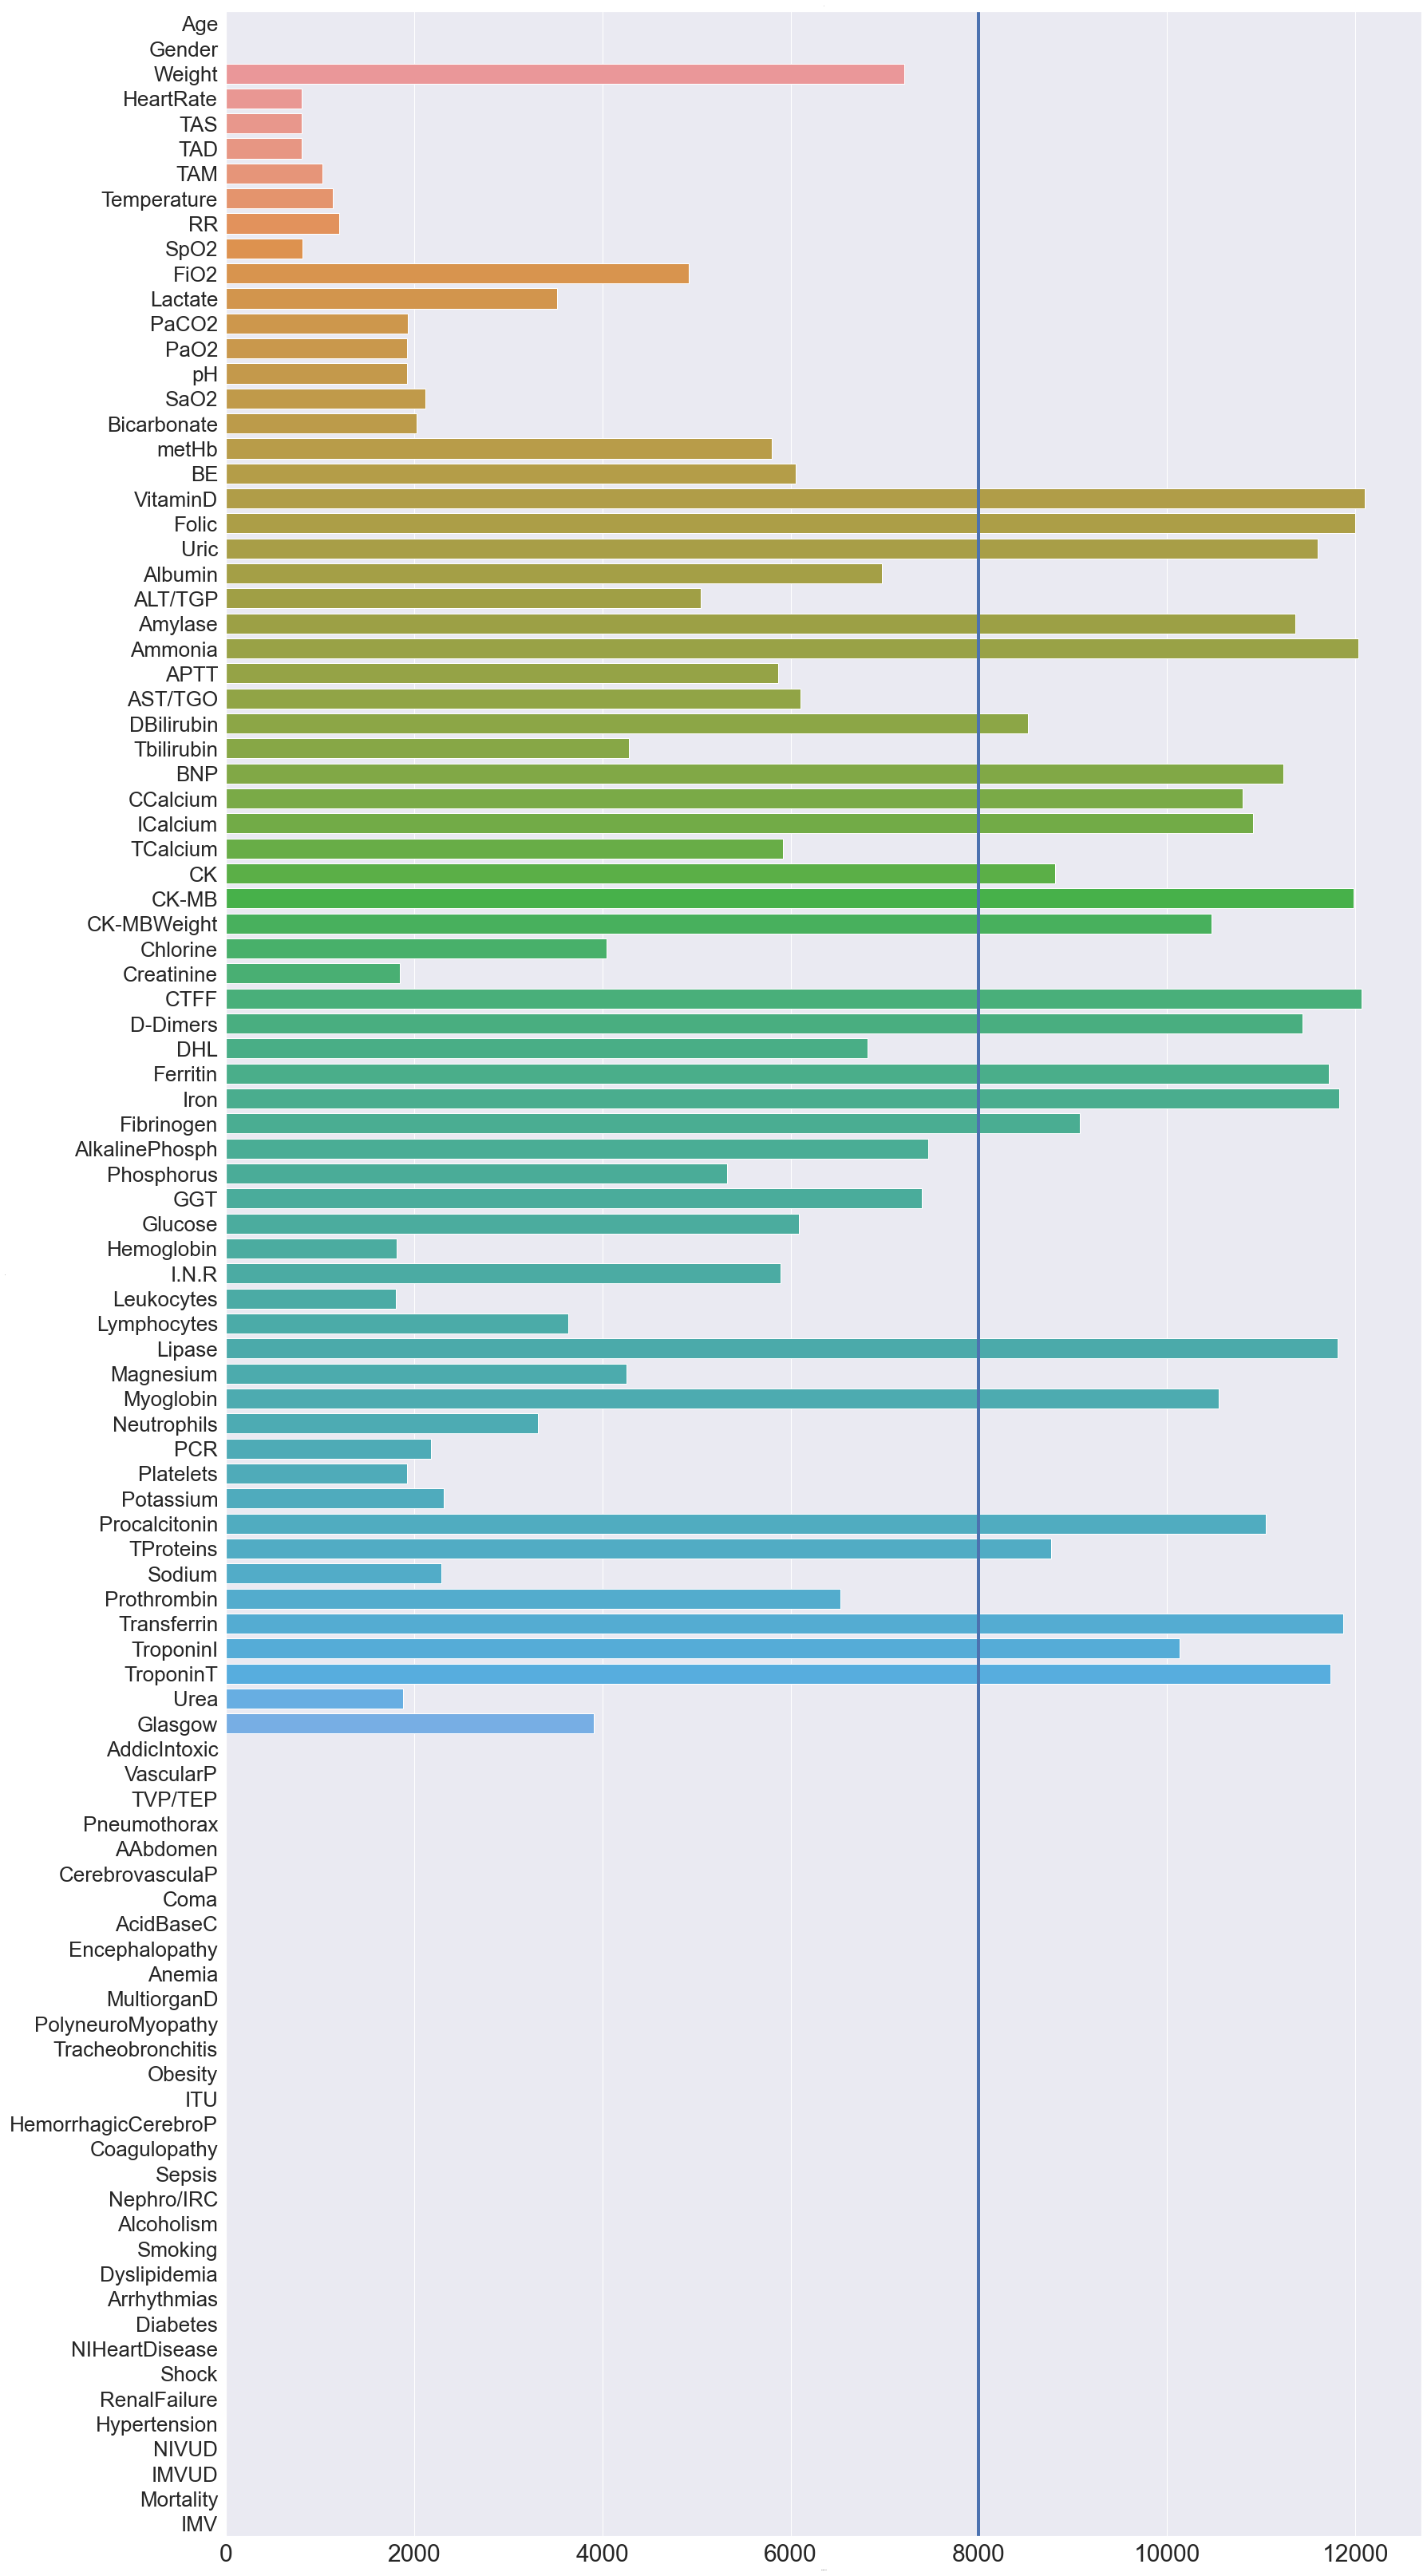

In [ ]:
sns.set(rc={"figure.figsize":(25, 45)})

ax =sns.barplot(data=Nan_count_columns, x=0, y='feature')

#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=50)
fig = ax.get_figure()
plt.yticks(fontsize = 26)
plt.xticks(fontsize = 30)
plt.xlabel('Nan Data Count', fontsize=0)
plt.ylabel('w', fontsize=0)
plt.title('24', fontsize=0)
ax.axvline(8000, linewidth=4)
plt.tight_layout()
#plt.savefig('Nan Data Count by Varieble')    
plt.show()

Text(0.5, 0, 'NaNs #')

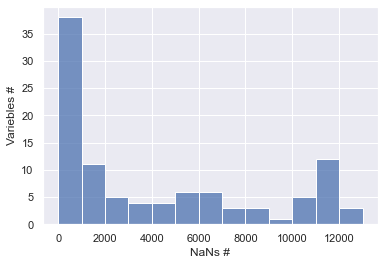

In [ ]:
sns.set(rc={"figure.figsize":(6, 4)})

sns.histplot(data=Nan_count_columns, x=0, binwidth = 1000)

plt.ylabel('Variebles #')
plt.xlabel('NaNs #')

#plt.savefig('Count Variebles by Nan Amount') 

Text(0.5, 0, 'NaNs #')

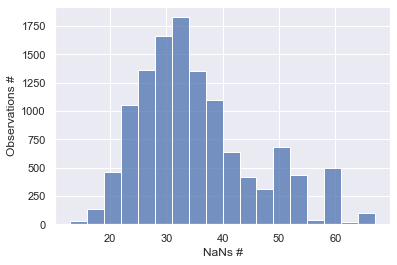

In [ ]:
Nan_count_rows = Data_filtered.isnull().sum(axis=1)
Nan_count_rows = Nan_count_rows.to_frame()
Nan_count_rows.head()

sns.set(rc={"figure.figsize":(6, 4)})

sns.histplot(data=Nan_count_rows, x=0, binwidth = 3)

plt.ylabel('Observations #')
plt.xlabel('NaNs #')

#plt.savefig('Count Observations by Nan Amount')

In [ ]:
Nan_count_columns = Data_filtered.isna().sum()

ToDrop = Nan_count_columns[Nan_count_columns > 8000].index

Data_filtered = Data_filtered.drop(ToDrop, axis=1)

print(ToDrop)

Index(['VitaminD', 'Folic', 'Uric', 'Amylase', 'Ammonia', 'DBilirubin', 'BNP',
       'CCalcium', 'ICalcium', 'CK', 'CK-MB', 'CK-MBWeight', 'CTFF',
       'D-Dimers', 'Ferritin', 'Iron', 'Fibrinogen', 'Lipase', 'Myoglobin',
       'Procalcitonin', 'TProteins', 'Transferrin', 'TroponinI', 'TroponinT'],
      dtype='object')


### Eliminating Rows

In [ ]:
len(Data_filtered.columns)

77

In [ ]:
Data_filtered.head()

Age  Gender  Weight  HeartRate    TAS        TAD   TAM  Temperature  \
0  4.412457       1    75.0   5.114514  151.0  10.463922  98.0         37.5   
1  4.200035       1    85.0   5.385419  102.0   9.372522  71.0         36.1   
2  4.832996       1    47.0   5.186914  140.0  10.924276  99.0         36.9   
3  4.600645       1    70.0   5.416127  116.0   8.627875  69.0         37.3   
4  4.106666       1    80.0   4.417819  165.0   9.527752  93.0         36.0   

         RR      SpO2      FiO2   Lactate     PaCO2      PaO2     pH  \
0  4.465575  1.724080  2.398201  0.430868  3.154212  4.271347  7.520   
1  5.078940  1.724080  2.978466  0.674117  3.172813  4.054864  7.320   
2  3.799364  2.541998  2.728146  0.666854  3.242482  4.524456  7.490   
3  3.923059  1.934597       NaN  0.573408  3.025950  4.086261  7.396   
4  3.230655  0.000000  2.563090  0.573408  3.190916  4.505771  7.420   

        SaO2  Bicarbonate     metHb        BE  Albumin   ALT/TGP      APTT  \
0  10.901338         30.8  0.483597  6.326486      3.0  1.378215  0.792736   
1  11.034999         20.5  0.089019 -6.576900      2.0  2.380557       NaN   
2  10.806462         32.8  0.417782  7.744836      2.4  1.670753  0.794170   
3  11.276735         19.8       NaN       NaN      2.9  1.759278  0.799130   
4  10.894597         25.9  0.395601  1.223142      3.3       NaN       NaN   

    AST/TGO  Tbilirubin  TCalcium  Chlorine  Creatinine       DHL  \
0  1.517527    0.258666       8.8     110.0    0.438764  1.943740   
1  2.207966    0.477723       7.4     100.0    0.560268  2.063833   
2  1.544156    0.226497       8.1     101.0    0.211503  1.959393   
3  1.818769    0.493354       9.0     109.0    0.465580  1.986369   
4  1.709297    0.276296       8.2     111.0    0.440409       NaN   

   AlkalinePhosph  Phosphorus       GGT   Glucose  Hemoglobin     I.N.R  \
0        2.066699    0.949923  3.281311  2.636504        10.4  0.231472   
1        2.173108    1.410564  4.040424       NaN        12.7  0.228089   
2        2.012395    1.117278  2.642546  2.738412         9.6  0.228089   
3             NaN    1.435622  2.794768  2.466200         8.5  0.234401   
4             NaN    0.830384       NaN  2.688310        11.8  0.229979   

   Leukocytes  Lymphocytes  Magnesium  Neutrophils       PCR  Platelets  \
0    1.882783     2.819704   0.778755    71.525703  1.705371  12.664256   
1    1.334626     1.678860   0.792860    83.531319  2.948411   9.253737   
2    1.975709     1.770725   0.748074    80.405040  3.933468  11.799472   
3    2.956021     2.214943   0.748074    79.709792  1.437503   9.020424   
4    2.364642     2.261078   0.792860    77.796862  4.416836  11.888241   

   Potassium  Sodium  Prothrombin      Urea   Glasgow  AddicIntoxic  \
0       3.22   149.0          NaN  4.493597  1.397658             0   
1       4.86   135.0          NaN  4.987677  1.397658             0   
2       3.16   142.0          NaN  3.066477  1.397658             0   
3       3.77   145.0          NaN  5.096855 -0.000000             0   
4       3.93   145.0          NaN  4.153772  1.294202             0   

   VascularP  TVP/TEP  Pneumothorax  AAbdomen  CerebrovasculaP  Coma  \
0          1        0             0         0                0     0   
1          0        0             0         0                0     0   
2          0        0             0         0                0     0   
3          0        0             0         0                0     0   
4          0        0             0         0                0     0   

   AcidBaseC  Encephalopathy  Anemia  MultiorganD  PolyneuroMyopathy  \
0          0               0       0            0                  0   
1          0               0       0            1                  0   
2          0               0       0            0                  0   
3          0               0       0            0                  0   
4          0               0       0            0                  0   

   Tracheobronchitis 

In [ ]:
Y_M_Data = pd.DataFrame({'Mortality':Data_filtered['Mortality']})
Y_V_Data = pd.DataFrame({'IMV':Data_filtered['IMV']})

Y_M_Counter = Counter(Y_M_Data['Mortality'])
print(Y_M_Counter)
print(' (class 1/total):', Y_M_Counter[1.0]/(Y_M_Counter[0.0]+Y_M_Counter[1.0]))
Y_V_Counter = Counter(Y_V_Data['IMV'])
print(Y_V_Counter)
print(' (class 1/total):', Y_V_Counter[1.0]/(Y_V_Counter[0.0]+Y_V_Counter[1.0]))

Counter({0.0: 9868, 1.0: 2241, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})
 (class 1/total): 0.18506895697415146
Counter({1: 6576, 0: 5539})
 (class 1/total): 0.5427981840693356


In [ ]:
Nan_count_rows = Data_filtered.isnull().sum(axis=1)
Nan_count_rows = Nan_count_rows.to_frame()
Nan_count_rows.head()

0
0  1
1  3
2  1
3  5
4  6

Text(0.5, 0, 'NaNs #')

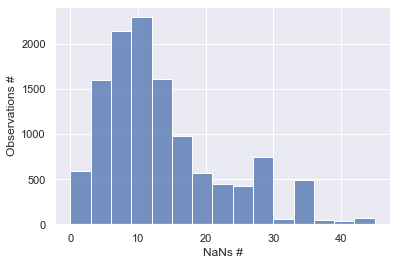

In [ ]:
sns.set(rc={"figure.figsize":(6, 4)})

sns.histplot(data=Nan_count_rows, x=0, binwidth = 3)

plt.ylabel('Observations #')
plt.xlabel('NaNs #')

#plt.savefig('Count Observations by Nan Amount')

In [ ]:
len(Data_filtered)

12115

In [ ]:
# Eliminateing rows with more than a number of Nans

Data_filtered = Data_filtered[Data_filtered.isnull().sum(axis=1) < 23]

In [ ]:
Y_M_Data = pd.DataFrame({'Mortality':Data_filtered['Mortality']})
Y_V_Data = pd.DataFrame({'IMV':Data_filtered['IMV']})

Y_M_Counter = Counter(Y_M_Data['Mortality'])
print(Y_M_Counter)
print(' (class 1/total):', Y_M_Counter[1.0]/(Y_M_Counter[0.0]+Y_M_Counter[1.0]))
Y_V_Counter = Counter(Y_V_Data['IMV'])
print(Y_V_Counter)
print(' (class 1/total):', Y_V_Counter[1.0]/(Y_V_Counter[0.0]+Y_V_Counter[1.0]))

Counter({0.0: 8196, 1.0: 1887, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})
 (class 1/total): 0.18714668253495984
Counter({1: 5736, 0: 4352})
 (class 1/total): 0.5685963521015067


In [ ]:
len(Data_filtered)

10088

### Final Nans distribution

<AxesSubplot:>

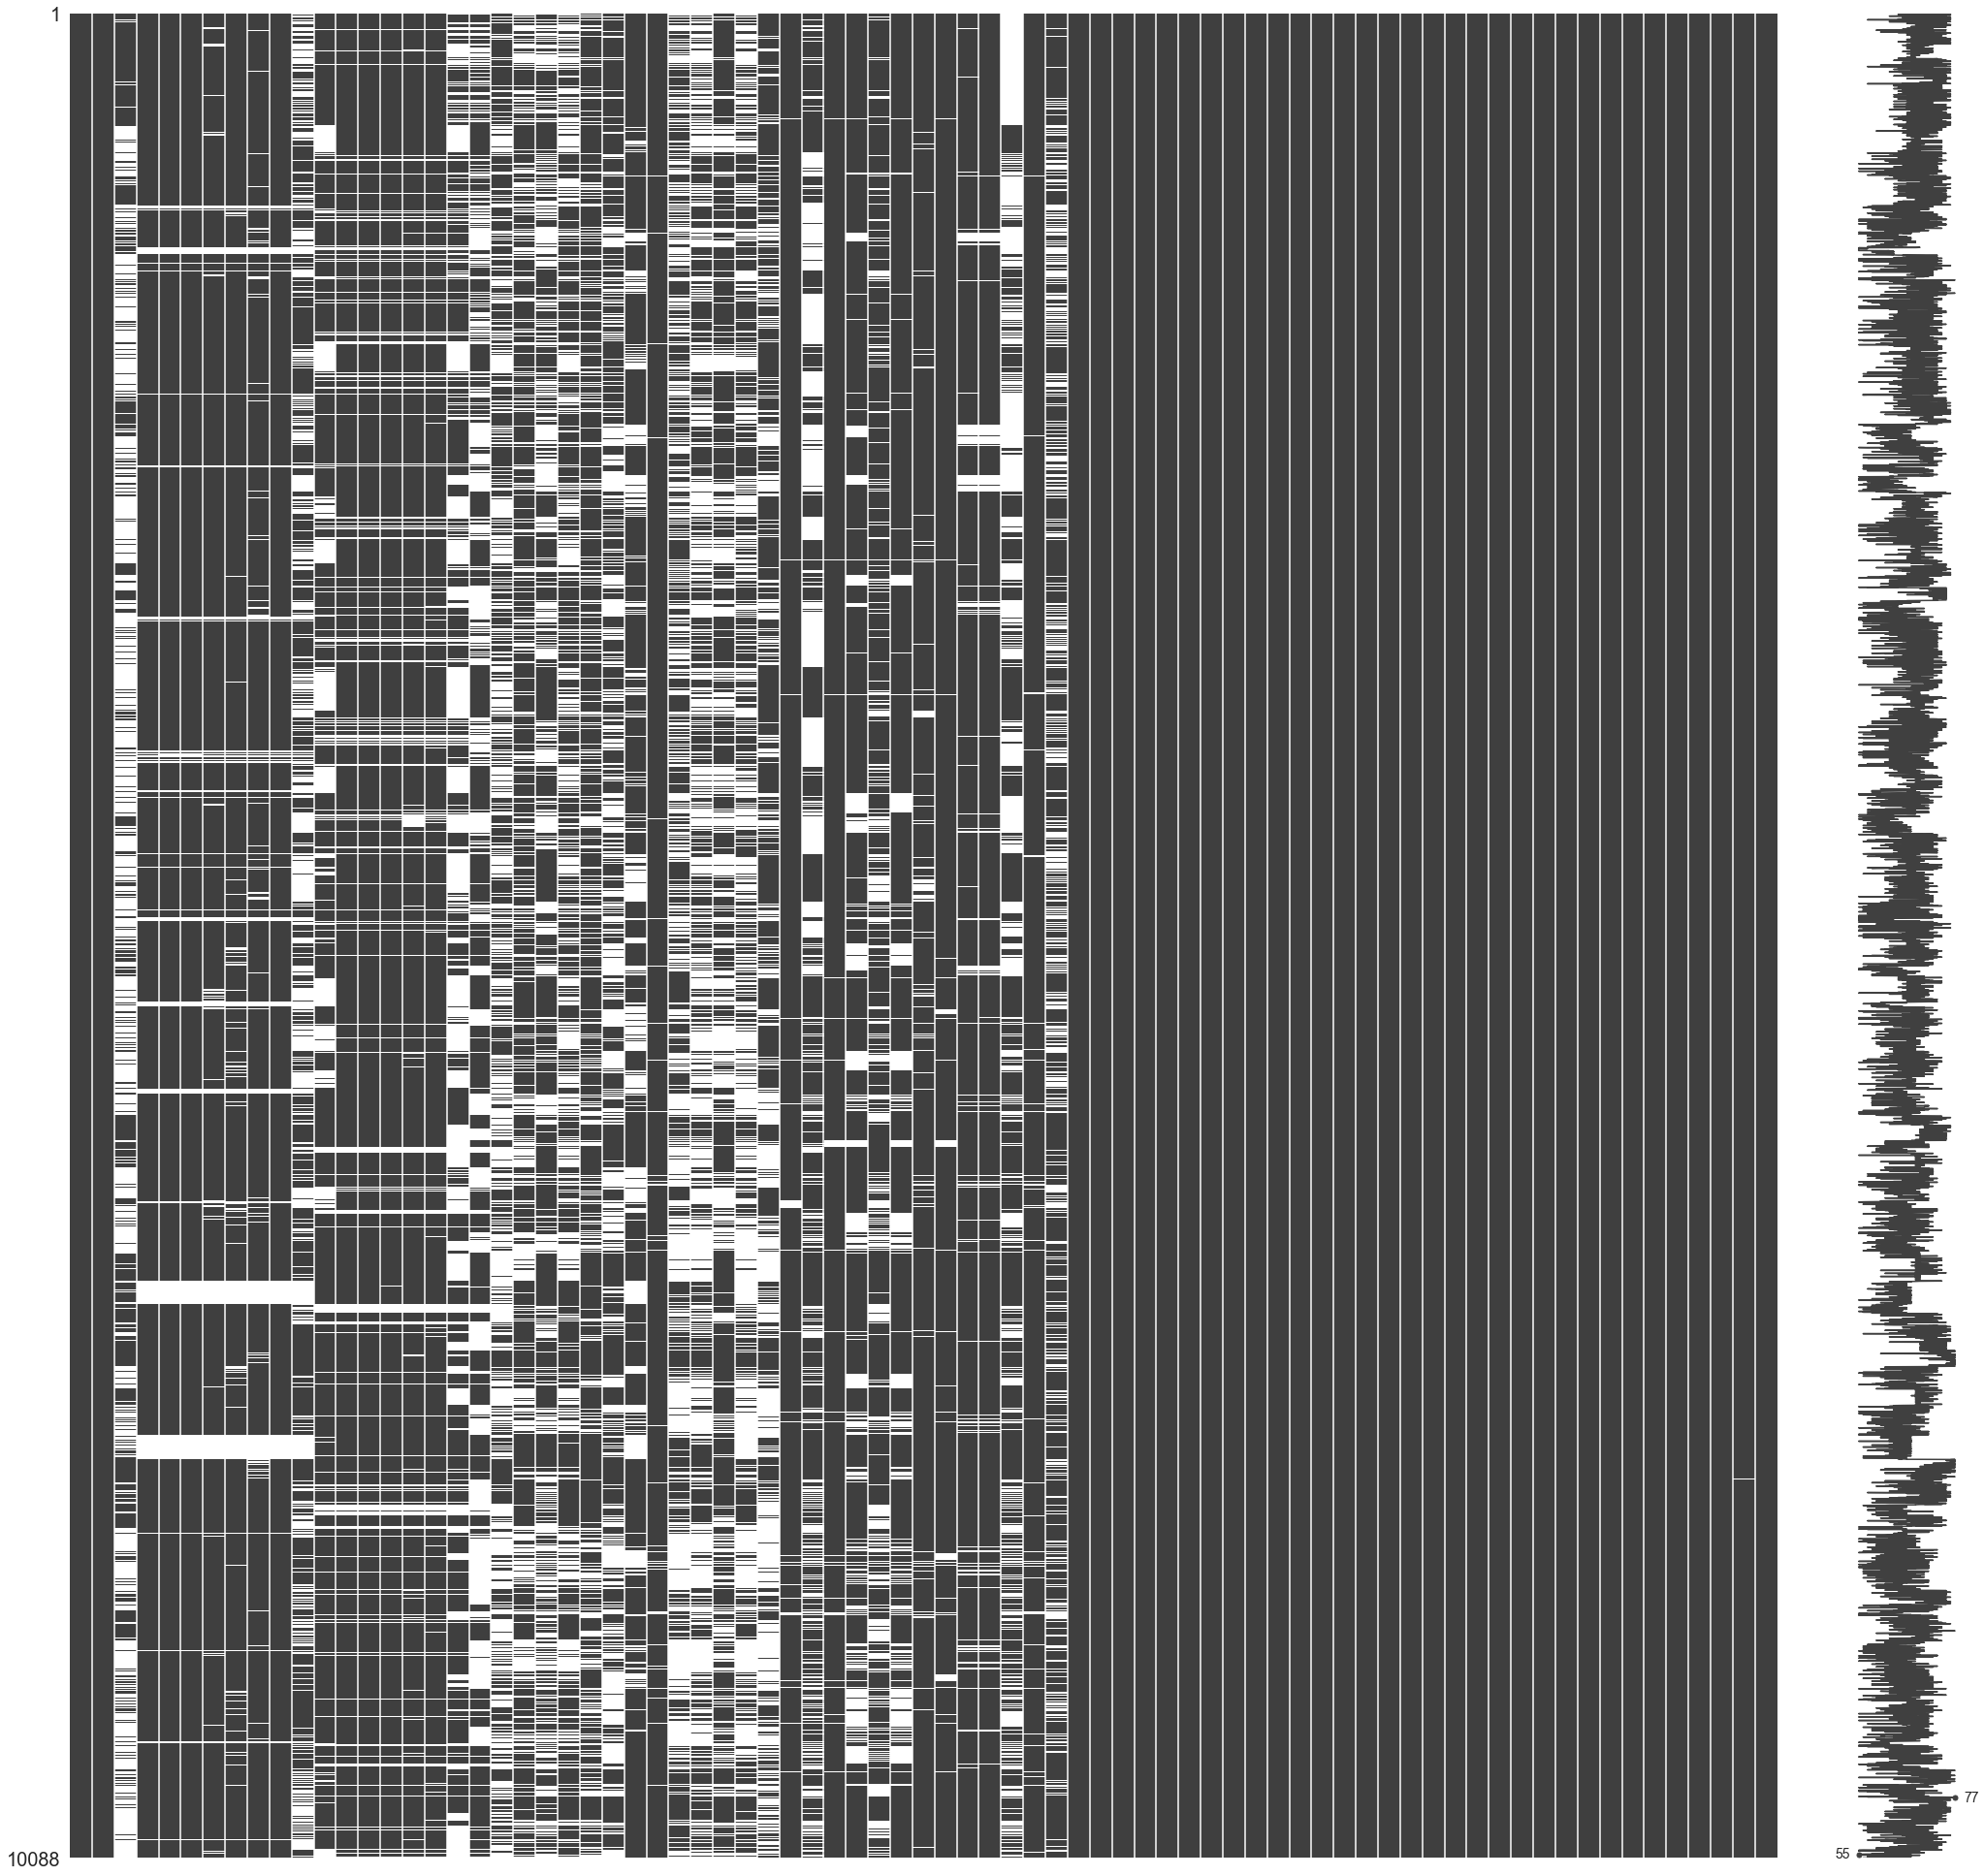

In [ ]:
#matrix showing missing data
msno.matrix(Data_filtered, figsize=(35, 35))

# Standardizing Data

#### In the case of Standard Scaler

Removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way.

- mean - 0

- standard deviation - 1

In [ ]:
Data_Scaled = Data_filtered.copy()

In [ ]:
Data_Scaled.head()

Age  Gender  Weight  HeartRate    TAS        TAD   TAM  Temperature  \
0  4.412457       1    75.0   5.114514  151.0  10.463922  98.0         37.5   
1  4.200035       1    85.0   5.385419  102.0   9.372522  71.0         36.1   
2  4.832996       1    47.0   5.186914  140.0  10.924276  99.0         36.9   
3  4.600645       1    70.0   5.416127  116.0   8.627875  69.0         37.3   
4  4.106666       1    80.0   4.417819  165.0   9.527752  93.0         36.0   

         RR      SpO2      FiO2   Lactate     PaCO2      PaO2     pH  \
0  4.465575  1.724080  2.398201  0.430868  3.154212  4.271347  7.520   
1  5.078940  1.724080  2.978466  0.674117  3.172813  4.054864  7.320   
2  3.799364  2.541998  2.728146  0.666854  3.242482  4.524456  7.490   
3  3.923059  1.934597       NaN  0.573408  3.025950  4.086261  7.396   
4  3.230655  0.000000  2.563090  0.573408  3.190916  4.505771  7.420   

        SaO2  Bicarbonate     metHb        BE  Albumin   ALT/TGP      APTT  \
0  10.901338         30.8  0.483597  6.326486      3.0  1.378215  0.792736   
1  11.034999         20.5  0.089019 -6.576900      2.0  2.380557       NaN   
2  10.806462         32.8  0.417782  7.744836      2.4  1.670753  0.794170   
3  11.276735         19.8       NaN       NaN      2.9  1.759278  0.799130   
4  10.894597         25.9  0.395601  1.223142      3.3       NaN       NaN   

    AST/TGO  Tbilirubin  TCalcium  Chlorine  Creatinine       DHL  \
0  1.517527    0.258666       8.8     110.0    0.438764  1.943740   
1  2.207966    0.477723       7.4     100.0    0.560268  2.063833   
2  1.544156    0.226497       8.1     101.0    0.211503  1.959393   
3  1.818769    0.493354       9.0     109.0    0.465580  1.986369   
4  1.709297    0.276296       8.2     111.0    0.440409       NaN   

   AlkalinePhosph  Phosphorus       GGT   Glucose  Hemoglobin     I.N.R  \
0        2.066699    0.949923  3.281311  2.636504        10.4  0.231472   
1        2.173108    1.410564  4.040424       NaN        12.7  0.228089   
2        2.012395    1.117278  2.642546  2.738412         9.6  0.228089   
3             NaN    1.435622  2.794768  2.466200         8.5  0.234401   
4             NaN    0.830384       NaN  2.688310        11.8  0.229979   

   Leukocytes  Lymphocytes  Magnesium  Neutrophils       PCR  Platelets  \
0    1.882783     2.819704   0.778755    71.525703  1.705371  12.664256   
1    1.334626     1.678860   0.792860    83.531319  2.948411   9.253737   
2    1.975709     1.770725   0.748074    80.405040  3.933468  11.799472   
3    2.956021     2.214943   0.748074    79.709792  1.437503   9.020424   
4    2.364642     2.261078   0.792860    77.796862  4.416836  11.888241   

   Potassium  Sodium  Prothrombin      Urea   Glasgow  AddicIntoxic  \
0       3.22   149.0          NaN  4.493597  1.397658             0   
1       4.86   135.0          NaN  4.987677  1.397658             0   
2       3.16   142.0          NaN  3.066477  1.397658             0   
3       3.77   145.0          NaN  5.096855 -0.000000             0   
4       3.93   145.0          NaN  4.153772  1.294202             0   

   VascularP  TVP/TEP  Pneumothorax  AAbdomen  CerebrovasculaP  Coma  \
0          1        0             0         0                0     0   
1          0        0             0         0                0     0   
2          0        0             0         0                0     0   
3          0        0             0         0                0     0   
4          0        0             0         0                0     0   

   AcidBaseC  Encephalopathy  Anemia  MultiorganD  PolyneuroMyopathy  \
0          0               0       0            0                  0   
1          0               0       0            1                  0   
2          0               0       0            0                  0   
3          0               0       0            0                  0   
4          0               0       0            0                  0   

   Tracheobronchitis 

In [ ]:
cols = Data_Scaled.columns.tolist()

In [ ]:
Data_Scaled[cols[:-2]] = StandardScaler().fit_transform(Data_Scaled[cols[:-2]])

In [ ]:
Data_Scaled.head()

Age    Gender    Weight  HeartRate       TAS       TAD       TAM  \
0  0.006481 -0.686438  0.069274  -0.486473  1.098887  0.590664  0.874776   
1 -0.327977 -0.686438  0.540062   0.332892 -0.928519 -0.472900 -0.777365   
2  0.668620 -0.686438 -1.248933  -0.267493  0.643755  1.039277  0.935966   
3  0.302783 -0.686438 -0.166120   0.425770 -0.349260 -1.198556 -0.899746   
4 -0.474987 -0.686438  0.304668  -2.593655  1.678145 -0.321630  0.568824   

   Temperature        RR      SpO2      FiO2   Lactate     PaCO2      PaO2  \
0     1.055836 -0.046043  0.349353 -1.672807 -0.867199 -0.365546 -0.412212   
1    -0.598998  0.746717  0.349353  1.903559  1.161667 -0.252980 -1.125666   
2     0.346621 -0.907104  1.299887  0.360751  1.101081  0.168645  0.421947   
3     0.819431 -0.747231  0.594002       NaN  0.321678 -1.141759 -1.022191   
4    -0.717200 -1.642146 -1.654269 -0.656546  0.321678 -0.143423  0.360369   

         pH      SaO2  Bicarbonate     metHb        BE   Albumin   ALT/TGP  \
0  1.324670 -0.637208     0.908581  1.365303  0.974056  0.786719 -2.470991   
1 -1.175212 -0.072847    -1.233444 -1.242004 -1.426185 -1.057664  1.869032   
2  0.949687 -1.037806     1.324508  0.930408  1.237892 -0.319911 -1.204338   
3 -0.225257  0.947843    -1.379019       NaN       NaN  0.602280 -0.821033   
4  0.074729 -0.665669    -0.110441  0.783839  0.024750  1.340034       NaN   

       APTT   AST/TGO  Tbilirubin  TCalcium  Chlorine  Creatinine       DHL  \
0 -0.937705 -1.838641   -0.501150  1.093903  0.573662    0.266441 -0.935316   
1       NaN  2.269696    1.626337 -0.839937 -0.899979    1.459010  2.069866   
2 -0.430825 -1.680185   -0.813569  0.126983 -0.752615   -1.964143 -0.543619   
3  1.322729 -0.046152    1.778141  1.370166  0.426298    0.529647  0.131440   
4       NaN -0.697543   -0.329929  0.265114  0.721026    0.282585       NaN   

   AlkalinePhosph  Phosphorus       GGT   Glucose  Hemoglobin     I.N.R  \
0        0.113930   -1.153605  0.333634 -0.067142   -0.024084  0.385854   
1        1.282337    1.000166  1.760151       NaN    0.998693 -0.624169   
2       -0.482341   -0.371121 -0.866725  1.178837   -0.379833 -0.624169   
3             NaN    1.117327 -0.580672 -2.149379   -0.868988  1.260483   
4             NaN   -1.712521       NaN  0.566266    0.598476 -0.059811   

   Leukocytes  Lymphocytes  Magnesium  Neutrophils       PCR  Platelets  \
0   -0.841407     0.364156  -0.053073    -0.074460 -1.236705  -0.109234   
1   -2.017358    -0.929793   0.183582     0.538497 -0.399801  -1.218457   
2   -0.642056    -0.825598  -0.567836     0.378883  0.263411  -0.390492   
3    1.460987    -0.321765  -0.567836     0.343386 -1.417054  -1.294338   
4    0.192314    -0.269439   0.183582     0.245720  0.588849  -0.361622   

   Potassium    Sodium  Prothrombin      Urea   Glasgow  AddicIntoxic  \
0  -1.305071  1.302366          NaN  0.555541  1.453192     -0.138177   
1   1.481452 -1.159070          NaN  1.242041  1.453192     -0.138177   
2  -1.407016  0.071648          NaN -1.427375  1.453192     -0.138177   
3  -0.370566  0.599099          NaN  1.393739 -0.946983     -0.138177   
4  -0.098710  0.599099          NaN  0.083369  1.275528     -0.138177   

   VascularP   TVP/TEP  Pneumothorax  AAbdomen  CerebrovasculaP      Coma  \
0   6.405727 -0.155443     -0.165517 -0.180412        -0.182742 -0.176867   
1  -0.156110 -0.155443     -0.165517 -0.180412        -0.182742 -0.176867   
2  -0.156110 -0.155443     -0.165517 -0.180412        -0.182742 -0.176867   
3  -0.156110 -0.155443     -0.165517 -0.180412        -0.182742 -0.176867   
4  -0.156110 -0.155443     -0.165517 -0.180412        -0.182742 -0.176867   

   AcidBaseC  Encephalopathy   Anemia  MultiorganD  PolyneuroMyopathy  \
0  -0.164566       -0.185047 -0.18361    -0.176867          -0.204514   
1  -0.164566       -0.185047 -0.18361     5.653965          -0.204514   
2  -0.164566       -0.185047 -0.18361    -0.176867          -0.204514   
3  -0.164566       -0.185047 -0.18361    -

In [ ]:
Data_Scaled.describe()

Age        Gender        Weight     HeartRate           TAS  \
count  1.008800e+04  1.008800e+04  3.956000e+03  9.537000e+03  9.540000e+03   
mean  -2.930073e-16  2.007382e-17 -7.184456e-17  6.079510e-16  4.468822e-17   
std    1.000050e+00  1.000050e+00  1.000126e+00  1.000052e+00  1.000052e+00   
min   -6.940933e+00 -6.864381e-01 -3.456929e+00 -7.112261e+00 -3.783437e+00   
25%   -7.128023e-01 -6.864381e-01 -4.956715e-01 -6.579046e-01 -6.802652e-01   
50%    6.481241e-03 -6.864381e-01 -2.488335e-02  4.249382e-02 -5.963088e-02   
75%    6.686197e-01  1.456796e+00  5.400625e-01  6.937285e-01  6.023791e-01   
max    2.519337e+00  1.456796e+00  5.389181e+00  6.952072e+00  5.236449e+00   

                TAD           TAM   Temperature            RR          SpO2  \
count  9.540000e+03  9.351000e+03  9.242000e+03  9.242000e+03  9.528000e+03   
mean   9.697344e-16 -7.750546e-17 -1.565316e-15  4.428399e-16  7.159121e-17   
std    1.000052e+00  1.000053e+00  1.000054e+00  1.000054e+00  1.000052e+00   
min   -5.632273e+00 -5.080886e+00 -5.445296e+00 -5.817688e+00 -1.654269e+00   
25%   -6.275507e-01 -6.549842e-01 -5.989978e-01 -5.948064e-01 -8.246633e-01   
50%   -2.850254e-02 -1.042706e-01 -7.985887e-03 -4.604309e-02  5.501307e-02   
75%    5.906641e-01  5.688239e-01  5.830260e-01  5.372937e-01  5.940020e-01   
max    5.886426e+00  6.871436e+00  4.838312e+00  6.059299e+00  4.906027e+00   

               FiO2       Lactate         PaCO2          PaO2            pH  \
count  6.007000e+03  7.557000e+03  9.105000e+03  9.111000e+03  9.109000e+03   
mean   4.447546e-16  3.629344e-16  4.713540e-16 -2.058866e-15  3.363553e-15   
std    1.000083e+00  1.000066e+00  1.000055e+00  1.000055e+00  1.000055e+00   
min   -2.220602e+00 -4.378408e+00 -3.664748e+00 -3.730297e+00 -6.512459e+00   
25%   -6.565458e-01 -6.403345e-01 -6.489897e-01 -6.653518e-01 -5.502415e-01   
50%    3.268800e-03  3.106782e-02 -6.844302e-02 -9.060561e-02  1.122271e-01   
75%    8.569174e-01  5.627579e-01  5.688105e-01  5.996829e-01  6.996992e-01   
max    2.162978e+00  2.966131e+00  4.381272e+00  5.623550e+00  3.137084e+00   

               SaO2   Bicarbonate         metHb            BE       Albumin  \
count  8.952000e+03  9.023000e+03  5.594000e+03  5.776000e+03  5.105000e+03   
mean   4.800450e-15 -1.196969e-16  1.168572e-16  1.476197e-17 -2.004273e-16   
std    1.000056e+00  1.000055e+00  1.000089e+00  1.000087e+00  1.000098e+00   
min   -1.472265e+00 -4.373695e+00 -1.830229e+00 -3.865927e+00 -3.436918e+00   
25%   -6.372082e-01 -6.927391e-01 -7.715348e-01 -5.650244e-01 -6.887876e-01   
50%   -2.693334e-01 -8.964468e-02 -7.071840e-02  2.475049e-02  4.896557e-02   
75%    3.168466e-01  5.966352e-01  7.838387e-01  5.407736e-01  6.391681e-01   
max    5.540725e+00  3.840867e+00  2.583366e+00  3.816262e+00  3.737732e+00   

            ALT/TGP          APTT       AST/TGO    Tbilirubin      TCalcium  \
count  7.027000e+03  6.191000e+03  5.961000e+03  7.745000e+03  6.096000e+03   
mean  -1.108232e-15  1.229878e-14  1.301648e-15 -3.954085e-16 -4.295194e-16   
std    1.000071e+00  1.000081e+00  1.000084e+00  1.000065e+00  1.000082e+00   
min   -4.544795e+00 -6.109166e+00 -3.468782e+00 -2.733876e+00 -4.293223e+00   
25%   -6.708462e-01 -5.947354e-01 -6.975434e-01 -7.716312e-01 -5.636742e-01   
50%   -3.328496e-02 -7.334238e-02 -1.345834e-02 -8.790856e-02 -1.114840e-02   
75%    6.445295e-01  6.282914e-01  6.663801e-01  6.972737e-01  5.413774e-01   
max    2.664958e+00  3.591589e+00  2.639929e+00  2.279451e+00  5.790372e+00   

           Chlorine    Creatinine           DHL  AlkalinePhosph    Phosphorus  \
count  7.772000e+03  9.928000e+03  5.271000e+03    4.621000e+03  6.665000e+03   
mean   1.641964e-15  2.147087e-16  3.348488e-15    3.558480e-15  2.174804e-16   
std    1.000064e+00  1.000050e+00  1.000095e+00    1.000108e+00  1.000075e+00   
min   -4.436719e+00 -3.168626e+00 -4.436887e+00   -6.144488e+00 -4.078300e+00   
25%   -6.052510e-01 -7.338812e-01 -6.815810e-01   -

# Imputing Data

It will be done with knn, to find the best way to do it we evaluate the best fit

In [ ]:
# Getting columns that have Nans
Nan_count_columns = Data_Scaled.isna().sum()
Nan_count_columns = Nan_count_columns.to_frame()
Nan_count_columns['feature'] = Nan_count_columns.index
Nan_count_columns.rename(columns = {0:'Nans'}, inplace = True)
Nan_count_columns = Nan_count_columns[Nan_count_columns.Nans > 0]

# We can't imputate mortality
Columns_with_Nans = list(Nan_count_columns['feature'])
Columns_with_Nans.pop()

'Mortality'

In [ ]:
len(Columns_with_Nans)

43

In [ ]:
# This will be usefull later (in feature selection)
# Get the order of the columns with more Nans

Nans_Ordered = Data_Scaled.isna().sum()
Nans_Ordered = Nans_Ordered.to_frame()
Nans_Ordered['feature'] = Nans_Ordered.index
Nans_Ordered.rename(columns = {0:'Nans'}, inplace = True)
Nans_Ordered = Nans_Ordered.sort_values('Nans', ascending=False)
Nans_Ordered = list(Nans_Ordered['feature'])

In [ ]:
# Reset index so it is in the new order
# Because of the elimination of some rows, the index is not in a perfect order

Data_reset_id = Data_Scaled.reset_index()

In [ ]:
# Data_reset_id as an index, let's eliminate it

Data_reset_id = Data_reset_id.drop('index', axis=1)

In [ ]:
Data_reset_id.head()

Age    Gender    Weight  HeartRate       TAS       TAD       TAM  \
0  0.006481 -0.686438  0.069274  -0.486473  1.098887  0.590664  0.874776   
1 -0.327977 -0.686438  0.540062   0.332892 -0.928519 -0.472900 -0.777365   
2  0.668620 -0.686438 -1.248933  -0.267493  0.643755  1.039277  0.935966   
3  0.302783 -0.686438 -0.166120   0.425770 -0.349260 -1.198556 -0.899746   
4 -0.474987 -0.686438  0.304668  -2.593655  1.678145 -0.321630  0.568824   

   Temperature        RR      SpO2      FiO2   Lactate     PaCO2      PaO2  \
0     1.055836 -0.046043  0.349353 -1.672807 -0.867199 -0.365546 -0.412212   
1    -0.598998  0.746717  0.349353  1.903559  1.161667 -0.252980 -1.125666   
2     0.346621 -0.907104  1.299887  0.360751  1.101081  0.168645  0.421947   
3     0.819431 -0.747231  0.594002       NaN  0.321678 -1.141759 -1.022191   
4    -0.717200 -1.642146 -1.654269 -0.656546  0.321678 -0.143423  0.360369   

         pH      SaO2  Bicarbonate     metHb        BE   Albumin   ALT/TGP  \
0  1.324670 -0.637208     0.908581  1.365303  0.974056  0.786719 -2.470991   
1 -1.175212 -0.072847    -1.233444 -1.242004 -1.426185 -1.057664  1.869032   
2  0.949687 -1.037806     1.324508  0.930408  1.237892 -0.319911 -1.204338   
3 -0.225257  0.947843    -1.379019       NaN       NaN  0.602280 -0.821033   
4  0.074729 -0.665669    -0.110441  0.783839  0.024750  1.340034       NaN   

       APTT   AST/TGO  Tbilirubin  TCalcium  Chlorine  Creatinine       DHL  \
0 -0.937705 -1.838641   -0.501150  1.093903  0.573662    0.266441 -0.935316   
1       NaN  2.269696    1.626337 -0.839937 -0.899979    1.459010  2.069866   
2 -0.430825 -1.680185   -0.813569  0.126983 -0.752615   -1.964143 -0.543619   
3  1.322729 -0.046152    1.778141  1.370166  0.426298    0.529647  0.131440   
4       NaN -0.697543   -0.329929  0.265114  0.721026    0.282585       NaN   

   AlkalinePhosph  Phosphorus       GGT   Glucose  Hemoglobin     I.N.R  \
0        0.113930   -1.153605  0.333634 -0.067142   -0.024084  0.385854   
1        1.282337    1.000166  1.760151       NaN    0.998693 -0.624169   
2       -0.482341   -0.371121 -0.866725  1.178837   -0.379833 -0.624169   
3             NaN    1.117327 -0.580672 -2.149379   -0.868988  1.260483   
4             NaN   -1.712521       NaN  0.566266    0.598476 -0.059811   

   Leukocytes  Lymphocytes  Magnesium  Neutrophils       PCR  Platelets  \
0   -0.841407     0.364156  -0.053073    -0.074460 -1.236705  -0.109234   
1   -2.017358    -0.929793   0.183582     0.538497 -0.399801  -1.218457   
2   -0.642056    -0.825598  -0.567836     0.378883  0.263411  -0.390492   
3    1.460987    -0.321765  -0.567836     0.343386 -1.417054  -1.294338   
4    0.192314    -0.269439   0.183582     0.245720  0.588849  -0.361622   

   Potassium    Sodium  Prothrombin      Urea   Glasgow  AddicIntoxic  \
0  -1.305071  1.302366          NaN  0.555541  1.453192     -0.138177   
1   1.481452 -1.159070          NaN  1.242041  1.453192     -0.138177   
2  -1.407016  0.071648          NaN -1.427375  1.453192     -0.138177   
3  -0.370566  0.599099          NaN  1.393739 -0.946983     -0.138177   
4  -0.098710  0.599099          NaN  0.083369  1.275528     -0.138177   

   VascularP   TVP/TEP  Pneumothorax  AAbdomen  CerebrovasculaP      Coma  \
0   6.405727 -0.155443     -0.165517 -0.180412        -0.182742 -0.176867   
1  -0.156110 -0.155443     -0.165517 -0.180412        -0.182742 -0.176867   
2  -0.156110 -0.155443     -0.165517 -0.180412        -0.182742 -0.176867   
3  -0.156110 -0.155443     -0.165517 -0.180412        -0.182742 -0.176867   
4  -0.156110 -0.155443     -0.165517 -0.180412        -0.182742 -0.176867   

   AcidBaseC  Encephalopathy   Anemia  MultiorganD  PolyneuroMyopathy  \
0  -0.164566       -0.185047 -0.18361    -0.176867          -0.204514   
1  -0.164566       -0.185047 -0.18361     5.653965          -0.204514   
2  -0.164566       -0.185047 -0.18361    -0.176867          -0.204514   
3  -0.164566       -0.185047 -0.18361    -

### Doing Imputation Error Cross Validation

Results on one imputation iteration can be due to a random unlucky/lucky choice of values turned to Nans, so a cross validation will be done to confirm the results.

In [ ]:
List_KNN_Imputed = [(2, 'uniform'), (8, 'uniform'), (16, 'uniform'), (24, 'uniform'), (2, 'distance'), (8, 'distance'), (16, 'distance'), (24, 'distance')]

# Dataframe to store R2 and RMSE
CV_RMSE_R2_Df = pd.DataFrame(columns=['feature','k','RMSE','R2'])

n=0

for column in Columns_with_Nans:

    for k, w in List_KNN_Imputed:
        k_name = (str(k) + ' ' + w)

        CV_RMSE_R2_Df.loc[n] = [column, k_name, 0, 0]

        n=n+1
    
    # Bayesian Ridge
    CV_RMSE_R2_Df.loc[n] = [column, 'BR', 0, 0]
    n=n+1

    # Random Forest
    CV_RMSE_R2_Df.loc[n] = [column, 'RF', 0, 0]
    n=n+1

In [ ]:
CV_RMSE_R2_Df.head()

feature           k RMSE R2
0  Weight   2 uniform    0  0
1  Weight   8 uniform    0  0
2  Weight  16 uniform    0  0
3  Weight  24 uniform    0  0
4  Weight  2 distance    0  0

In [ ]:
# Get R2 and RMSE of imputation in all cross validations

CV_times = 5

for CV_number in range(0, CV_times):

    #######################  STEP 1  ########################
    # Create Dtaframe with more Nans

    Nan_id = dict()

    More_Nan_Data = Data_reset_id.copy()
    More_Nan_Data = More_Nan_Data.drop(Columns_with_Nans, axis=1)

    for column in Columns_with_Nans:
        # Choose the index of the new Nans (I chose 200 for now)
        missing_idx = list(np.random.randint(0, Data_reset_id.shape[0], 200))
        # Remove duplicates
        missing_idx = list(dict.fromkeys(missing_idx))
        # sort in order of index
        missing_idx.sort()
        # Add a the column with more Nans in the chosen index
        More_Nan_Data[column] = [val if ind not in missing_idx else np.nan for ind, val in enumerate(Data_reset_id[column])]
        # Store indexs of new Nans
        Nan_id[column] = missing_idx

    # Chage order of columns to the original
    More_Nan_Data = More_Nan_Data[list(Data_reset_id.columns)]


    #######################  STEP 2  ########################
    # Create a dictionary of Dataframes

    d_Columns_with_Nans = dict()

    for column in Columns_with_Nans:

        d_Columns_with_Nans[column] = pd.DataFrame({})


    #######################  STEP 3  ########################
    # Get original values of the chosen indexs:

    Columns_Nans = d_Columns_with_Nans.items()

    for column, df in Columns_Nans:

        df['index'] = Nan_id[column]

        # get rows with the indexs that we stored before
        Values_for_test_Original = Data_reset_id[Data_reset_id.index.isin(Nan_id[column])]

        Original_column = list(Values_for_test_Original[column])

        df['original'] = Original_column


    #######################  STEP 4  ########################
    # Doing the imputation

    #knn imputation
    More_Nan_Data_uniform_KNN_2 = More_Nan_Data.copy(deep=True)
    More_Nan_Data_uniform_KNN_8 = More_Nan_Data.copy(deep=True)
    More_Nan_Data_uniform_KNN_16 = More_Nan_Data.copy(deep=True)
    More_Nan_Data_uniform_KNN_24 = More_Nan_Data.copy(deep=True)

    More_Nan_Data_distance_KNN_2 = More_Nan_Data.copy(deep=True)
    More_Nan_Data_distance_KNN_8 = More_Nan_Data.copy(deep=True)
    More_Nan_Data_distance_KNN_16 = More_Nan_Data.copy(deep=True)
    More_Nan_Data_distance_KNN_24 = More_Nan_Data.copy(deep=True)

    List_KNN_Imputed = [(2, More_Nan_Data_uniform_KNN_2, 'uniform'), (8, More_Nan_Data_uniform_KNN_8, 'uniform'), (16, More_Nan_Data_uniform_KNN_16, 'uniform'), (24, More_Nan_Data_uniform_KNN_24, 'uniform'), (2, More_Nan_Data_distance_KNN_2, 'distance'), (8, More_Nan_Data_distance_KNN_8, 'distance'), (16, More_Nan_Data_distance_KNN_16, 'distance'), (24, More_Nan_Data_distance_KNN_24, 'distance')]

    for k, d, w in List_KNN_Imputed:
        KNN_imputer = KNNImputer(n_neighbors=k, weights=w)
        d.loc[:, :] = KNN_imputer.fit_transform(d)
  

    # Why those 2? They are the recomended by the provider of IterativeImputer
    # BayesianRidge and RandomForestRegressor
    More_Nan_Data_BR = More_Nan_Data.copy(deep=True)
    More_Nan_Data_RF = More_Nan_Data.copy(deep=True)

    BR_imputer = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
    More_Nan_Data_BR.loc[:, :] = BR_imputer.fit_transform(More_Nan_Data_BR)   

    RF_imputer = IterativeImputer(estimator=RandomForestRegressor(), n_nearest_features=15, imputation_order='ascending')
    More_Nan_Data_RF.loc[:, :] = RF_imputer.fit_transform(More_Nan_Data_RF)      


    #########################  STEP 5  ##########################
    # These lists will be usefull after this
    knn_list =[]
    ii_list = []

    # Add data from imputed samples to compare with the original

    # Fist for knn
    for k, d, w in List_KNN_Imputed:

        knn_list.append(str(k) + ' ' + w)
    
        for column, df in Columns_Nans:

            # get rows with the indexs that we stored before
            Values_for_test_Original = d[d.index.isin(Nan_id[column])]

            knn_column = list(Values_for_test_Original[column])

            name = str(k) + ' ' + w

            df[name] = knn_column

    # Now for Iterative Imputer
    LIST_II_Imputed = [('BR', More_Nan_Data_BR),('RF',More_Nan_Data_RF)]

    for name, d in LIST_II_Imputed:

        ii_list.append(name)

        for column, df in Columns_Nans:

            # get rows with the indexs that we stored before
            Values_for_test_Original = d[d.index.isin(Nan_id[column])]

            ii_column = list(Values_for_test_Original[column])

            df[name] = ii_column


    #########################  STEP 6  ##########################
    # eliminating rows when the original index is also a Nan

    for column, df in Columns_Nans:
        df.dropna( inplace=True )


    #########################  STEP 7  ##########################
    # Get R2 and RMSE

    n=0

    imputation_list = knn_list + ii_list

    for column, df in Columns_Nans:
        for k in imputation_list:
        
            # Get the old values
            RMSE_old = CV_RMSE_R2_Df.loc[n,['RMSE']].item()
            R2_old = CV_RMSE_R2_Df.loc[n,['R2']].item()

            # RMSE (squared=False returns rmse)
            RMSE = mean_squared_error(df['original'], df[k], squared=False)
            R2 = r2_score(df['original'], df[k])

            CV_RMSE_R2_Df.loc[n,['RMSE','R2']] = [RMSE_old + RMSE, R2_old + R2]

            n=n+1

In [ ]:
CV_RMSE_R2_Df.head()

feature           k      RMSE        R2
0  Weight   2 uniform  1.009568 -0.266523
1  Weight   8 uniform  0.871045  0.060613
2  Weight  16 uniform  0.842843  0.121491
3  Weight  24 uniform  0.862080  0.084445
4  Weight  2 distance  1.006070 -0.257296

In [ ]:
# Now we need to mean R2 and RMSE with CV_times

CV_RMSE_R2_Df['RMSE'] = CV_RMSE_R2_Df['RMSE'] / CV_times
CV_RMSE_R2_Df['R2'] = CV_RMSE_R2_Df['R2'] / CV_times

CV_RMSE_R2_Df.head()

feature           k      RMSE        R2
0  Weight   2 uniform  1.009568 -0.266523
1  Weight   8 uniform  0.871045  0.060613
2  Weight  16 uniform  0.842843  0.121491
3  Weight  24 uniform   0.86208  0.084445
4  Weight  2 distance   1.00607 -0.257296

In [ ]:
palette = sns.color_palette(n_colors=4) + sns.color_palette('pastel', n_colors=4) + sns.color_palette("flare", n_colors=2)

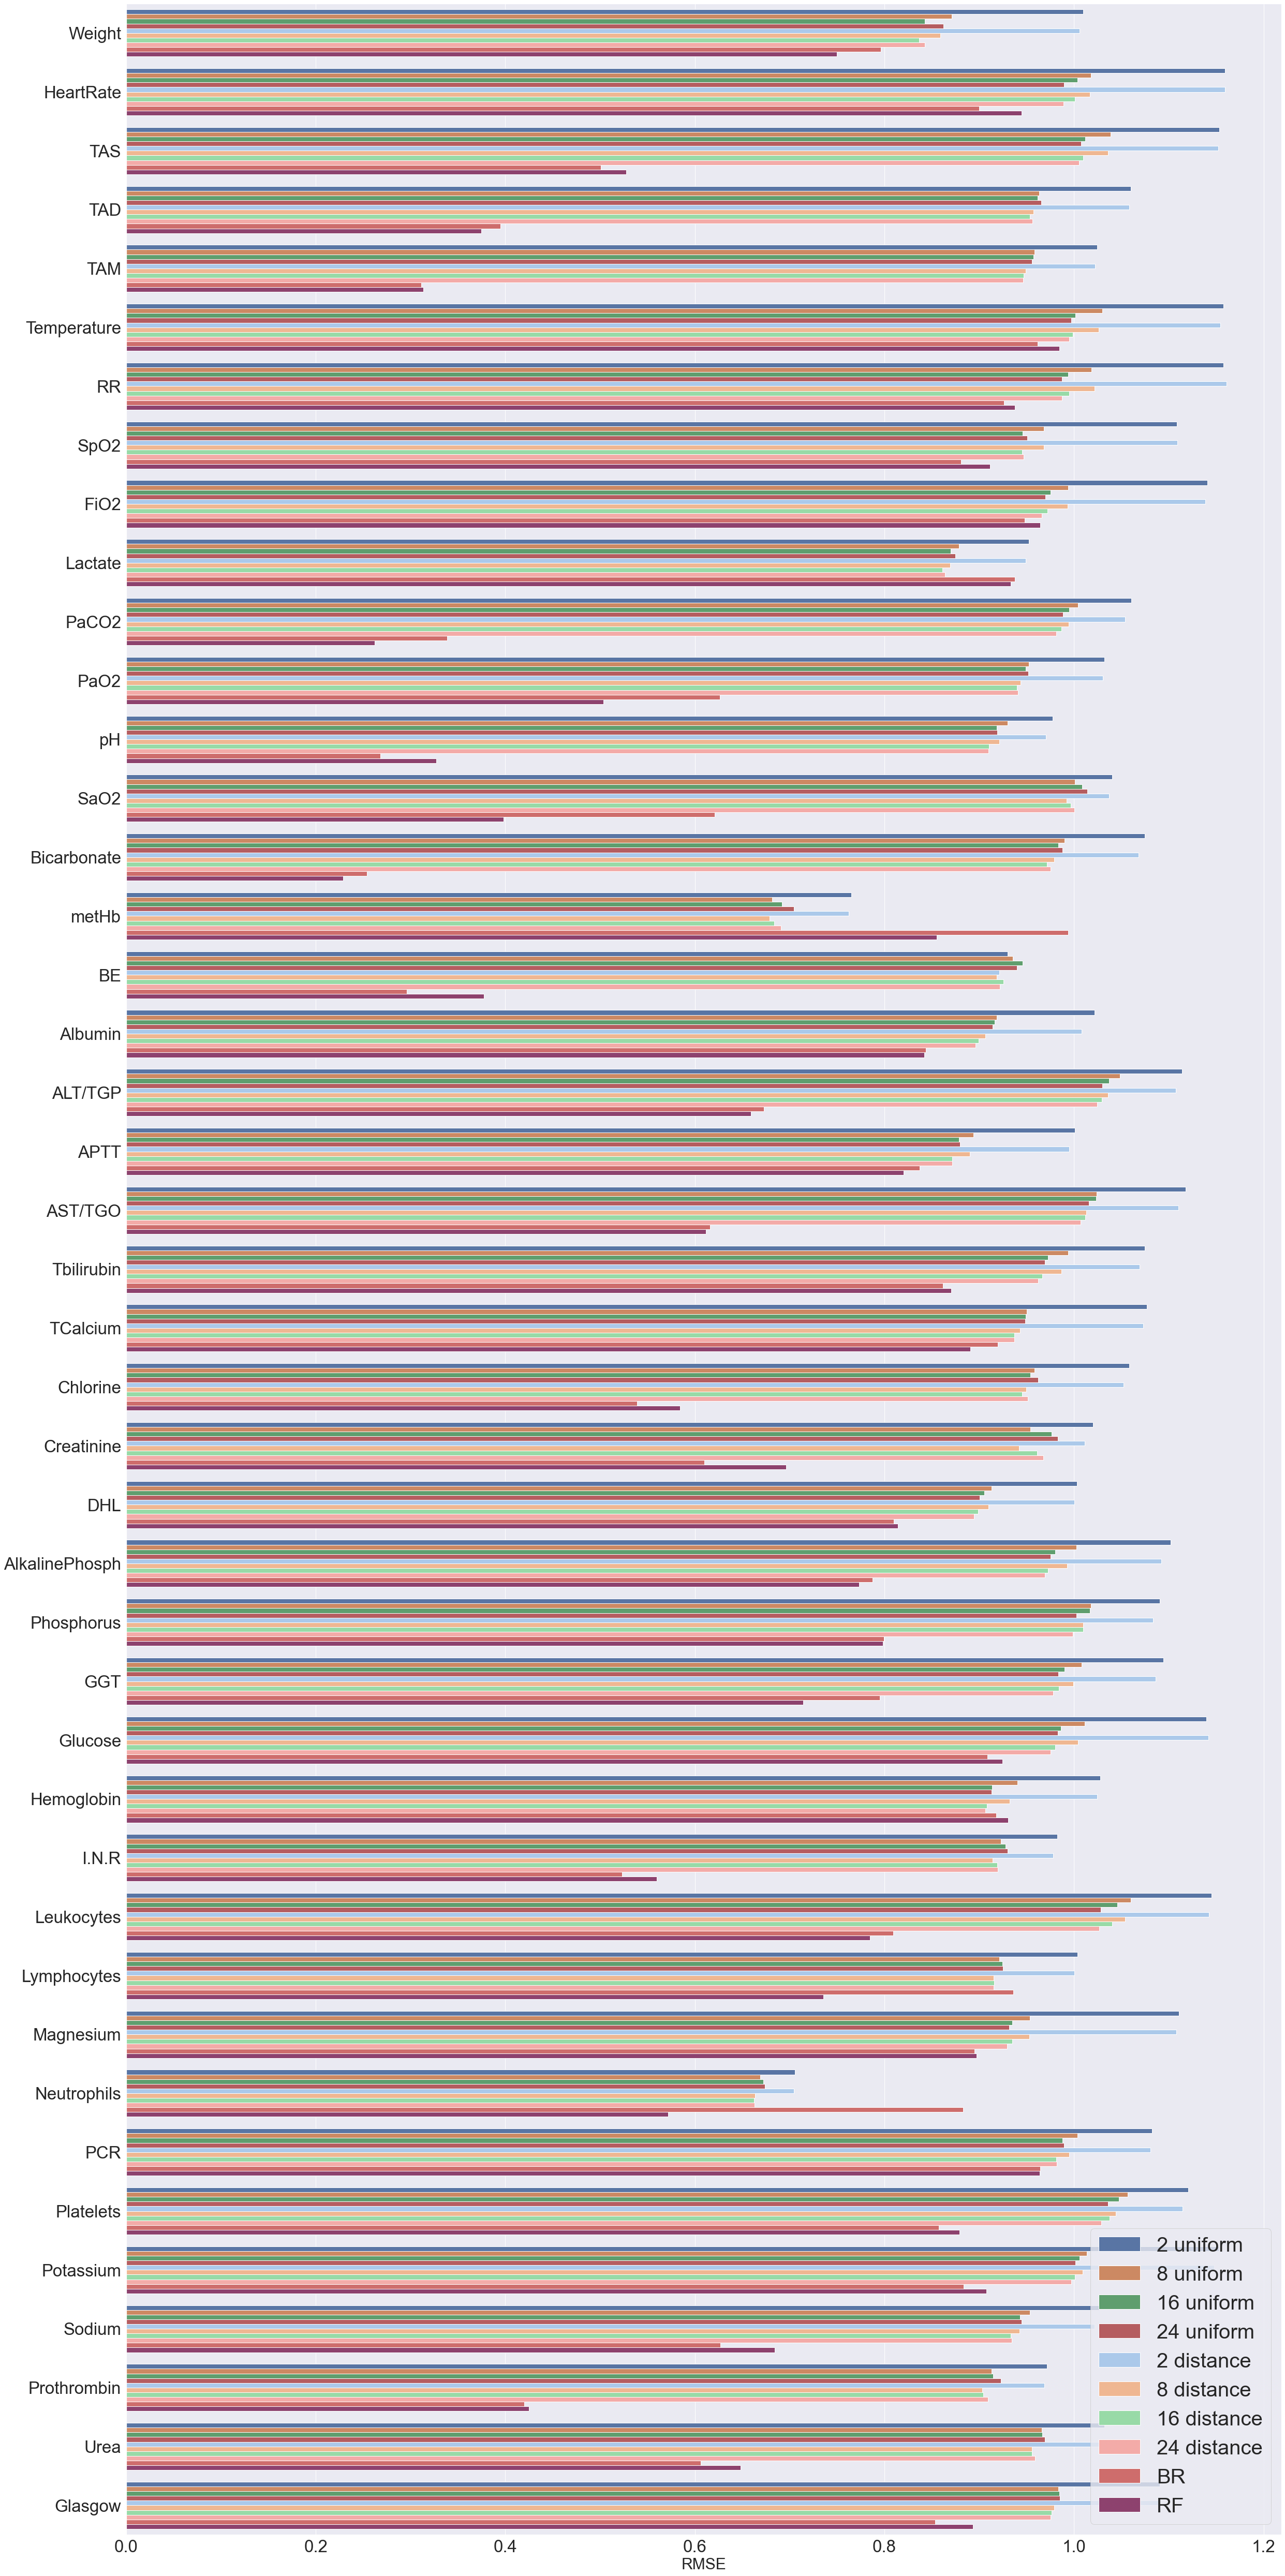

In [ ]:
sns.set(rc={"figure.figsize":(40, 90)})

ax = sns.barplot(data=CV_RMSE_R2_Df, x='RMSE', y='feature', hue="k", palette=palette)
ax.set_yticklabels(ax.get_yticklabels(), ha="right", fontsize=25)
ax.set_xlabel("RMSE",fontsize=30)
ax.set(ylabel=None)
ax.legend(fontsize=40)
plt.xticks(fontsize = 33)
plt.yticks(fontsize = 33)
#plt.savefig('RMSE Imputation')
plt.show()

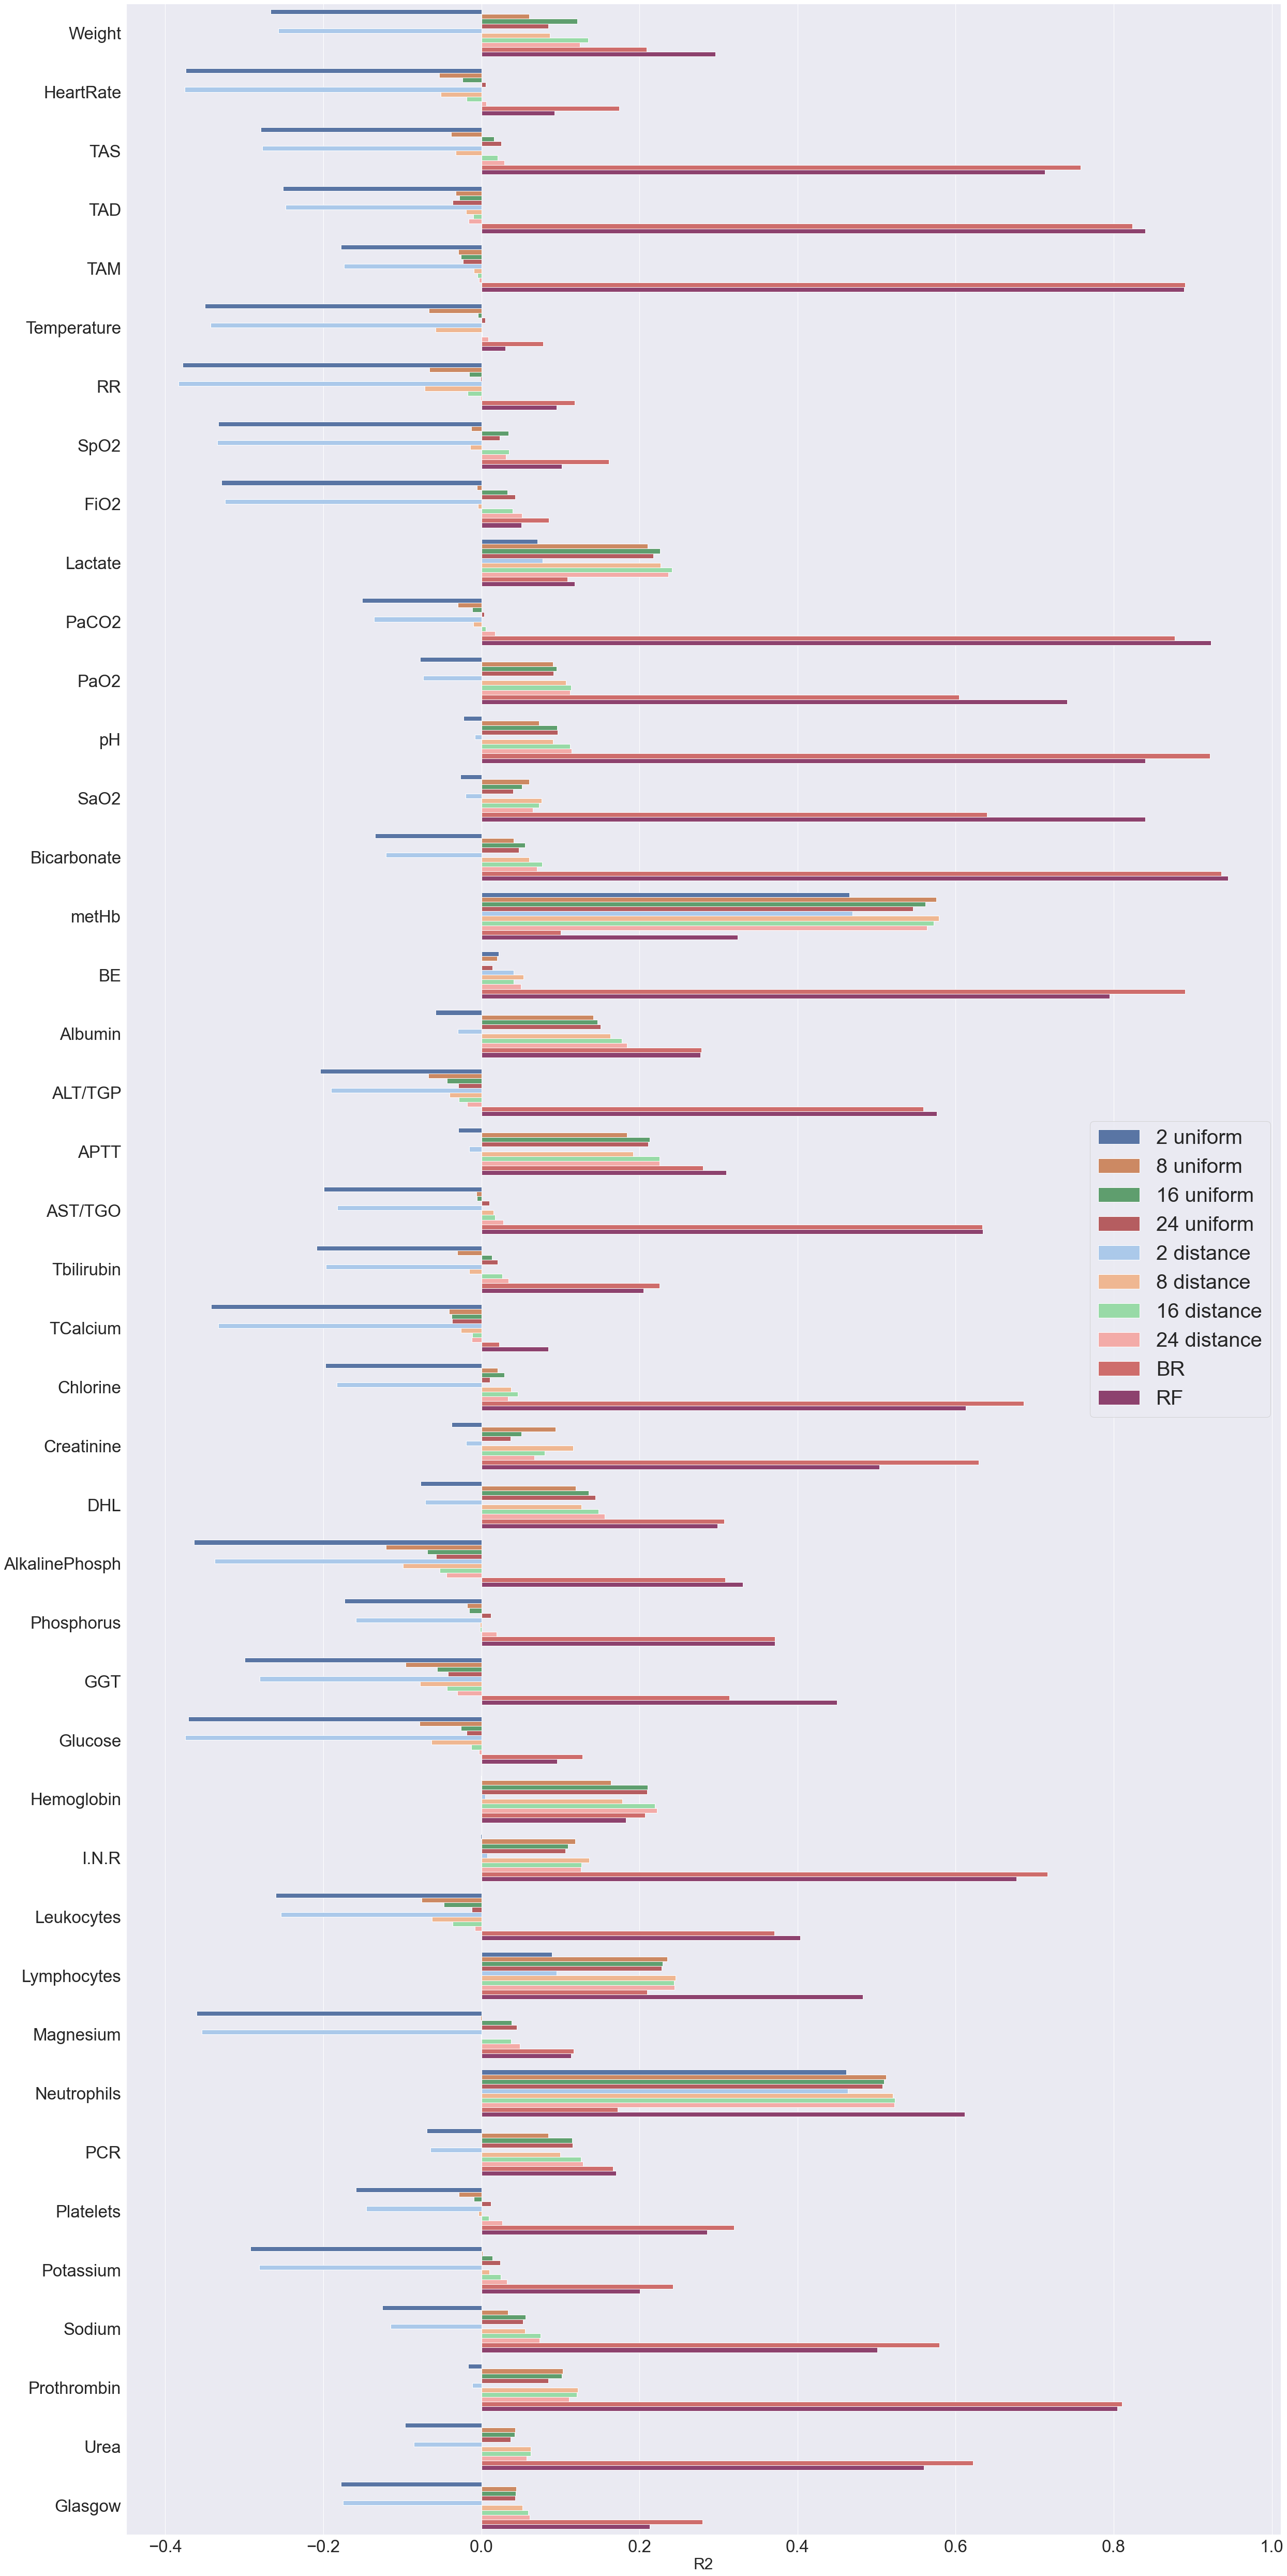

In [ ]:
sns.set(rc={"figure.figsize":(40, 90)})

ax = sns.barplot(data=CV_RMSE_R2_Df, x='R2', y='feature', hue="k", palette=palette)
ax.set_yticklabels(ax.get_yticklabels(), ha="right", fontsize=25)
ax.set_xlabel("R2",fontsize=30)
ax.set(ylabel=None)
ax.legend(fontsize=40)
plt.xticks(fontsize = 33)
plt.yticks(fontsize = 33)
#plt.savefig('R2 Imputation')
plt.show()

In [ ]:
#imputation_list =['2 uniform','8 uniform','16 uniform','24 uniform','2 distance','8 distance','16 distance','24 distance','BR','RF']

RMSE_mean_list = []
R2_mean_list = []
RMSE_std_list = []
R2_std_list = []

for n in imputation_list:

    error_df = CV_RMSE_R2_Df.loc[CV_RMSE_R2_Df['k'] == n]
    error_df.reset_index(inplace=True)

    I_mean_df = error_df.mean(axis=0)
    I_std_df = error_df.std(axis=0) 
    
    RMSE_mean = I_mean_df['RMSE']
    R2_mean = I_mean_df['R2']
    RMSE_std = I_std_df['RMSE']
    R2_std = I_std_df['R2']

    RMSE_mean_list.append(RMSE_mean)
    R2_mean_list.append(R2_mean)
    RMSE_std_list.append(RMSE_std)
    R2_std_list.append(R2_std)

    print(n, '\n', 'RMSE : ', RMSE_mean, '\n', 'R2 : ', R2_mean)
    print()

2 uniform 
 RMSE :  1.0504217603352688 
 R2 :  -0.14328650784564345

8 uniform 
 RMSE :  0.9600287863858913 
 R2 :  0.04957464826698676

16 uniform 
 RMSE :  0.951395004357563 
 R2 :  0.06803740651336938

24 uniform 
 RMSE :  0.9502527567234843 
 R2 :  0.07076515018272642

2 distance 
 RMSE :  1.0462502458816112 
 R2 :  -0.13430353545187712

8 distance 
 RMSE :  0.9527238002267127 
 R2 :  0.06394552993830548

16 distance 
 RMSE :  0.9435222306563212 
 R2 :  0.08315583697217108

24 distance 
 RMSE :  0.9417389145136602 
 R2 :  0.08703247071907995

BR 
 RMSE :  0.7239966225945583 
 R2 :  0.41707360807560856

RF 
 RMSE :  0.708676311096147 
 R2 :  0.4323275081435449



C:\Users\nunop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
C:\Users\nunop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  app.launch_new_instance()


In [ ]:
CV_RMSE_R2_Df.head()

feature           k      RMSE        R2
0  Weight   2 uniform  1.009568 -0.266523
1  Weight   8 uniform  0.871045  0.060613
2  Weight  16 uniform  0.842843  0.121491
3  Weight  24 uniform  0.862080  0.084445
4  Weight  2 distance  1.006070 -0.257296

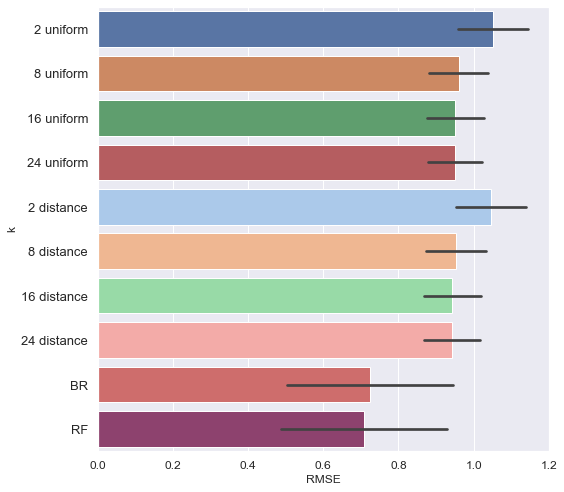

In [ ]:
sns.set(rc={"figure.figsize":(8, 7)})


sns.barplot(data = CV_RMSE_R2_Df, x = 'RMSE', y='k', palette=palette, errorbar="sd")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 13)
plt.xlabel('RMSE')
plt.tight_layout()
#plt.savefig('RMSE Imputation mean')
plt.show()

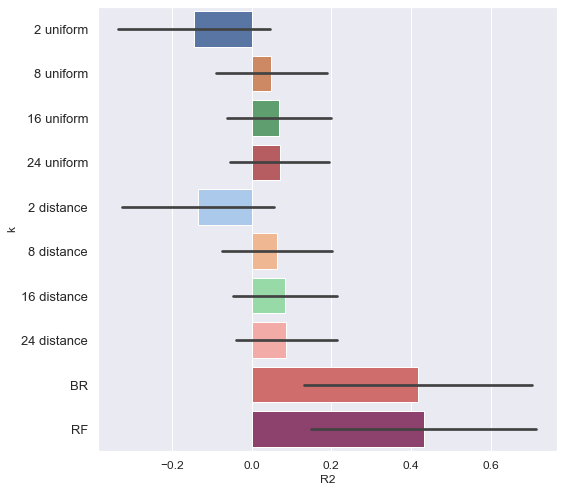

In [ ]:
sns.set(rc={"figure.figsize":(8, 7)})


sns.barplot(data = CV_RMSE_R2_Df, x = 'R2', y='k', palette=palette, errorbar="sd")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 13)
plt.xlabel('R2')
plt.tight_layout()
#plt.savefig('R2 Imputation mean')
plt.show()

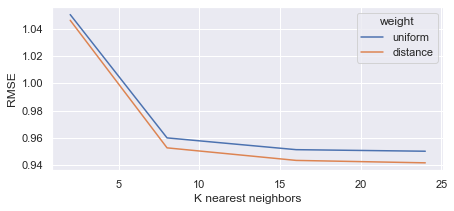

In [ ]:
#knn RMSE mean values
RMSE_mean_Df = pd.DataFrame({'K nearest neighbors':[2,8,16,24,2,8,16,24],'RMSE':RMSE_mean_list[0:8],'weight':['uniform' for n in range(0,4)]+['distance' for n in range(0,4)]})

sns.set(rc={"figure.figsize":(7, 3)})

ax = sns.lineplot(data=RMSE_mean_Df, x=RMSE_mean_Df['K nearest neighbors'], y=RMSE_mean_Df['RMSE'],hue='weight')
ax.set_xlabel("K nearest neighbors")
ax.set_ylabel("RMSE")

plt.show()

In [ ]:
#knn R2 mean values
R2_mean_Df = pd.DataFrame({'K nearest neighbors':[2,8,16,24,2,8,16,24],'R2':R2_mean_list[0:8],'weight':['uniform' for n in range(0,4)]+['distance' for n in range(0,4)]})

sns.set(rc={"figure.figsize":(7, 3)})

ax = sns.lineplot(data=R2_mean_Df, x=R2_mean_Df['K nearest neighbors'], y=R2_mean_Df['R2'],hue='weight')
ax.set_xlabel("K nearest neighbors")
ax.set_ylabel("RMSE")

plt.show()

In [ ]:
# Changing RMSE and R2 to numeric

CV_RMSE_R2_Df['RMSE'] = CV_RMSE_R2_Df['RMSE'].astype('float')
CV_RMSE_R2_Df['R2'] = CV_RMSE_R2_Df['R2'].astype('float')

In [ ]:
CV_RMSE_R2_Df.to_csv('5CV_RMSE_R2_Df.csv',index=False)

In [ ]:
# Get imputation with the best R2 for each column

Best_RMSE_R2_Df = pd.DataFrame(columns=['feature','k','RMSE','R2'])

n=0

for column in Columns_with_Nans:

    column_Df = CV_RMSE_R2_Df[CV_RMSE_R2_Df['feature'] == column]

    Best_RMSE_R2_Df.loc[n] = column_Df.loc[column_Df['R2'].idxmax()]

    n = n + 1

In [ ]:
Best_RMSE_R2_Df['RMSE'] = Best_RMSE_R2_Df['RMSE'].round(decimals = 2)
Best_RMSE_R2_Df['R2'] = Best_RMSE_R2_Df['R2'].round(decimals = 2)

In [ ]:
Best_RMSE_R2_Df.head()

feature   k  RMSE    R2
0     Weight  RF  0.75  0.30
1  HeartRate  BR  0.90  0.17
2        TAS  BR  0.50  0.76
3        TAD  RF  0.37  0.84
4        TAM  BR  0.31  0.89

### Get Final Imputation

In [ ]:
# knn
Data_uniform_KNN_2 = Data_reset_id.copy(deep=True)
Data_uniform_KNN_8 = Data_reset_id.copy(deep=True)
Data_uniform_KNN_16 = Data_reset_id.copy(deep=True)
Data_uniform_KNN_24 = Data_reset_id.copy(deep=True)

Data_distance_KNN_2 = Data_reset_id.copy(deep=True)
Data_distance_KNN_8 = Data_reset_id.copy(deep=True)
Data_distance_KNN_16 = Data_reset_id.copy(deep=True)
Data_distance_KNN_24 = Data_reset_id.copy(deep=True)

List_KNN_Imputed = [(2, Data_uniform_KNN_2, 'uniform'), (8, Data_uniform_KNN_8, 'uniform'), (16, Data_uniform_KNN_16, 'uniform'), (24, Data_uniform_KNN_24, 'uniform'), (2, Data_distance_KNN_2, 'distance'), (8, Data_distance_KNN_8, 'distance'), (16, Data_distance_KNN_16, 'distance'), (24, Data_distance_KNN_24, 'distance')]

for k, d, w in List_KNN_Imputed:
    KNN_imputer = KNNImputer(n_neighbors=k, weights=w)
    d.loc[:, :] = KNN_imputer.fit_transform(d)

# Iterative Imputer
# Here we have to use Data_reset_id because we need a reseted id
Data_BR = Data_reset_id.copy(deep=True)
Data_RF = Data_reset_id.copy(deep=True)

BR_imputer = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
Data_BR.loc[:, :] = BR_imputer.fit_transform(Data_BR)   

RF_imputer = IterativeImputer(estimator=RandomForestRegressor(), n_nearest_features=15, imputation_order='ascending')
Data_RF.loc[:, :] = RF_imputer.fit_transform(Data_RF)  

In [ ]:
# We have to choose a threshold of when we to consider a imputation to have suficient quality and
# add it into the final dataframe, here we will go with a R2 of 0.3

Final_RMSE_R2_Df = Best_RMSE_R2_Df[Best_RMSE_R2_Df['R2'] >= 0.3]

Final_RMSE_R2_Df.head(100)

feature           k  RMSE    R2
0           Weight          RF  0.75  0.30
2              TAS          BR  0.50  0.76
3              TAD          RF  0.37  0.84
4              TAM          BR  0.31  0.89
10           PaCO2          RF  0.26  0.92
11            PaO2          RF  0.50  0.74
12              pH          BR  0.27  0.92
13            SaO2          RF  0.40  0.84
14     Bicarbonate          RF  0.23  0.94
15           metHb  8 distance  0.68  0.58
16              BE          BR  0.30  0.89
18         ALT/TGP          RF  0.66  0.58
19            APTT          RF  0.82  0.31
20         AST/TGO          RF  0.61  0.63
23        Chlorine          BR  0.54  0.69
24      Creatinine          BR  0.61  0.63
25             DHL          BR  0.81  0.31
26  AlkalinePhosph          RF  0.77  0.33
27      Phosphorus          RF  0.80  0.37
28             GGT          RF  0.71  0.45
31           I.N.R          BR  0.52  0.72
32      Leukocytes          RF  0.78  0.40
33     Lymphocytes          RF  0.74  0.48
35     Neutrophils          RF  0.57  0.61
37       Platelets          BR  0.86  0.32
39          Sodium          BR  0.63  0.58
40     Prothrombin          BR  0.42  0.81
41            Urea          BR  0.61  0.62

In [ ]:
#Creating final imputed Data, that is a combination of the best imputation on each column

Data_Imputed = Data_reset_id.copy(deep=True)

Columns_to_Imput = list(Final_RMSE_R2_Df['feature'])

for column in Columns_to_Imput:

    # get best atributes
    transformation = Best_RMSE_R2_Df[Best_RMSE_R2_Df['feature'] == column]
    transformation = transformation.reset_index()
    transformation = transformation._get_value(0, 'k')

    # first for iterative imputer

    if transformation == 'BR':
        Data_Imputed[column] = Data_BR[column]

    elif transformation == 'RF':
        Data_Imputed[column] = Data_RF[column]

    else:
        # Now for knn
        k_number, weight = transformation.split()

        # change final column to the best imputed one
        if weight == 'uniform':

            if k_number == '2':
                Data_Imputed[column] = Data_uniform_KNN_2[column]
            elif k_number == '8':
                Data_Imputed[column] = Data_uniform_KNN_8[column]
            elif k_number == '16':
                Data_Imputed[column] = Data_uniform_KNN_16[column]
            elif k_number == '24':
                Data_Imputed[column] = Data_uniform_KNN_24[column]

        elif weight == 'distance':
        
            if k_number == '2':
                Data_Imputed[column] = Data_distance_KNN_2[column]
            elif k_number == '8':
                Data_Imputed[column] = Data_distance_KNN_8[column]
            elif k_number == '16':
                Data_Imputed[column] = Data_distance_KNN_16[column]
            elif k_number == '24':
                Data_Imputed[column] = Data_distance_KNN_24[column]
    

In [ ]:
Data_Imputed.isna().sum()

Age                       0
Gender                    0
Weight                    0
HeartRate               551
TAS                       0
TAD                       0
TAM                       0
Temperature             846
RR                      846
SpO2                    560
FiO2                   4081
Lactate                2531
PaCO2                     0
PaO2                      0
pH                        0
SaO2                      0
Bicarbonate               0
metHb                     0
BE                        0
Albumin                4983
ALT/TGP                   0
APTT                      0
AST/TGO                   0
Tbilirubin             2343
TCalcium               3992
Chlorine                  0
Creatinine                0
DHL                       0
AlkalinePhosph            0
Phosphorus                0
GGT                       0
Glucose                4186
Hemoglobin              140
I.N.R                     0
Leukocytes                0
Lymphocytes         

In [ ]:
Data_Imputed.head()

Age    Gender    Weight  HeartRate       TAS       TAD       TAM  \
0  0.006481 -0.686438  0.069274  -0.486473  1.098887  0.590664  0.874776   
1 -0.327977 -0.686438  0.540062   0.332892 -0.928519 -0.472900 -0.777365   
2  0.668620 -0.686438 -1.248933  -0.267493  0.643755  1.039277  0.935966   
3  0.302783 -0.686438 -0.166120   0.425770 -0.349260 -1.198556 -0.899746   
4 -0.474987 -0.686438  0.304668  -2.593655  1.678145 -0.321630  0.568824   

   Temperature        RR      SpO2      FiO2   Lactate     PaCO2      PaO2  \
0     1.055836 -0.046043  0.349353 -1.672807 -0.867199 -0.365546 -0.412212   
1    -0.598998  0.746717  0.349353  1.903559  1.161667 -0.252980 -1.125666   
2     0.346621 -0.907104  1.299887  0.360751  1.101081  0.168645  0.421947   
3     0.819431 -0.747231  0.594002       NaN  0.321678 -1.141759 -1.022191   
4    -0.717200 -1.642146 -1.654269 -0.656546  0.321678 -0.143423  0.360369   

         pH      SaO2  Bicarbonate     metHb        BE   Albumin   ALT/TGP  \
0  1.324670 -0.637208     0.908581  1.365303  0.974056  0.786719 -2.470991   
1 -1.175212 -0.072847    -1.233444 -1.242004 -1.426185 -1.057664  1.869032   
2  0.949687 -1.037806     1.324508  0.930408  1.237892 -0.319911 -1.204338   
3 -0.225257  0.947843    -1.379019  0.708272 -1.069923  0.602280 -0.821033   
4  0.074729 -0.665669    -0.110441  0.783839  0.024750  1.340034 -0.401095   

       APTT   AST/TGO  Tbilirubin  TCalcium  Chlorine  Creatinine       DHL  \
0 -0.937705 -1.838641   -0.501150  1.093903  0.573662    0.266441 -0.935316   
1  0.514787  2.269696    1.626337 -0.839937 -0.899979    1.459010  2.069866   
2 -0.430825 -1.680185   -0.813569  0.126983 -0.752615   -1.964143 -0.543619   
3  1.322729 -0.046152    1.778141  1.370166  0.426298    0.529647  0.131440   
4  0.122235 -0.697543   -0.329929  0.265114  0.721026    0.282585 -0.902743   

   AlkalinePhosph  Phosphorus       GGT   Glucose  Hemoglobin     I.N.R  \
0        0.113930   -1.153605  0.333634 -0.067142   -0.024084  0.385854   
1        1.282337    1.000166  1.760151       NaN    0.998693 -0.624169   
2       -0.482341   -0.371121 -0.866725  1.178837   -0.379833 -0.624169   
3       -0.267153    1.117327 -0.580672 -2.149379   -0.868988  1.260483   
4       -0.771754   -1.712521 -0.968385  0.566266    0.598476 -0.059811   

   Leukocytes  Lymphocytes  Magnesium  Neutrophils       PCR  Platelets  \
0   -0.841407     0.364156  -0.053073    -0.074460 -1.236705  -0.109234   
1   -2.017358    -0.929793   0.183582     0.538497 -0.399801  -1.218457   
2   -0.642056    -0.825598  -0.567836     0.378883  0.263411  -0.390492   
3    1.460987    -0.321765  -0.567836     0.343386 -1.417054  -1.294338   
4    0.192314    -0.269439   0.183582     0.245720  0.588849  -0.361622   

   Potassium    Sodium  Prothrombin      Urea   Glasgow  AddicIntoxic  \
0  -1.305071  1.302366     0.106516  0.555541  1.453192     -0.138177   
1   1.481452 -1.159070    -0.488724  1.242041  1.453192     -0.138177   
2  -1.407016  0.071648    -0.779226 -1.427375  1.453192     -0.138177   
3  -0.370566  0.599099     1.130839  1.393739 -0.946983     -0.138177   
4  -0.098710  0.599099    -0.118239  0.083369  1.275528     -0.138177   

   VascularP   TVP/TEP  Pneumothorax  AAbdomen  CerebrovasculaP      Coma  \
0   6.405727 -0.155443     -0.165517 -0.180412        -0.182742 -0.176867   
1  -0.156110 -0.155443     -0.165517 -0.180412        -0.182742 -0.176867   
2  -0.156110 -0.155443     -0.165517 -0.180412        -0.182742 -0.176867   
3  -0.156110 -0.155443     -0.165517 -0.180412        -0.182742 -0.176867   
4  -0.156110 -0.155443     -0.165517 -0.180412        -0.182742 -0.176867   

   AcidBaseC  Encephalopathy   Anemia  MultiorganD  PolyneuroMyopathy  \
0  -0.164566       -0.185047 -0.18361    -0.176867          -0.204514   
1  -0.164566       -0.185047 -0.18361     5.653965          -0.204514   
2  -0.164566       -0.185047 -0.18361    -0.176867          -0.204514   
3  -0.164566       -0.185047 -0.18361    -

# Feature Selection via Correlation

### Correlation Matrix

In [ ]:
# Correlation matrix using Pearson Correlation Coefficient Pearson Correlation Coefficient (p)

corr_matrix = Data_Imputed.corr()

corr_matrix.head()

Age    Gender    Weight  HeartRate       TAS       TAD  \
Age        1.000000 -0.013024 -0.145217   0.091672 -0.124981  0.188109   
Gender    -0.013024  1.000000 -0.137002   0.035523 -0.014101 -0.002416   
Weight    -0.145217 -0.137002  1.000000  -0.209535  0.142680  0.057105   
HeartRate  0.091672  0.035523 -0.209535   1.000000 -0.110897  0.097974   
TAS       -0.124981 -0.014101  0.142680  -0.110897  1.000000  0.517282   

                TAM  Temperature        RR      SpO2      FiO2   Lactate  \
Age        0.042949     0.128633  0.019768 -0.097633  0.006348 -0.046766   
Gender     0.014084    -0.009974  0.038590 -0.010808 -0.050095  0.047794   
Weight     0.085603     0.038842 -0.138642  0.029442  0.181865 -0.021384   
HeartRate -0.002393     0.194139  0.205183  0.157473  0.027954  0.090659   
TAS        0.784045     0.026613  0.012719 -0.054750 -0.078834 -0.088972   

              PaCO2      PaO2        pH      SaO2  Bicarbonate     metHb  \
Age       -0.028471  0.019121 -0.015343  0.027432    -0.054748  0.021702   
Gender    -0.025954  0.011980  0.028835 -0.012304    -0.006228 -0.006551   
Weight     0.046548  0.069548 -0.071815 -0.125114     0.003780  0.022617   
HeartRate  0.055375 -0.126752 -0.097057  0.130372    -0.026255  0.011167   
TAS       -0.058716  0.057251  0.113686 -0.091042     0.054298 -0.024203   

                 BE   Albumin   ALT/TGP      APTT   AST/TGO  Tbilirubin  \
Age       -0.031934  0.072999  0.073969 -0.018880  0.079195    0.036016   
Gender     0.005896  0.025430 -0.048447 -0.064575 -0.049048   -0.143542   
Weight    -0.026779  0.202612  0.050789 -0.109517  0.012253    0.021811   
HeartRate -0.039629 -0.095360  0.057166  0.071436  0.106039    0.073380   
TAS        0.054520  0.114708 -0.073265 -0.160280 -0.125563   -0.099026   

           TCalcium  Chlorine  Creatinine       DHL  AlkalinePhosph  \
Age        0.021932  0.059520   -0.356000  0.165440       -0.034500   
Gender     0.017971 -0.016433   -0.160107  0.084553        0.054031   
Weight     0.033801 -0.032438    0.298818 -0.012799       -0.081787   
HeartRate -0.014149 -0.037686   -0.011300  0.139475        0.083805   
TAS        0.079875 -0.001453    0.034097 -0.117504        0.006840   

           Phosphorus       GGT   Glucose  Hemoglobin     I.N.R  Leukocytes  \
Age         -0.089091  0.052151 -0.177687    0.081652 -0.036408   -0.070934   
Gender      -0.049518 -0.063418 -0.024850   -0.151391 -0.078951   -0.006318   
Weight       0.049529  0.056581  0.160451    0.129571 -0.016037    0.006624   
HeartRate    0.052250  0.038328 -0.085598   -0.033862  0.089853    0.038884   
TAS         -0.026292  0.030227  0.089421   -0.000038 -0.098707    0.005480   

           Lymphocytes  Magnesium  Neutrophils       PCR  Platelets  \
Age           0.194294  -0.057644    -0.065528 -0.028190   0.025579   
Gender        0.045191  -0.045457    -0.007475 -0.036415   0.045268   
Weight       -0.097053   0.077816     0.054025  0.054915  -0.039982   
HeartRate    -0.027105  -0.073490    -0.051426  0.106274  -0.038546   
TAS          -0.025565   0.000934     0.026157 -0.067818   0.062113   

           Potassium    Sodium  Prothrombin      Urea   Glasgow  AddicIntoxic  \
Age        -0.005760 -0.071052    -0.032495 -0.439150 -0.013853      0.062075   
Gender     -0.065131 -0.001904    -0.084815 -0.122513 -0.043263      0.038337   
Weight      0.036960  0.028744    -0.014235  0.189929  0.036218      0.005540   
HeartRate   0.040427 -0.020794     0.090163  0.011521 -0.039396     -0.002132   
TAS        -0.063892  0.034486    -0.100272  0.045856 -0.017190      0.002891   

           VascularP   TVP/TEP  Pneumothorax  AAbdomen  CerebrovasculaP  \
Age        -0.030893 -0.000452      0.065136 -0.039900        -0.011298   
Gender     -0.040244  0.017880      0.010345 -0.005897        -0.011307   
Weight      0.001634  0.017069     -0.040106 -0.004720         0.036957   
HeartRate   0.008354  0.021266      0.031593  0.044378        -0.029645   
TAS         0.0

In [ ]:
plt.figure(figsize=(100,100))
plt.title('Correlation Heatmap')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=70)
a.set_yticklabels(a.get_yticklabels(), rotation=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
#plt.savefig('Correlation Heatmap')              
plt.show() 

### Dendrogram analysis
distance matrix will be calculated as follows:

d(X,Y) = 1 − ∣ ρ(X,Y) ∣

In [ ]:
dissimilarity = 1 - abs(corr_matrix)

# In linkage, initially, each feature is a cluster. Then the algorithm takes close features and combines them into new clusters.
# Iteratively, the algorithm keeps grouping clusters until there is only one.

Z = linkage(squareform(dissimilarity), 'complete')

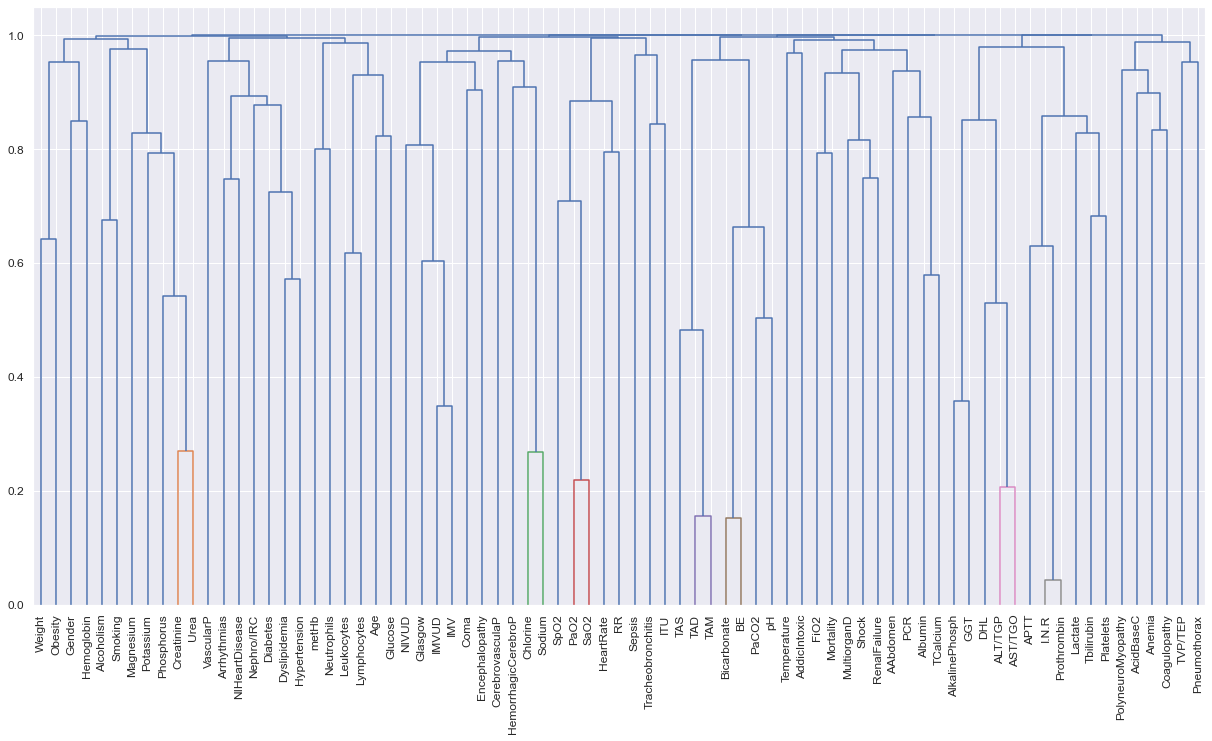

In [ ]:
plt.figure(figsize=(21,11))

dendrogram(Z, labels=Data_Imputed.columns, orientation='top', leaf_font_size=8., color_threshold=0.3)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
#plt.savefig('Correlation Dendrogram', bbox_inches='tight')

In [ ]:
# This threshold acording to: 
# Dormann, C. F., J. Elith, S. Bacher, et al. 2013. Collinearity: a review of methods to deal with it and a simulation study evaluating their performance. Ecography 36:27–46.

# Clusterize the data
threshold = 0.3
labels = fcluster(Z, threshold, criterion='distance')


# get clusters
Clusters_list = list(zip(labels, Data_Imputed.columns))

Clusters_dict = dict()

for number, column in Clusters_list:
    # I can't eliminate the class features even if they have a very high correlation
    if column != 'IMV' and column != 'Mortality':

        if number not in Clusters_dict: 
            Clusters_dict[number] = [column] 
        else: 
            Clusters_dict[number].append(column)

# Get just related features
Clusters_final_list = []

for number, columns in Clusters_dict.items():
    if len(columns) >= 2:
        Clusters_final_list.append(columns)

print(Clusters_final_list)

[['TAD', 'TAM'], ['PaO2', 'SaO2'], ['Bicarbonate', 'BE'], ['ALT/TGP', 'AST/TGO'], ['Chlorine', 'Sodium'], ['Creatinine', 'Urea'], ['I.N.R', 'Prothrombin']]


In [ ]:
# Comparing correlation from the prediction objectives with the highly correlated variebles

# Here, we separated the search considering mortality and invasive mechanical ventilatio (IMV) as the different prediction classes
# Athough, in the end, we just used the mortality data, IMV data is ready for future research

Clusters_corr_F = []
Clusters_corr_IMV = []

for columns in Clusters_final_list:

    columns_list_F = []
    columns_list_IMV = []

    for c in columns:

        corr_F = corr_matrix['Mortality'][c]
        columns_list_F.append((c,corr_F))
        corr_IMV = corr_matrix['IMV'][c]
        columns_list_IMV.append((c,corr_IMV))

    Clusters_corr_F.append(columns_list_F)
    Clusters_corr_IMV.append(columns_list_IMV)

In [ ]:
print('Mortality :', Clusters_corr_F)
print()
print('Invasive Mechanical Ventilation :', Clusters_corr_IMV)

Mortality : [[('TAD', -0.11493229225592418), ('TAM', -0.1115460267529891)], [('PaO2', 0.001861392723480891), ('SaO2', 0.04974025384137265)], [('Bicarbonate', -0.0993008552453724), ('BE', -0.14451070448018014)], [('ALT/TGP', 0.05608771583312522), ('AST/TGO', 0.13006158251957023)], [('Chlorine', 0.061794089343019845), ('Sodium', 0.0879790635307176)], [('Creatinine', 0.16521173855061658), ('Urea', 0.1798472131254147)], [('I.N.R', 0.14299053773939982), ('Prothrombin', 0.14137464095845467)]]

Invasive Mechanical Ventilation : [[('TAD', -0.10434134471292081), ('TAM', -0.09273082239891849)], [('PaO2', 0.19496440690579311), ('SaO2', -0.14562221564521255)], [('Bicarbonate', -0.12494494897566467), ('BE', -0.1214844425040052)], [('ALT/TGP', 0.06394487752646937), ('AST/TGO', 0.10016142453720318)], [('Chlorine', 0.17435402343488957), ('Sodium', 0.1459592620831427)], [('Creatinine', 0.01315101246257528), ('Urea', -0.025723608487658627)], [('I.N.R', 0.03874495943624667), ('Prothrombin', 0.04118316726

In [ ]:
# Get columns to eliminate
# It will be based on the columns that have less correlation with the prediction class

# for Mortality
Columns_to_drop_F=[]

for columns in Clusters_corr_F:

    corr = 1
    feature = ''

    for c in columns:

        if corr > abs(c[1]):
            corr = abs(c[1])
            feature = c[0]

    Columns_to_drop_F.append(feature)

# for Invasive Mechanical Ventilation
Columns_to_drop_IMV=[]

for columns in Clusters_corr_IMV:

    corr = 1
    feature = ''

    for c in columns:

        if corr > abs(c[1]):
            corr = abs(c[1])
            feature = c[0]

    Columns_to_drop_IMV.append(feature)

print('Mortality :', Columns_to_drop_F)
print()
print('Invasive Mechanical Ventilation :', Columns_to_drop_IMV)


Mortality : ['TAM', 'PaO2', 'Bicarbonate', 'ALT/TGP', 'Chlorine', 'Creatinine', 'Prothrombin']

Invasive Mechanical Ventilation : ['TAM', 'SaO2', 'BE', 'ALT/TGP', 'Sodium', 'Creatinine', 'I.N.R']


In [ ]:
# Eliminate columns and create separate Dfs for both predictions

#To predict mechanical invasive ventilation
V_Data = Data_Imputed.drop(Columns_to_drop_IMV, axis=1)

#To predict mortality
M_Data = Data_Imputed.drop(Columns_to_drop_F, axis=1)

In [ ]:
V_Data.head()

Age    Gender    Weight  HeartRate       TAS       TAD  Temperature  \
0  0.006481 -0.686438  0.069274  -0.486473  1.098887  0.590664     1.055836   
1 -0.327977 -0.686438  0.540062   0.332892 -0.928519 -0.472900    -0.598998   
2  0.668620 -0.686438 -1.248933  -0.267493  0.643755  1.039277     0.346621   
3  0.302783 -0.686438 -0.166120   0.425770 -0.349260 -1.198556     0.819431   
4 -0.474987 -0.686438  0.304668  -2.593655  1.678145 -0.321630    -0.717200   

         RR      SpO2      FiO2   Lactate     PaCO2      PaO2        pH  \
0 -0.046043  0.349353 -1.672807 -0.867199 -0.365546 -0.412212  1.324670   
1  0.746717  0.349353  1.903559  1.161667 -0.252980 -1.125666 -1.175212   
2 -0.907104  1.299887  0.360751  1.101081  0.168645  0.421947  0.949687   
3 -0.747231  0.594002       NaN  0.321678 -1.141759 -1.022191 -0.225257   
4 -1.642146 -1.654269 -0.656546  0.321678 -0.143423  0.360369  0.074729   

   Bicarbonate     metHb   Albumin      APTT   AST/TGO  Tbilirubin  TCalcium  \
0     0.908581  1.365303  0.786719 -0.937705 -1.838641   -0.501150  1.093903   
1    -1.233444 -1.242004 -1.057664  0.514787  2.269696    1.626337 -0.839937   
2     1.324508  0.930408 -0.319911 -0.430825 -1.680185   -0.813569  0.126983   
3    -1.379019  0.708272  0.602280  1.322729 -0.046152    1.778141  1.370166   
4    -0.110441  0.783839  1.340034  0.122235 -0.697543   -0.329929  0.265114   

   Chlorine       DHL  AlkalinePhosph  Phosphorus       GGT   Glucose  \
0  0.573662 -0.935316        0.113930   -1.153605  0.333634 -0.067142   
1 -0.899979  2.069866        1.282337    1.000166  1.760151       NaN   
2 -0.752615 -0.543619       -0.482341   -0.371121 -0.866725  1.178837   
3  0.426298  0.131440       -0.267153    1.117327 -0.580672 -2.149379   
4  0.721026 -0.902743       -0.771754   -1.712521 -0.968385  0.566266   

   Hemoglobin  Leukocytes  Lymphocytes  Magnesium  Neutrophils       PCR  \
0   -0.024084   -0.841407     0.364156  -0.053073    -0.074460 -1.236705   
1    0.998693   -2.017358    -0.929793   0.183582     0.538497 -0.399801   
2   -0.379833   -0.642056    -0.825598  -0.567836     0.378883  0.263411   
3   -0.868988    1.460987    -0.321765  -0.567836     0.343386 -1.417054   
4    0.598476    0.192314    -0.269439   0.183582     0.245720  0.588849   

   Platelets  Potassium  Prothrombin      Urea   Glasgow  AddicIntoxic  \
0  -0.109234  -1.305071     0.106516  0.555541  1.453192     -0.138177   
1  -1.218457   1.481452    -0.488724  1.242041  1.453192     -0.138177   
2  -0.390492  -1.407016    -0.779226 -1.427375  1.453192     -0.138177   
3  -1.294338  -0.370566     1.130839  1.393739 -0.946983     -0.138177   
4  -0.361622  -0.098710    -0.118239  0.083369  1.275528     -0.138177   

   VascularP   TVP/TEP  Pneumothorax  AAbdomen  CerebrovasculaP      Coma  \
0   6.405727 -0.155443     -0.165517 -0.180412        -0.182742 -0.176867   
1  -0.156110 -0.155443     -0.165517 -0.180412        -0.182742 -0.176867   
2  -0.156110 -0.155443     -0.165517 -0.180412        -0.182742 -0.176867   
3  -0.156110 -0.155443     -0.165517 -0.180412        -0.182742 -0.176867   
4  -0.156110 -0.155443     -0.165517 -0.180412        -0.182742 -0.176867   

   AcidBaseC  Encephalopathy   Anemia  MultiorganD  PolyneuroMyopathy  \
0  -0.164566       -0.185047 -0.18361    -0.176867          -0.204514   
1  -0.164566       -0.185047 -0.18361     5.653965          -0.204514   
2  -0.164566       -0.185047 -0.18361    -0.176867          -0.204514   
3  -0.164566       -0.185047 -0.18361    -0.176867          -0.204514   
4  -0.164566       -0.185047 -0.18361    -0.176867          -0.204514   

   Tracheobronchitis   Obesity       ITU  HemorrhagicCerebroP  Coagulopathy  \
0           -0.21482 -0.212027  4.459387             4.538911     -0.224733   
1           -0.21482 -0.212027 -0.224246            -0.220317     -0.224733   
2           -0.21482 -0.212027 -0.224246            -0.220317     -0.224733   
3           -0.21482 -0.212027 -0.224246  

In [ ]:
M_Data.head()

Age    Gender    Weight  HeartRate       TAS       TAD  Temperature  \
0  0.006481 -0.686438  0.069274  -0.486473  1.098887  0.590664     1.055836   
1 -0.327977 -0.686438  0.540062   0.332892 -0.928519 -0.472900    -0.598998   
2  0.668620 -0.686438 -1.248933  -0.267493  0.643755  1.039277     0.346621   
3  0.302783 -0.686438 -0.166120   0.425770 -0.349260 -1.198556     0.819431   
4 -0.474987 -0.686438  0.304668  -2.593655  1.678145 -0.321630    -0.717200   

         RR      SpO2      FiO2   Lactate     PaCO2        pH      SaO2  \
0 -0.046043  0.349353 -1.672807 -0.867199 -0.365546  1.324670 -0.637208   
1  0.746717  0.349353  1.903559  1.161667 -0.252980 -1.175212 -0.072847   
2 -0.907104  1.299887  0.360751  1.101081  0.168645  0.949687 -1.037806   
3 -0.747231  0.594002       NaN  0.321678 -1.141759 -0.225257  0.947843   
4 -1.642146 -1.654269 -0.656546  0.321678 -0.143423  0.074729 -0.665669   

      metHb        BE   Albumin      APTT   AST/TGO  Tbilirubin  TCalcium  \
0  1.365303  0.974056  0.786719 -0.937705 -1.838641   -0.501150  1.093903   
1 -1.242004 -1.426185 -1.057664  0.514787  2.269696    1.626337 -0.839937   
2  0.930408  1.237892 -0.319911 -0.430825 -1.680185   -0.813569  0.126983   
3  0.708272 -1.069923  0.602280  1.322729 -0.046152    1.778141  1.370166   
4  0.783839  0.024750  1.340034  0.122235 -0.697543   -0.329929  0.265114   

        DHL  AlkalinePhosph  Phosphorus       GGT   Glucose  Hemoglobin  \
0 -0.935316        0.113930   -1.153605  0.333634 -0.067142   -0.024084   
1  2.069866        1.282337    1.000166  1.760151       NaN    0.998693   
2 -0.543619       -0.482341   -0.371121 -0.866725  1.178837   -0.379833   
3  0.131440       -0.267153    1.117327 -0.580672 -2.149379   -0.868988   
4 -0.902743       -0.771754   -1.712521 -0.968385  0.566266    0.598476   

      I.N.R  Leukocytes  Lymphocytes  Magnesium  Neutrophils       PCR  \
0  0.385854   -0.841407     0.364156  -0.053073    -0.074460 -1.236705   
1 -0.624169   -2.017358    -0.929793   0.183582     0.538497 -0.399801   
2 -0.624169   -0.642056    -0.825598  -0.567836     0.378883  0.263411   
3  1.260483    1.460987    -0.321765  -0.567836     0.343386 -1.417054   
4 -0.059811    0.192314    -0.269439   0.183582     0.245720  0.588849   

   Platelets  Potassium    Sodium      Urea   Glasgow  AddicIntoxic  \
0  -0.109234  -1.305071  1.302366  0.555541  1.453192     -0.138177   
1  -1.218457   1.481452 -1.159070  1.242041  1.453192     -0.138177   
2  -0.390492  -1.407016  0.071648 -1.427375  1.453192     -0.138177   
3  -1.294338  -0.370566  0.599099  1.393739 -0.946983     -0.138177   
4  -0.361622  -0.098710  0.599099  0.083369  1.275528     -0.138177   

   VascularP   TVP/TEP  Pneumothorax  AAbdomen  CerebrovasculaP      Coma  \
0   6.405727 -0.155443     -0.165517 -0.180412        -0.182742 -0.176867   
1  -0.156110 -0.155443     -0.165517 -0.180412        -0.182742 -0.176867   
2  -0.156110 -0.155443     -0.165517 -0.180412        -0.182742 -0.176867   
3  -0.156110 -0.155443     -0.165517 -0.180412        -0.182742 -0.176867   
4  -0.156110 -0.155443     -0.165517 -0.180412        -0.182742 -0.176867   

   AcidBaseC  Encephalopathy   Anemia  MultiorganD  PolyneuroMyopathy  \
0  -0.164566       -0.185047 -0.18361    -0.176867          -0.204514   
1  -0.164566       -0.185047 -0.18361     5.653965          -0.204514   
2  -0.164566       -0.185047 -0.18361    -0.176867          -0.204514   
3  -0.164566       -0.185047 -0.18361    -0.176867          -0.204514   
4  -0.164566       -0.185047 -0.18361    -0.176867          -0.204514   

   Tracheobronchitis   Obesity       ITU  HemorrhagicCerebroP  Coagulopathy  \
0           -0.21482 -0.212027  4.459387             4.538911     -0.224733   
1           -0.21482 -0.212027 -0.224246            -0.220317     -0.224733   
2           -0.21482 -0.212027 -0.224246            -0.220317     -0.224733   
3           -0.21482 -0.212027 -0.224246            -0.220317     -0.224733   

In [ ]:
len(V_Data.columns)

70

In [ ]:
len(V_Data)

10088

In [ ]:
len(M_Data.columns)

70

In [ ]:
len(M_Data)

10088

# Eliminating All Nan Data

In [ ]:
# Definig minimum fraction of Nans when columns are eliminated
# The rest of the rows that still have Nans will be eliminated

min_fraction = 0.3

In [ ]:
# For V_Data

Nan_count_V = V_Data.isna().sum()

L_V = len(V_Data)

ToDrop_V = Nan_count_V[ Nan_count_V/L_V > min_fraction ].index
print(ToDrop_V)

Index(['FiO2', 'Albumin', 'TCalcium', 'Glucose'], dtype='object')


In [ ]:
# For M_Data

Nan_count_M = M_Data.isna().sum()

L_M = len(M_Data)

ToDrop_M = Nan_count_M[ Nan_count_M/L_M > min_fraction ].index
print(ToDrop_M)

Index(['FiO2', 'Albumin', 'TCalcium', 'Glucose'], dtype='object')


In [ ]:
# Drop the Nan Data

V_Data_Cleaned = V_Data.drop(ToDrop_V, axis=1)
M_Data_Cleaned = M_Data.drop(ToDrop_M, axis=1)

V_Data_Cleaned = V_Data_Cleaned.dropna()
M_Data_Cleaned = M_Data_Cleaned.dropna()


In [ ]:
len(V_Data_Cleaned)

2729

In [ ]:
len(M_Data_Cleaned)

2729

# Saving Data

Now we have two dataframes for each prediction, one with still some Nan Data and another without

In [ ]:
#To predict mechanical invasive ventilation
#Delete row if VentilacaoInvasivaAteData is 1
V_Data.drop(V_Data[V_Data['IMVUD'] > 1].index, inplace = True)
V_Data = V_Data.drop(['Mortality','IMVUD'], axis=1)

#To predict mortality
M_Data = M_Data.drop(['IMV'], axis=1)
#because mortality has 8 Nan values
M_Data = M_Data[M_Data['Mortality'].notna()]

In [ ]:
#To predict mechanical invasive ventilation
#Delete row if VentilacaoInvasivaAteData is 1
V_Data_Cleaned.drop(V_Data_Cleaned[V_Data_Cleaned['IMVUD'] > 1].index, inplace = True)
V_Data_Cleaned = V_Data_Cleaned.drop(['Mortality','IMVUD'], axis=1)

#To predict mortality
M_Data_Cleaned = M_Data_Cleaned.drop(['IMV'], axis=1)
#because mortality has 8 Nan values
M_Data_Cleaned = M_Data_Cleaned[M_Data_Cleaned['Mortality'].notna()]

In [ ]:
len(V_Data_Cleaned)

1878

In [ ]:
len(V_Data)

6469

In [ ]:
len(V_Data_Cleaned.columns)

In [ ]:
len(M_Data_Cleaned)

2729

In [ ]:
len(M_Data)

10083

In [ ]:
len(M_Data_Cleaned.columns)

Saving

In [ ]:
M_Data_Cleaned.to_csv('Data/Pneumonia_Data_48h/24h-48h/24h-48h_Mortality_PreProcessed_Data_StandardScale_Cleaned.csv', index=False)
V_Data_Cleaned.to_csv('Data/Pneumonia_Data_48h/24h-48h/24h-48h_IMV_PreProcessed_Data_StandardScale_Cleaned.csv', index=False)

In [ ]:
M_Data.to_csv('Data/Pneumonia_Data_48h/24h-48h/24h-48h_Mortality_PreProcessed_Data_StandardScale_Non_Cleaned.csv', index=False)
V_Data.to_csv('Data/Pneumonia_Data_48h/24h-48h/24h-48h_IMV_PreProcessed_Data_StandardScale_Non_Cleaned.csv', index=False)

In [ ]:
V_Data_Cleaned.head()

Age    Gender    Weight  HeartRate       TAS       TAD  Temperature  \
0   0.006481 -0.686438  0.069274  -0.486473  1.098887  0.590664     1.055836   
1  -0.327977 -0.686438  0.540062   0.332892 -0.928519 -0.472900    -0.598998   
7  -1.854739  1.456796 -1.107696   1.108665  2.174653 -0.866311     1.174038   
9  -2.136010 -0.686438 -0.636908   0.285745 -1.176773 -0.627551    -1.781022   
20 -0.400424 -0.686438 -0.024883  -0.486473  0.561003 -0.247203     1.292240   

          RR      SpO2   Lactate     PaCO2      PaO2        pH  Bicarbonate  \
0  -0.046043  0.349353 -0.867199 -0.365546 -0.412212  1.324670     0.908581   
1   0.746717  0.349353  1.161667 -0.252980 -1.125666 -1.175212    -1.233444   
7   3.911305  0.803813 -0.437419 -0.186895  0.275254 -0.369000    -0.609554   
9  -0.175205 -0.824663 -0.089917 -0.481286  0.329116  1.824646     1.345304   
20  0.078510  0.055013  0.542558 -0.600374 -0.219036  0.699699     0.097523   

       metHb      APTT   AST/TGO  Tbilirubin  Chlorine       DHL  \
0   1.365303 -0.937705 -1.838641   -0.501150  0.573662 -0.935316   
1  -1.242004  0.514787  2.269696    1.626337 -0.899979  2.069866   
7   0.697651 -0.224267 -0.916116   -1.450884 -0.752615  0.041659   
9   1.274593  1.431847 -0.838320   -1.566775 -0.899979 -2.175751   
20  0.421844 -1.186453 -1.862227   -1.751326  0.278934 -1.031461   

    AlkalinePhosph  Phosphorus       GGT  Hemoglobin  Leukocytes  Lymphocytes  \
0         0.113930   -1.153605  0.333634   -0.024084   -0.841407     0.364156   
1         1.282337    1.000166  1.760151    0.998693   -2.017358    -0.929793   
7        -0.663131    0.472362 -1.213594   -0.024084   -1.537753     1.239114   
9        -0.451583    0.472362 -1.329058   -1.758360   -1.968318    -0.032319   
20       -1.447866   -0.478271 -0.749615   -0.868988    1.174618    -0.490924   

    Magnesium  Neutrophils       PCR  Platelets  Potassium  Prothrombin  \
0   -0.053073    -0.074460 -1.236705  -0.109234  -1.305071     0.106516   
1    0.183582     0.538497 -0.399801  -1.218457   1.481452    -0.488724   
7   -0.848599    -0.417865  0.027347   0.475238   1.022695    -1.458866   
9    1.200569     0.334510  0.965521  -1.695541  -0.149683     0.358372   
20  -0.567836    -0.034390 -0.496379   0.823024  -0.642422     0.280783   

        Urea   Glasgow  AddicIntoxic  VascularP   TVP/TEP  Pneumothorax  \
0   0.555541  1.453192     -0.138177   6.405727 -0.155443     -0.165517   
1   1.242041  1.453192     -0.138177  -0.156110 -0.155443     -0.165517   
7   1.127387 -0.946983     -0.138177  -0.156110 -0.155443     -0.165517   
9   0.209944  0.480794      7.237103  -0.156110 -0.155443     -0.165517   
20  0.056723  0.908223     -0.138177  -0.156110 -0.155443     -0.165517   

    AAbdomen  CerebrovasculaP      Coma  AcidBaseC  Encephalopathy   Anemia  \
0  -0.180412        -0.182742 -0.176867  -0.164566       -0.185047 -0.18361   
1  -0.180412        -0.182742 -0.176867  -0.164566       -0.185047 -0.18361   
7  -0.180412        -0.182742 -0.176867  -0.164566       -0.185047 -0.18361   
9  -0.180412        -0.182742 -0.176867  -0.164566       -0.185047 -0.18361   
20 -0.180412        -0.182742 -0.176867  -0.164566       -0.185047 -0.18361   

    MultiorganD  PolyneuroMyopathy  Tracheobronchitis   Obesity       ITU  \
0     -0.176867          -0.204514           -0.21482 -0.212027  4.459387   
1      5.653965          -0.204514           -0.21482 -0.212027 -0.224246   
7     -0.176867          -0.204514           -0.21482 -0.212027 -0.224246   
9     -0.176867          -0.204514           -0.21482 -0.212027 -0.224246   
20    -0.176867          -0.204514           -0.21482 -0.212027 -0.224246   

    HemorrhagicCerebroP  Coagulopathy    Sepsis  Nephro/IRC  Alcoholism  \
0              4.538911     -0.224733 -0.215324    4.564592   -0.236183   
1             -0.220317     -0.224733 -0.215324   -0.219078   -0.236183   
7             -0.220317     -0.224733 -0.215324   -0.219078   -0.236183   
9              4.

In [ ]:
M_Data_Cleaned.head()

Age    Gender    Weight  HeartRate       TAS       TAD  Temperature  \
0  0.006481 -0.686438  0.069274  -0.486473  1.098887  0.590664     1.055836   
1 -0.327977 -0.686438  0.540062   0.332892 -0.928519 -0.472900    -0.598998   
2  0.668620 -0.686438 -1.248933  -0.267493  0.643755  1.039277     0.346621   
3  0.302783 -0.686438 -0.166120   0.425770 -0.349260 -1.198556     0.819431   
4 -0.474987 -0.686438  0.304668  -2.593655  1.678145 -0.321630    -0.717200   

         RR      SpO2   Lactate     PaCO2        pH      SaO2     metHb  \
0 -0.046043  0.349353 -0.867199 -0.365546  1.324670 -0.637208  1.365303   
1  0.746717  0.349353  1.161667 -0.252980 -1.175212 -0.072847 -1.242004   
2 -0.907104  1.299887  1.101081  0.168645  0.949687 -1.037806  0.930408   
3 -0.747231  0.594002  0.321678 -1.141759 -0.225257  0.947843  0.708272   
4 -1.642146 -1.654269  0.321678 -0.143423  0.074729 -0.665669  0.783839   

         BE      APTT   AST/TGO  Tbilirubin       DHL  AlkalinePhosph  \
0  0.974056 -0.937705 -1.838641   -0.501150 -0.935316        0.113930   
1 -1.426185  0.514787  2.269696    1.626337  2.069866        1.282337   
2  1.237892 -0.430825 -1.680185   -0.813569 -0.543619       -0.482341   
3 -1.069923  1.322729 -0.046152    1.778141  0.131440       -0.267153   
4  0.024750  0.122235 -0.697543   -0.329929 -0.902743       -0.771754   

   Phosphorus       GGT  Hemoglobin     I.N.R  Leukocytes  Lymphocytes  \
0   -1.153605  0.333634   -0.024084  0.385854   -0.841407     0.364156   
1    1.000166  1.760151    0.998693 -0.624169   -2.017358    -0.929793   
2   -0.371121 -0.866725   -0.379833 -0.624169   -0.642056    -0.825598   
3    1.117327 -0.580672   -0.868988  1.260483    1.460987    -0.321765   
4   -1.712521 -0.968385    0.598476 -0.059811    0.192314    -0.269439   

   Magnesium  Neutrophils       PCR  Platelets  Potassium    Sodium      Urea  \
0  -0.053073    -0.074460 -1.236705  -0.109234  -1.305071  1.302366  0.555541   
1   0.183582     0.538497 -0.399801  -1.218457   1.481452 -1.159070  1.242041   
2  -0.567836     0.378883  0.263411  -0.390492  -1.407016  0.071648 -1.427375   
3  -0.567836     0.343386 -1.417054  -1.294338  -0.370566  0.599099  1.393739   
4   0.183582     0.245720  0.588849  -0.361622  -0.098710  0.599099  0.083369   

    Glasgow  AddicIntoxic  VascularP   TVP/TEP  Pneumothorax  AAbdomen  \
0  1.453192     -0.138177   6.405727 -0.155443     -0.165517 -0.180412   
1  1.453192     -0.138177  -0.156110 -0.155443     -0.165517 -0.180412   
2  1.453192     -0.138177  -0.156110 -0.155443     -0.165517 -0.180412   
3 -0.946983     -0.138177  -0.156110 -0.155443     -0.165517 -0.180412   
4  1.275528     -0.138177  -0.156110 -0.155443     -0.165517 -0.180412   

   CerebrovasculaP      Coma  AcidBaseC  Encephalopathy   Anemia  MultiorganD  \
0        -0.182742 -0.176867  -0.164566       -0.185047 -0.18361    -0.176867   
1        -0.182742 -0.176867  -0.164566       -0.185047 -0.18361     5.653965   
2        -0.182742 -0.176867  -0.164566       -0.185047 -0.18361    -0.176867   
3        -0.182742 -0.176867  -0.164566       -0.185047 -0.18361    -0.176867   
4        -0.182742 -0.176867  -0.164566       -0.185047 -0.18361    -0.176867   

   PolyneuroMyopathy  Tracheobronchitis   Obesity       ITU  \
0          -0.204514           -0.21482 -0.212027  4.459387   
1          -0.204514           -0.21482 -0.212027 -0.224246   
2          -0.204514           -0.21482 -0.212027 -0.224246   
3          -0.204514           -0.21482 -0.212027 -0.224246   
4          -0.204514           -0.21482 -0.212027 -0.224246   

   HemorrhagicCerebroP  Coagulopathy    Sepsis  Nephro/IRC  Alcoholism  \
0             4.538911     -0.224733 -0.215324    4.564592   -0.236183   
1            -0.220317     -0.224733 -0.215324   -0.219078   -0.236183   
2            -0.220317     -0.224733 -0.215324   -0.219078    4.234009   
3            -0.220317     -0.224733 -0.215324   -0.219078    4.234009   
4             4.538911     -0.